<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN_2D_Model_using_MFCC_feature_on_Ravdess%26_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TES

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_24',
 'Actor_14',
 'Actor_20',
 'Actor_02',
 'Actor_15',
 'Actor_18',
 'Actor_03',
 'Actor_16',
 'Actor_22',
 'Actor_10',
 'Actor_04',
 'Actor_08',
 'Actor_12',
 'Actor_01',
 'Actor_11',
 'Actor_17',
 'Actor_05',
 'Actor_07',
 'Actor_19',
 'Actor_06',
 'Actor_23',
 'Actor_13',
 'Actor_09',
 'Actor_21']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_24/03-01-03-01-02-01-24.wav',
 '/content/rav/Actor_24/03-01-02-02-02-02-24.wav',
 '/content/rav/Actor_24/03-01-04-02-02-02-24.wav',
 '/content/rav/Actor_24/03-01-04-02-02-01-24.wav',
 '/content/rav/Actor_24/03-01-01-01-01-02-24.wav',
 '/content/rav/Actor_24/03-01-03-01-02-02-24.wav',
 '/content/rav/Actor_24/03-01-05-01-02-01-24.wav',
 '/content/rav/Actor_24/03-01-07-02-02-01-24.wav',
 '/content/rav/Actor_24/03-01-07-02-02-02-24.wav',
 '/content/rav/Actor_24/03-01-06-01-01-01-24.wav',
 '/content/rav/Actor_24/03-01-06-02-02-01-24.wav',
 '/content/rav/Actor_24/03-01-02-01-01-02-24.wav',
 '/content/rav/Actor_24/03-01-05-02-01-02-24.wav',
 '/content/rav/Actor_24/03-01-04-01-02-01-24.wav',
 '/content/rav/Actor_24/03-01-02-01-02-02-24.wav',
 '/content/rav/Actor_24/03-01-03-01-01-02-24.wav',
 '/content/rav/Actor_24/03-01-04-01-02-02-24.wav',
 '/content/rav/Actor_24/03-01-03-01-01-01-24.wav',
 '/content/rav/Actor_24/03-01-03-02-02-01-24.wav',
 '/content/rav/Actor_24/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,happy,/content/rav/Actor_24/03-01-03-01-02-01-24.wav
1,calm,/content/rav/Actor_24/03-01-02-02-02-02-24.wav
2,sad,/content/rav/Actor_24/03-01-04-02-02-02-24.wav
3,sad,/content/rav/Actor_24/03-01-04-02-02-01-24.wav
4,neutral,/content/rav/Actor_24/03-01-01-01-01-02-24.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:
Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['YAF_happy',
 'OAF_Sad',
 'OAF_Pleasant_surprise',
 'OAF_angry',
 'OAF_Fear',
 'YAF_neutral',
 'OAF_neutral',
 'YAF_disgust',
 'YAF_fear',
 'YAF_pleasant_surprised',
 'YAF_sad',
 'YAF_angry',
 'OAF_happy',
 'OAF_disgust']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,happy,/content/TESS/YAF_happy/YAF_walk_happy.wav
1,happy,/content/TESS/YAF_happy/YAF_keep_happy.wav
2,happy,/content/TESS/YAF_happy/YAF_luck_happy.wav
3,happy,/content/TESS/YAF_happy/YAF_jar_happy.wav
4,happy,/content/TESS/YAF_happy/YAF_home_happy.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,happy,/content/rav/Actor_24/03-01-03-01-02-01-24.wav
1,calm,/content/rav/Actor_24/03-01-02-02-02-02-24.wav
2,sad,/content/rav/Actor_24/03-01-04-02-02-02-24.wav
3,sad,/content/rav/Actor_24/03-01-04-02-02-01-24.wav
4,neutral,/content/rav/Actor_24/03-01-01-01-01-02-24.wav
...,...,...
2795,disgust,/content/TESS/OAF_disgust/OAF_reach_disgust.wav
2796,disgust,/content/TESS/OAF_disgust/OAF_raise_disgust.wav
2797,disgust,/content/TESS/OAF_disgust/OAF_haze_disgust.wav
2798,disgust,/content/TESS/OAF_disgust/OAF_thought_disgust.wav


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,happy,/content/rav/Actor_24/03-01-03-01-02-01-24.wav
1,1,calm,/content/rav/Actor_24/03-01-02-02-02-02-24.wav
2,2,sad,/content/rav/Actor_24/03-01-04-02-02-02-24.wav
3,3,sad,/content/rav/Actor_24/03-01-04-02-02-01-24.wav
4,4,neutral,/content/rav/Actor_24/03-01-01-01-01-02-24.wav
...,...,...,...
4235,4235,disgust,/content/TESS/OAF_disgust/OAF_reach_disgust.wav
4236,4236,disgust,/content/TESS/OAF_disgust/OAF_raise_disgust.wav
4237,4237,disgust,/content/TESS/OAF_disgust/OAF_haze_disgust.wav
4238,4238,disgust,/content/TESS/OAF_disgust/OAF_thought_disgust.wav


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

,Emotions,Path
0,happy,/content/rav/Actor_24/03-01-03-01-02-01-24.wav
1,calm,/content/rav/Actor_24/03-01-02-02-02-02-24.wav
2,sad,/content/rav/Actor_24/03-01-04-02-02-02-24.wav
3,sad,/content/rav/Actor_24/03-01-04-02-02-01-24.wav
4,neutral,/content/rav/Actor_24/03-01-01-01-01-02-24.wav
...,...,...
4235,disgust,/content/TESS/OAF_disgust/OAF_reach_disgust.wav
4236,disgust,/content/TESS/OAF_disgust/OAF_raise_disgust.wav
4237,disgust,/content/TESS/OAF_disgust/OAF_haze_disgust.wav
4238,disgust,/content/TESS/OAF_disgust/OAF_thought_disgust.wav


In [ ]:
data_path.Emotions.value_counts()

happy       592
sad         592
angry       592
disgust     592
fear        592
surprise    592
neutral     496
calm        192
Name: Emotions, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


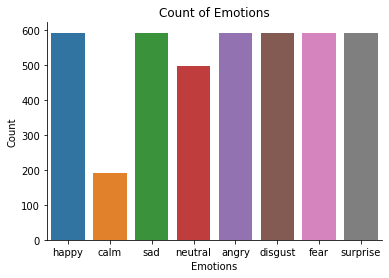

In [ ]:
plt.title('Count of Emotions')
sns.countplot(data_path.Emotions)
plt.ylabel('Count')
plt.xlabel('Emotions')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
from scipy.io import wavfile
sr, data = wavfile.read('/content/rav/Actor_15/03-01-05-01-01-02-15.wav')
sr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


48000

In [ ]:
from scipy.io import wavfile
sr, data = wavfile.read('/content/TESS/YAF_sad/YAF_keep_sad.wav')
sr

24414

In [ ]:
df=np.empty(shape=(data_path.shape[0], 30, 160))

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
j = 0
input_length = 16000 * 2.5
for i in tqdm(data_path.Path):
    path = i
    data, sr = librosa.core.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')

    if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)
    # # Random offset / Padding
    # if len(data) > input_length:
    #     max_offset = len(data) - input_length
    #     offset = np.random.randint(max_offset)
    #     data = data[offset:(input_length+offset)]
    # else:
    #     if input_length > len(data):
    #         max_offset = input_length - len(data)
    #         offset = np.random.randint(max_offset)
    #     else:
    #         offset = 0
    #     wav = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")


    MFCC = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    df[j,0:30,0:MFCC.shape[1]] = MFCC
    j = j+1
    print(MFCC.shape)

  0%|          | 2/4240 [00:01<45:39,  1.55it/s]  

(30, 79)
(30, 79)


  0%|          | 6/4240 [00:01<12:11,  5.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 8/4240 [00:01<08:59,  7.85it/s]

(30, 79)
(30, 79)
(30, 79)


  0%|          | 12/4240 [00:02<07:14,  9.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 14/4240 [00:02<06:42, 10.50it/s]

(30, 79)
(30, 79)


  0%|          | 16/4240 [00:02<07:13,  9.75it/s]

(30, 79)
(30, 79)


  0%|          | 18/4240 [00:02<07:27,  9.44it/s]

(30, 79)
(30, 79)


  0%|          | 20/4240 [00:03<07:42,  9.12it/s]

(30, 79)
(30, 79)


  1%|          | 23/4240 [00:03<07:50,  8.96it/s]

(30, 79)
(30, 79)
(30, 79)


  1%|          | 27/4240 [00:03<06:07, 11.46it/s]

(30, 79)
(30, 79)
(30, 79)


  1%|          | 29/4240 [00:03<06:07, 11.46it/s]

(30, 79)
(30, 79)
(30, 79)


  1%|          | 33/4240 [00:04<06:02, 11.60it/s]

(30, 79)
(30, 79)
(30, 79)


  1%|          | 35/4240 [00:04<06:35, 10.63it/s]

(30, 79)
(30, 79)


  1%|          | 37/4240 [00:04<06:52, 10.18it/s]

(30, 79)
(30, 79)


  1%|          | 41/4240 [00:04<05:42, 12.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 45/4240 [00:05<04:57, 14.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 49/4240 [00:05<04:26, 15.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 53/4240 [00:05<04:09, 16.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 57/4240 [00:05<04:02, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 61/4240 [00:06<03:55, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 65/4240 [00:06<04:00, 17.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 69/4240 [00:06<03:56, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 73/4240 [00:06<03:48, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 77/4240 [00:06<03:45, 18.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 81/4240 [00:07<03:55, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 85/4240 [00:07<03:47, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 89/4240 [00:07<03:47, 18.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 93/4240 [00:07<03:49, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 97/4240 [00:08<03:50, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 101/4240 [00:08<03:58, 17.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 105/4240 [00:08<03:54, 17.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 109/4240 [00:08<03:56, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 113/4240 [00:08<03:52, 17.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 117/4240 [00:09<03:54, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 121/4240 [00:09<03:51, 17.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 125/4240 [00:09<03:47, 18.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 129/4240 [00:09<03:48, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 133/4240 [00:10<03:52, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 137/4240 [00:10<03:54, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 141/4240 [00:10<03:50, 17.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 145/4240 [00:10<03:48, 17.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 149/4240 [00:11<03:49, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 153/4240 [00:11<04:01, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 157/4240 [00:11<04:00, 17.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 161/4240 [00:11<03:51, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 165/4240 [00:11<03:47, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 169/4240 [00:12<03:40, 18.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 173/4240 [00:12<03:47, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 177/4240 [00:12<03:41, 18.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 181/4240 [00:12<03:35, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 185/4240 [00:13<03:36, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 189/4240 [00:13<03:44, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 193/4240 [00:13<03:48, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 197/4240 [00:13<03:47, 17.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 201/4240 [00:13<03:40, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 205/4240 [00:14<03:36, 18.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 209/4240 [00:14<03:46, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 213/4240 [00:14<03:45, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 217/4240 [00:14<03:42, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 221/4240 [00:15<03:38, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 225/4240 [00:15<03:36, 18.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 229/4240 [00:15<03:47, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 233/4240 [00:15<03:46, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 237/4240 [00:15<03:43, 17.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 241/4240 [00:16<03:45, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 245/4240 [00:16<03:57, 16.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 249/4240 [00:16<03:47, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 253/4240 [00:16<03:44, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 257/4240 [00:17<03:37, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 261/4240 [00:17<03:40, 18.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 265/4240 [00:17<03:47, 17.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 269/4240 [00:17<03:46, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 273/4240 [00:17<03:46, 17.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 277/4240 [00:18<03:41, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 281/4240 [00:18<03:41, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 285/4240 [00:18<03:35, 18.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 289/4240 [00:18<03:35, 18.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 293/4240 [00:19<03:35, 18.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 297/4240 [00:19<03:36, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 301/4240 [00:19<03:35, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 305/4240 [00:19<03:39, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 309/4240 [00:19<03:36, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 313/4240 [00:20<03:35, 18.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 317/4240 [00:20<03:35, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 321/4240 [00:20<03:41, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 325/4240 [00:20<03:34, 18.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 329/4240 [00:21<03:30, 18.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 333/4240 [00:21<03:33, 18.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 337/4240 [00:21<03:39, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 341/4240 [00:21<03:41, 17.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 345/4240 [00:21<03:41, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 349/4240 [00:22<03:34, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 353/4240 [00:22<03:33, 18.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 357/4240 [00:22<03:39, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 361/4240 [00:22<03:34, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 365/4240 [00:23<03:37, 17.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 369/4240 [00:23<03:36, 17.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 373/4240 [00:23<03:36, 17.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 377/4240 [00:23<03:34, 17.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 381/4240 [00:23<03:39, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 385/4240 [00:24<03:38, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 389/4240 [00:24<03:31, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 393/4240 [00:24<03:35, 17.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 397/4240 [00:24<03:33, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 401/4240 [00:25<03:39, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 405/4240 [00:25<03:44, 17.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 409/4240 [00:25<03:45, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 413/4240 [00:25<03:37, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 417/4240 [00:26<03:35, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 421/4240 [00:26<03:37, 17.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 425/4240 [00:26<03:40, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 429/4240 [00:26<03:41, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 433/4240 [00:26<03:39, 17.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 437/4240 [00:27<03:38, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 441/4240 [00:27<03:37, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 445/4240 [00:27<03:39, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 449/4240 [00:27<03:43, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 453/4240 [00:28<03:42, 17.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 457/4240 [00:28<03:42, 17.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 461/4240 [00:28<03:43, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 465/4240 [00:28<03:40, 17.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 469/4240 [00:29<03:43, 16.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 473/4240 [00:29<03:38, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 477/4240 [00:29<03:34, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 481/4240 [00:29<03:43, 16.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 485/4240 [00:30<03:38, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 489/4240 [00:30<03:34, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 493/4240 [00:30<03:30, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 497/4240 [00:30<03:27, 18.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 501/4240 [00:30<03:32, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 505/4240 [00:31<03:28, 17.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 509/4240 [00:31<03:28, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 513/4240 [00:31<03:29, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 517/4240 [00:31<03:37, 17.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 521/4240 [00:32<03:34, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 525/4240 [00:32<03:32, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 529/4240 [00:32<03:31, 17.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 533/4240 [00:32<03:28, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 537/4240 [00:32<03:31, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 541/4240 [00:33<03:34, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 545/4240 [00:33<03:31, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 549/4240 [00:33<03:30, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 553/4240 [00:33<03:40, 16.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 557/4240 [00:34<03:42, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 561/4240 [00:34<03:34, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 565/4240 [00:34<03:25, 17.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 569/4240 [00:34<03:27, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 573/4240 [00:35<03:24, 17.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 577/4240 [00:35<03:23, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 581/4240 [00:35<03:22, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 585/4240 [00:35<03:21, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 589/4240 [00:35<03:28, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 593/4240 [00:36<03:27, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 597/4240 [00:36<03:27, 17.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 601/4240 [00:36<03:27, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 605/4240 [00:36<03:28, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 609/4240 [00:37<03:28, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 613/4240 [00:37<03:24, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 617/4240 [00:37<03:26, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 621/4240 [00:37<03:21, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 625/4240 [00:38<03:25, 17.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 629/4240 [00:38<03:35, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 633/4240 [00:38<03:38, 16.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 637/4240 [00:38<03:39, 16.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 641/4240 [00:38<03:30, 17.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 645/4240 [00:39<03:28, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 649/4240 [00:39<03:35, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 653/4240 [00:39<03:33, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 657/4240 [00:39<03:34, 16.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 661/4240 [00:40<03:31, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 665/4240 [00:40<03:34, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 669/4240 [00:40<03:30, 16.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 673/4240 [00:40<03:24, 17.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 677/4240 [00:41<03:24, 17.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 681/4240 [00:41<03:25, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 685/4240 [00:41<03:22, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 689/4240 [00:41<03:17, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 693/4240 [00:42<03:26, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 697/4240 [00:42<03:21, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 701/4240 [00:42<03:21, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 705/4240 [00:42<03:16, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 709/4240 [00:42<03:15, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 713/4240 [00:43<03:21, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 717/4240 [00:43<03:18, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 721/4240 [00:43<03:15, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 725/4240 [00:43<03:23, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 729/4240 [00:44<03:36, 16.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 733/4240 [00:44<03:30, 16.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 737/4240 [00:44<03:27, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 741/4240 [00:44<03:22, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 745/4240 [00:45<03:22, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 749/4240 [00:45<03:29, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 753/4240 [00:45<03:26, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 757/4240 [00:45<03:27, 16.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 761/4240 [00:45<03:30, 16.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 765/4240 [00:46<03:37, 15.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 769/4240 [00:46<03:34, 16.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 773/4240 [00:46<03:26, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 777/4240 [00:46<03:26, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 781/4240 [00:47<03:31, 16.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 785/4240 [00:47<03:29, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 789/4240 [00:47<03:31, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 793/4240 [00:47<03:27, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 797/4240 [00:48<03:28, 16.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 801/4240 [00:48<03:18, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 805/4240 [00:48<03:14, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 809/4240 [00:48<03:19, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 813/4240 [00:49<03:13, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 817/4240 [00:49<03:22, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 821/4240 [00:49<03:22, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 825/4240 [00:49<03:20, 16.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 829/4240 [00:50<03:21, 16.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 833/4240 [00:50<03:24, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 837/4240 [00:50<03:26, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 841/4240 [00:50<03:23, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 845/4240 [00:51<03:21, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 849/4240 [00:51<03:27, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 853/4240 [00:51<03:16, 17.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 857/4240 [00:51<03:12, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 861/4240 [00:51<03:16, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 865/4240 [00:52<03:11, 17.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 869/4240 [00:52<03:09, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 873/4240 [00:52<03:06, 18.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 877/4240 [00:52<03:05, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 881/4240 [00:53<03:11, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 885/4240 [00:53<03:13, 17.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 889/4240 [00:53<03:11, 17.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 893/4240 [00:53<03:07, 17.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 897/4240 [00:53<03:05, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 901/4240 [00:54<03:03, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 905/4240 [00:54<03:08, 17.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 909/4240 [00:54<03:03, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 913/4240 [00:54<03:03, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 917/4240 [00:55<03:02, 18.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 921/4240 [00:55<03:04, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 925/4240 [00:55<03:08, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 929/4240 [00:55<03:10, 17.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 933/4240 [00:56<03:13, 17.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 937/4240 [00:56<03:11, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 941/4240 [00:56<03:12, 17.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 945/4240 [00:56<03:12, 17.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 949/4240 [00:56<03:11, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 953/4240 [00:57<03:06, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 957/4240 [00:57<03:14, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 961/4240 [00:57<03:16, 16.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 965/4240 [00:57<03:09, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 969/4240 [00:58<03:04, 17.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 971/4240 [00:58<03:05, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 973/4240 [00:58<03:49, 14.24it/s]

(30, 79)
(30, 79)


 23%|██▎       | 977/4240 [00:58<04:55, 11.04it/s]

(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 981/4240 [00:59<04:00, 13.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 983/4240 [00:59<03:47, 14.33it/s]

(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 985/4240 [00:59<04:00, 13.52it/s]

(30, 79)
(30, 79)


 23%|██▎       | 987/4240 [00:59<05:40,  9.56it/s]

(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 993/4240 [01:00<04:18, 12.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 997/4240 [01:00<03:46, 14.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 999/4240 [01:00<05:01, 10.74it/s]

(30, 79)
(30, 79)


 24%|██▎       | 1003/4240 [01:01<04:51, 11.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1007/4240 [01:01<03:54, 13.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1011/4240 [01:01<03:26, 15.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1015/4240 [01:01<03:11, 16.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1019/4240 [01:01<03:03, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1023/4240 [01:02<02:58, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1027/4240 [01:02<02:57, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1031/4240 [01:02<02:59, 17.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1035/4240 [01:02<02:56, 18.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1039/4240 [01:03<03:02, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1043/4240 [01:03<03:03, 17.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1047/4240 [01:03<03:04, 17.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1051/4240 [01:03<03:01, 17.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1055/4240 [01:04<03:00, 17.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1059/4240 [01:04<03:04, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1063/4240 [01:04<03:07, 16.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1067/4240 [01:04<03:11, 16.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1071/4240 [01:05<03:10, 16.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1075/4240 [01:05<03:04, 17.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1079/4240 [01:05<03:01, 17.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1083/4240 [01:05<03:11, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1087/4240 [01:05<03:07, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1091/4240 [01:06<03:02, 17.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1095/4240 [01:06<03:03, 17.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1099/4240 [01:06<03:07, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1103/4240 [01:06<03:08, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1107/4240 [01:07<03:05, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1111/4240 [01:07<03:04, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1115/4240 [01:07<02:59, 17.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1119/4240 [01:07<03:01, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1123/4240 [01:08<03:02, 17.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1127/4240 [01:08<03:00, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1131/4240 [01:08<02:54, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1135/4240 [01:08<02:55, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1139/4240 [01:08<02:54, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1143/4240 [01:09<02:52, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1147/4240 [01:09<02:50, 18.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1151/4240 [01:09<02:48, 18.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1155/4240 [01:09<02:55, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1159/4240 [01:10<02:51, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1163/4240 [01:10<02:48, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1167/4240 [01:10<02:51, 17.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1171/4240 [01:10<02:57, 17.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1175/4240 [01:11<02:53, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1179/4240 [01:11<02:53, 17.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1183/4240 [01:11<02:56, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1187/4240 [01:11<02:52, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1191/4240 [01:11<02:54, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1195/4240 [01:12<02:54, 17.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1199/4240 [01:12<02:56, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1203/4240 [01:12<02:58, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1207/4240 [01:12<02:57, 17.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1211/4240 [01:13<02:52, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1215/4240 [01:13<02:51, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1219/4240 [01:13<02:51, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1223/4240 [01:13<02:52, 17.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1227/4240 [01:14<02:54, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1231/4240 [01:14<02:51, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1235/4240 [01:14<02:49, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1239/4240 [01:14<02:45, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1243/4240 [01:14<02:52, 17.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1247/4240 [01:15<02:50, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1251/4240 [01:15<02:49, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1255/4240 [01:15<02:50, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1259/4240 [01:15<02:45, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1263/4240 [01:16<02:45, 17.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1267/4240 [01:16<02:44, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1271/4240 [01:16<02:42, 18.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1275/4240 [01:16<02:40, 18.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1279/4240 [01:16<02:47, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1283/4240 [01:17<02:42, 18.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1287/4240 [01:17<02:42, 18.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1291/4240 [01:17<02:39, 18.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1295/4240 [01:17<02:40, 18.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1299/4240 [01:18<02:44, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1303/4240 [01:18<02:47, 17.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1307/4240 [01:18<02:49, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1311/4240 [01:18<02:44, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1315/4240 [01:18<02:46, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1319/4240 [01:19<02:46, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1323/4240 [01:19<02:47, 17.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1327/4240 [01:19<02:53, 16.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1331/4240 [01:19<02:49, 17.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1335/4240 [01:20<02:48, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1339/4240 [01:20<02:47, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1343/4240 [01:20<02:42, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1347/4240 [01:20<02:43, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1351/4240 [01:21<02:47, 17.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1355/4240 [01:21<02:45, 17.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1359/4240 [01:21<02:47, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1363/4240 [01:21<02:47, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1367/4240 [01:21<02:44, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1371/4240 [01:22<02:48, 17.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1375/4240 [01:22<02:43, 17.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1379/4240 [01:22<02:44, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1383/4240 [01:22<02:47, 17.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1387/4240 [01:23<02:43, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1391/4240 [01:23<02:38, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1395/4240 [01:23<02:32, 18.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1399/4240 [01:23<02:31, 18.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1403/4240 [01:23<02:32, 18.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1407/4240 [01:24<02:35, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1411/4240 [01:24<02:33, 18.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1415/4240 [01:24<02:38, 17.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1419/4240 [01:24<02:37, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1423/4240 [01:25<02:36, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1427/4240 [01:25<02:38, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1431/4240 [01:25<02:35, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1435/4240 [01:25<02:38, 17.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1439/4240 [01:25<02:38, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1446/4240 [01:26<01:58, 23.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1454/4240 [01:26<01:33, 29.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1462/4240 [01:26<01:25, 32.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1470/4240 [01:26<01:20, 34.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1478/4240 [01:27<01:17, 35.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1482/4240 [01:27<01:20, 34.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1494/4240 [01:27<01:19, 34.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1502/4240 [01:27<01:18, 34.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1510/4240 [01:28<01:18, 34.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1514/4240 [01:28<01:25, 31.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1522/4240 [01:28<01:18, 34.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1530/4240 [01:28<01:17, 35.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▋      | 1538/4240 [01:28<01:16, 35.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▋      | 1546/4240 [01:29<01:12, 36.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1554/4240 [01:29<01:16, 35.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1562/4240 [01:29<01:15, 35.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1570/4240 [01:29<01:15, 35.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1578/4240 [01:30<01:14, 35.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1586/4240 [01:30<01:17, 34.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1594/4240 [01:30<01:14, 35.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1602/4240 [01:30<01:12, 36.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1610/4240 [01:30<01:11, 36.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1618/4240 [01:31<01:12, 36.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1626/4240 [01:31<01:14, 34.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▊      | 1635/4240 [01:31<01:09, 37.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1643/4240 [01:31<01:08, 38.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 39%|███▉      | 1651/4240 [01:31<01:06, 38.75it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1659/4240 [01:32<01:07, 38.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1667/4240 [01:32<01:10, 36.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1676/4240 [01:32<01:06, 38.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1684/4240 [01:32<01:06, 38.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1692/4240 [01:33<01:08, 37.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1700/4240 [01:33<01:08, 37.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1708/4240 [01:33<01:09, 36.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1712/4240 [01:33<01:09, 36.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1721/4240 [01:33<01:08, 36.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1729/4240 [01:34<01:09, 36.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1737/4240 [01:34<01:08, 36.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1745/4240 [01:34<01:10, 35.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████▏     | 1753/4240 [01:34<01:11, 34.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1761/4240 [01:35<01:09, 35.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1769/4240 [01:35<01:08, 36.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1777/4240 [01:35<01:07, 36.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1785/4240 [01:35<01:06, 36.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1793/4240 [01:35<01:05, 37.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1801/4240 [01:36<01:07, 36.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1809/4240 [01:36<01:07, 36.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1818/4240 [01:36<01:05, 37.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1826/4240 [01:36<01:04, 37.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1834/4240 [01:36<01:03, 38.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1842/4240 [01:37<01:06, 36.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▎     | 1850/4240 [01:37<01:11, 33.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▎     | 1854/4240 [01:37<01:14, 32.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1862/4240 [01:37<01:18, 30.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1870/4240 [01:38<01:18, 30.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1874/4240 [01:38<01:22, 28.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1880/4240 [01:38<01:23, 28.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1887/4240 [01:38<01:20, 29.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1894/4240 [01:39<01:17, 30.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1902/4240 [01:39<01:16, 30.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1909/4240 [01:39<01:23, 28.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1916/4240 [01:39<01:20, 28.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1920/4240 [01:39<01:18, 29.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1928/4240 [01:40<01:17, 29.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1935/4240 [01:40<01:15, 30.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1943/4240 [01:40<01:13, 31.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1947/4240 [01:40<01:15, 30.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1955/4240 [01:41<01:14, 30.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▋     | 1963/4240 [01:41<01:15, 30.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▋     | 1967/4240 [01:41<01:16, 29.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1974/4240 [01:41<01:16, 29.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1981/4240 [01:41<01:16, 29.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1988/4240 [01:42<01:16, 29.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1995/4240 [01:42<01:14, 30.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 2003/4240 [01:42<01:14, 29.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 2007/4240 [01:42<01:13, 30.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2015/4240 [01:43<01:11, 31.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2023/4240 [01:43<01:11, 30.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2031/4240 [01:43<01:10, 31.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2035/4240 [01:43<01:11, 30.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2043/4240 [01:43<01:11, 30.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2051/4240 [01:44<01:08, 31.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▊     | 2059/4240 [01:44<01:09, 31.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▊     | 2063/4240 [01:44<01:10, 30.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2071/4240 [01:44<01:08, 31.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2079/4240 [01:45<01:05, 33.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2087/4240 [01:45<01:03, 33.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2095/4240 [01:45<01:03, 33.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2099/4240 [01:45<01:06, 32.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2107/4240 [01:45<01:05, 32.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2115/4240 [01:46<01:04, 33.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2123/4240 [01:46<01:03, 33.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2127/4240 [01:46<01:04, 32.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2135/4240 [01:46<01:03, 33.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2143/4240 [01:47<01:02, 33.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 51%|█████     | 2151/4240 [01:47<01:01, 33.99it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 51%|█████     | 2159/4240 [01:47<00:59, 34.86it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2163/4240 [01:47<00:59, 34.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2171/4240 [01:47<01:03, 32.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████▏    | 2179/4240 [01:48<01:02, 33.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2187/4240 [01:48<01:02, 32.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2191/4240 [01:48<01:01, 33.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2199/4240 [01:48<01:01, 33.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2207/4240 [01:48<01:04, 31.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2215/4240 [01:49<01:03, 31.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2219/4240 [01:49<01:04, 31.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2227/4240 [01:49<01:03, 31.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2235/4240 [01:49<01:05, 30.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2244/4240 [01:50<00:57, 34.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2253/4240 [01:50<00:53, 37.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2262/4240 [01:50<00:48, 40.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2267/4240 [01:50<00:46, 42.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▎    | 2277/4240 [01:50<00:48, 40.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2287/4240 [01:51<00:44, 43.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2297/4240 [01:51<00:43, 44.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2307/4240 [01:51<00:43, 44.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2317/4240 [01:51<00:43, 44.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2327/4240 [01:52<00:44, 42.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2337/4240 [01:52<00:42, 44.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2347/4240 [01:52<00:42, 44.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2357/4240 [01:52<00:43, 43.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2362/4240 [01:52<00:44, 42.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2372/4240 [01:53<00:43, 42.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2382/4240 [01:53<00:42, 43.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▋    | 2392/4240 [01:53<00:41, 44.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2402/4240 [01:53<00:40, 45.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2412/4240 [01:53<00:42, 43.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2422/4240 [01:54<00:40, 44.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2432/4240 [01:54<00:40, 44.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2442/4240 [01:54<00:39, 45.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2447/4240 [01:54<00:41, 43.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 58%|█████▊    | 2457/4240 [01:55<00:45, 39.23it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2465/4240 [01:55<00:47, 37.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2473/4240 [01:55<00:47, 37.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▊    | 2481/4240 [01:55<00:48, 36.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▊    | 2489/4240 [01:55<00:47, 36.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2497/4240 [01:56<00:47, 36.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2505/4240 [01:56<00:46, 36.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2513/4240 [01:56<00:49, 35.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2521/4240 [01:56<00:49, 34.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2525/4240 [01:56<00:50, 34.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2533/4240 [01:57<00:52, 32.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2541/4240 [01:57<00:50, 33.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|██████    | 2549/4240 [01:57<00:52, 32.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|██████    | 2553/4240 [01:57<00:53, 31.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 60%|██████    | 2561/4240 [01:58<00:51, 32.61it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2569/4240 [01:58<00:48, 34.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2577/4240 [01:58<00:48, 34.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2585/4240 [01:58<00:46, 35.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2593/4240 [01:58<00:46, 35.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████▏   | 2601/4240 [01:59<00:47, 34.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2609/4240 [01:59<00:47, 34.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2617/4240 [01:59<00:45, 35.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2625/4240 [01:59<00:44, 35.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2633/4240 [02:00<00:44, 36.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2637/4240 [02:00<00:46, 34.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2645/4240 [02:00<00:48, 32.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2653/4240 [02:00<00:48, 32.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2661/4240 [02:00<00:46, 33.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2669/4240 [02:01<00:47, 33.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2677/4240 [02:01<00:46, 33.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2685/4240 [02:01<00:45, 34.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▎   | 2693/4240 [02:01<00:44, 34.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▎   | 2697/4240 [02:02<00:43, 35.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 64%|██████▍   | 2705/4240 [02:02<00:45, 33.64it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2713/4240 [02:02<00:44, 34.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2721/4240 [02:02<00:46, 32.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2729/4240 [02:02<00:44, 33.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2733/4240 [02:03<00:44, 33.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2741/4240 [02:03<00:44, 33.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2749/4240 [02:03<00:42, 34.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2757/4240 [02:03<00:42, 35.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2765/4240 [02:04<00:41, 35.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2773/4240 [02:04<00:42, 34.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2781/4240 [02:04<00:41, 35.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2789/4240 [02:04<00:42, 34.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2793/4240 [02:04<00:43, 33.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2801/4240 [02:05<00:44, 32.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2809/4240 [02:05<00:45, 31.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2817/4240 [02:05<00:43, 32.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2825/4240 [02:05<00:40, 34.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2833/4240 [02:06<00:39, 35.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2841/4240 [02:06<00:40, 34.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2849/4240 [02:06<00:38, 35.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2857/4240 [02:06<00:39, 35.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2865/4240 [02:06<00:38, 35.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2873/4240 [02:07<00:36, 37.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2881/4240 [02:07<00:37, 35.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2889/4240 [02:07<00:37, 35.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2897/4240 [02:07<00:37, 35.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▊   | 2905/4240 [02:08<00:37, 35.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▊   | 2909/4240 [02:08<00:38, 34.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2917/4240 [02:08<00:37, 35.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2925/4240 [02:08<00:36, 36.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2933/4240 [02:08<00:36, 36.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2942/4240 [02:09<00:34, 37.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2950/4240 [02:09<00:35, 36.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2958/4240 [02:09<00:35, 35.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2966/4240 [02:09<00:36, 34.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2974/4240 [02:10<00:35, 36.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2982/4240 [02:10<00:33, 37.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2986/4240 [02:10<00:35, 35.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 2994/4240 [02:10<00:34, 35.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3002/4240 [02:10<00:33, 36.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3010/4240 [02:10<00:33, 36.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3018/4240 [02:11<00:32, 37.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████▏  | 3026/4240 [02:11<00:34, 35.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3034/4240 [02:11<00:32, 37.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3042/4240 [02:11<00:32, 36.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3050/4240 [02:12<00:32, 36.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3058/4240 [02:12<00:31, 37.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3066/4240 [02:12<00:33, 34.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 72%|███████▎  | 3074/4240 [02:12<00:32, 35.81it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3082/4240 [02:12<00:31, 36.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3086/4240 [02:13<00:31, 36.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3095/4240 [02:13<00:30, 37.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3103/4240 [02:13<00:30, 37.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3112/4240 [02:13<00:29, 37.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▎  | 3120/4240 [02:13<00:29, 37.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3128/4240 [02:14<00:29, 37.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3136/4240 [02:14<00:31, 35.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3144/4240 [02:14<00:30, 36.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3153/4240 [02:14<00:29, 37.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3157/4240 [02:15<00:29, 37.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3166/4240 [02:15<00:28, 37.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3174/4240 [02:15<00:29, 36.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3182/4240 [02:15<00:29, 35.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3191/4240 [02:15<00:28, 37.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 75%|███████▌  | 3199/4240 [02:16<00:28, 37.09it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3208/4240 [02:16<00:26, 38.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3216/4240 [02:16<00:27, 37.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3224/4240 [02:16<00:27, 36.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3232/4240 [02:17<00:27, 37.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▋  | 3240/4240 [02:17<00:26, 37.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3250/4240 [02:17<00:24, 40.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3260/4240 [02:17<00:23, 42.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3265/4240 [02:17<00:22, 42.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 77%|███████▋  | 3275/4240 [02:18<00:22, 42.93it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3285/4240 [02:18<00:21, 43.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3295/4240 [02:18<00:22, 41.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3305/4240 [02:18<00:21, 43.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3315/4240 [02:18<00:20, 45.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3325/4240 [02:19<00:20, 44.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▊  | 3330/4240 [02:19<00:21, 43.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3340/4240 [02:19<00:21, 41.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3350/4240 [02:19<00:21, 41.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3360/4240 [02:20<00:21, 41.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3370/4240 [02:20<00:20, 41.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3375/4240 [02:20<00:21, 40.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3385/4240 [02:20<00:20, 41.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|████████  | 3395/4240 [02:20<00:19, 43.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|████████  | 3405/4240 [02:21<00:19, 42.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3415/4240 [02:21<00:19, 42.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3425/4240 [02:21<00:18, 43.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3435/4240 [02:21<00:19, 41.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3440/4240 [02:21<00:18, 42.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████▏ | 3450/4240 [02:22<00:20, 39.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3458/4240 [02:22<00:20, 37.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3466/4240 [02:22<00:21, 36.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3475/4240 [02:22<00:21, 36.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3483/4240 [02:23<00:20, 37.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3491/4240 [02:23<00:20, 37.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3499/4240 [02:23<00:20, 36.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3507/4240 [02:23<00:20, 35.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3511/4240 [02:23<00:20, 35.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3520/4240 [02:24<00:19, 36.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3528/4240 [02:24<00:19, 36.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3536/4240 [02:24<00:19, 36.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▎ | 3544/4240 [02:24<00:19, 35.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 84%|████████▍ | 3552/4240 [02:25<00:19, 35.45it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3560/4240 [02:25<00:18, 36.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3568/4240 [02:25<00:19, 35.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3576/4240 [02:25<00:19, 34.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3584/4240 [02:26<00:18, 35.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3588/4240 [02:26<00:18, 34.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 85%|████████▍ | 3596/4240 [02:26<00:18, 34.80it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3604/4240 [02:26<00:18, 34.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3612/4240 [02:26<00:17, 34.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3620/4240 [02:27<00:17, 35.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3628/4240 [02:27<00:16, 36.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3636/4240 [02:27<00:17, 35.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3644/4240 [02:27<00:17, 34.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3652/4240 [02:27<00:17, 34.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3656/4240 [02:28<00:17, 33.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▋ | 3664/4240 [02:28<00:17, 33.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3672/4240 [02:28<00:16, 33.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 87%|████████▋ | 3680/4240 [02:28<00:16, 33.94it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3688/4240 [02:29<00:16, 34.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3696/4240 [02:29<00:15, 34.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3700/4240 [02:29<00:15, 34.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3708/4240 [02:29<00:15, 33.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3716/4240 [02:29<00:16, 32.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3724/4240 [02:30<00:15, 32.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3728/4240 [02:30<00:15, 33.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3736/4240 [02:30<00:15, 33.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3744/4240 [02:30<00:14, 33.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3752/4240 [02:30<00:14, 32.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▊ | 3756/4240 [02:31<00:14, 33.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3764/4240 [02:31<00:14, 32.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3772/4240 [02:31<00:13, 33.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 89%|████████▉ | 3780/4240 [02:31<00:13, 33.40it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3784/4240 [02:31<00:14, 31.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3792/4240 [02:32<00:13, 32.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3800/4240 [02:32<00:13, 32.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3804/4240 [02:32<00:13, 31.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3812/4240 [02:32<00:13, 32.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3820/4240 [02:33<00:12, 32.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 90%|█████████ | 3828/4240 [02:33<00:12, 33.22it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3836/4240 [02:33<00:11, 33.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3840/4240 [02:33<00:11, 33.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3848/4240 [02:33<00:12, 31.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3852/4240 [02:34<00:12, 30.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3860/4240 [02:34<00:12, 29.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3868/4240 [02:34<00:12, 29.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████▏| 3874/4240 [02:34<00:12, 28.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3880/4240 [02:35<00:12, 28.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3887/4240 [02:35<00:11, 29.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3893/4240 [02:35<00:12, 27.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3900/4240 [02:35<00:11, 29.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3904/4240 [02:35<00:11, 30.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3911/4240 [02:36<00:11, 27.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3917/4240 [02:36<00:11, 27.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3923/4240 [02:36<00:11, 26.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3929/4240 [02:36<00:11, 27.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3937/4240 [02:37<00:10, 29.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3945/4240 [02:37<00:09, 30.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3949/4240 [02:37<00:09, 29.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3957/4240 [02:37<00:09, 30.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▎| 3965/4240 [02:38<00:08, 31.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▎| 3969/4240 [02:38<00:08, 30.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3977/4240 [02:38<00:08, 30.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3985/4240 [02:38<00:08, 31.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3993/4240 [02:38<00:07, 31.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3997/4240 [02:39<00:07, 31.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 4005/4240 [02:39<00:07, 30.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4013/4240 [02:39<00:07, 30.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4021/4240 [02:39<00:07, 31.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4025/4240 [02:39<00:07, 30.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4033/4240 [02:40<00:06, 30.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4040/4240 [02:40<00:06, 29.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4050/4240 [02:40<00:05, 35.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4059/4240 [02:40<00:04, 39.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4068/4240 [02:41<00:04, 39.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4077/4240 [02:41<00:04, 39.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▋| 4085/4240 [02:41<00:03, 38.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4094/4240 [02:41<00:03, 38.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4102/4240 [02:42<00:03, 38.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4107/4240 [02:42<00:03, 39.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4115/4240 [02:42<00:03, 36.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4124/4240 [02:42<00:03, 37.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4132/4240 [02:42<00:02, 37.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4141/4240 [02:43<00:02, 39.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4150/4240 [02:43<00:02, 39.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4158/4240 [02:43<00:02, 38.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4167/4240 [02:43<00:01, 38.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4175/4240 [02:43<00:01, 37.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▊| 4184/4240 [02:44<00:01, 38.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4193/4240 [02:44<00:01, 39.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 99%|█████████▉| 4202/4240 [02:44<00:00, 39.61it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4210/4240 [02:44<00:00, 39.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4219/4240 [02:45<00:00, 41.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4229/4240 [02:45<00:00, 40.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4234/4240 [02:45<00:00, 40.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|██████████| 4240/4240 [02:45<00:00, 25.60it/s]

(30, 79)
(30, 79)


In [ ]:
for i in tqdm(data_path.Path):
  #emotion='happy'
  f_path = i
  #path = np.array(data_path.Path[data_path.Emotions==emotion])[10]
  data_old, sr = librosa.load(f_path,sr=24414)
  data = librosa.resample(data_old, sr, 16000)
  data_old.shape,data.shape

100%|██████████| 4240/4240 [07:31<00:00,  9.40it/s]


In [ ]:
print(data_old.shape,data.shape)

(52226,) (26227,)


In [ ]:
df=np.empty(shape=(data_path.shape[0], 30, 160))

In [ ]:
j = 0
input_length = 16000 * 2.5
for i in tqdm(data_path.Path):
    path = i
    data, sr = librosa.core.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')

    # Random offset / Padding
    if len(data) > input_length:
        max_offset = len(data) - input_length
        offset = np.random.randint(max_offset)
        data = data[offset:(input_length+offset)]
    else:
        if input_length > len(data):
            max_offset = input_length - len(data)
            offset = np.random.randint(max_offset)
        else:
            offset = 0
        wav = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")


    MFCC = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    df[j,0:30,0:MFCC.shape[1]] = MFCC
    j = j+1
    print(MFCC.shape)

  0%|          | 3/4240 [00:00<03:32, 19.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 7/4240 [00:00<03:53, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 11/4240 [00:00<03:58, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 15/4240 [00:00<04:08, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 19/4240 [00:01<04:08, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 23/4240 [00:01<04:10, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 27/4240 [00:01<04:08, 16.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 31/4240 [00:01<04:15, 16.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 35/4240 [00:02<04:18, 16.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 39/4240 [00:02<04:10, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 43/4240 [00:02<04:06, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 47/4240 [00:02<04:13, 16.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 51/4240 [00:03<04:21, 16.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 55/4240 [00:03<04:14, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 59/4240 [00:03<04:10, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 63/4240 [00:03<04:23, 15.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 67/4240 [00:04<04:12, 16.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 71/4240 [00:04<04:09, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 75/4240 [00:04<04:14, 16.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 79/4240 [00:04<04:17, 16.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 83/4240 [00:04<04:13, 16.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 87/4240 [00:05<04:07, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 91/4240 [00:05<04:10, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 95/4240 [00:05<04:08, 16.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 99/4240 [00:05<04:12, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 103/4240 [00:06<04:09, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 107/4240 [00:06<04:06, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 111/4240 [00:06<04:07, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 115/4240 [00:06<04:16, 16.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 119/4240 [00:07<04:11, 16.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 123/4240 [00:07<04:05, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 127/4240 [00:07<04:04, 16.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 131/4240 [00:07<04:08, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 135/4240 [00:08<04:05, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 139/4240 [00:08<04:07, 16.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 143/4240 [00:08<04:06, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 147/4240 [00:08<04:09, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 151/4240 [00:09<04:06, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 155/4240 [00:09<04:03, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 159/4240 [00:09<04:02, 16.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 163/4240 [00:09<04:05, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 167/4240 [00:10<04:04, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 171/4240 [00:10<03:59, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 175/4240 [00:10<04:05, 16.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 179/4240 [00:10<04:03, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 183/4240 [00:11<04:07, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 187/4240 [00:11<04:07, 16.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 191/4240 [00:11<04:02, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 195/4240 [00:11<04:01, 16.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 199/4240 [00:11<04:01, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 203/4240 [00:12<03:57, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 207/4240 [00:12<04:02, 16.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 211/4240 [00:12<04:01, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 215/4240 [00:12<04:07, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 219/4240 [00:13<04:05, 16.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 223/4240 [00:13<04:06, 16.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 227/4240 [00:13<03:57, 16.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 231/4240 [00:13<03:59, 16.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 235/4240 [00:14<03:59, 16.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 239/4240 [00:14<03:56, 16.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 243/4240 [00:14<03:53, 17.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 247/4240 [00:14<03:50, 17.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 251/4240 [00:15<03:56, 16.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 255/4240 [00:15<03:57, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 259/4240 [00:15<03:58, 16.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 263/4240 [00:15<03:58, 16.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 267/4240 [00:16<04:02, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 271/4240 [00:16<04:01, 16.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 275/4240 [00:16<03:58, 16.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 279/4240 [00:16<03:57, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 283/4240 [00:17<04:02, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 287/4240 [00:17<04:00, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 291/4240 [00:17<03:58, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 295/4240 [00:17<04:01, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 299/4240 [00:18<04:00, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 303/4240 [00:18<04:04, 16.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 307/4240 [00:18<04:00, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 311/4240 [00:18<03:57, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 315/4240 [00:18<03:57, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 319/4240 [00:19<04:04, 16.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 323/4240 [00:19<04:02, 16.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 327/4240 [00:19<03:55, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 331/4240 [00:19<03:52, 16.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 335/4240 [00:20<03:53, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 339/4240 [00:20<03:57, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 343/4240 [00:20<03:54, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 347/4240 [00:20<03:50, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 351/4240 [00:21<03:57, 16.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 355/4240 [00:21<03:55, 16.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 359/4240 [00:21<03:57, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 363/4240 [00:21<03:52, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 367/4240 [00:22<03:56, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 371/4240 [00:22<03:51, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 375/4240 [00:22<03:53, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 379/4240 [00:22<03:58, 16.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 383/4240 [00:23<03:53, 16.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 387/4240 [00:23<03:56, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 391/4240 [00:23<03:52, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 395/4240 [00:23<04:01, 15.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 399/4240 [00:24<03:56, 16.23it/s]

(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 403/4240 [00:24<03:59, 16.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 407/4240 [00:24<03:53, 16.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 411/4240 [00:24<03:51, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 415/4240 [00:25<03:52, 16.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 419/4240 [00:25<03:54, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 423/4240 [00:25<03:51, 16.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 427/4240 [00:25<03:49, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 431/4240 [00:26<03:47, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 435/4240 [00:26<03:53, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 439/4240 [00:26<03:50, 16.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 443/4240 [00:26<03:48, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 447/4240 [00:27<03:46, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 451/4240 [00:27<03:52, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 455/4240 [00:27<03:49, 16.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 459/4240 [00:27<03:46, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 463/4240 [00:27<03:45, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 467/4240 [00:28<03:50, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 471/4240 [00:28<03:54, 16.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 475/4240 [00:28<03:50, 16.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 479/4240 [00:28<03:50, 16.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 483/4240 [00:29<03:49, 16.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 487/4240 [00:29<03:55, 15.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 491/4240 [00:29<03:52, 16.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 495/4240 [00:29<03:51, 16.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 499/4240 [00:30<03:48, 16.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 503/4240 [00:30<04:00, 15.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 507/4240 [00:30<03:52, 16.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 511/4240 [00:30<03:47, 16.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 515/4240 [00:31<03:46, 16.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 519/4240 [00:31<03:47, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 523/4240 [00:31<03:46, 16.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 527/4240 [00:31<03:50, 16.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 531/4240 [00:32<03:49, 16.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 535/4240 [00:32<03:53, 15.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 539/4240 [00:32<03:47, 16.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 543/4240 [00:32<03:48, 16.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 547/4240 [00:33<03:41, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 551/4240 [00:33<03:46, 16.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 555/4240 [00:33<03:40, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 559/4240 [00:33<03:37, 16.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 563/4240 [00:34<03:36, 17.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 565/4240 [00:34<03:35, 17.09it/s]

(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 569/4240 [00:34<03:49, 15.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 573/4240 [00:34<03:43, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 577/4240 [00:35<03:41, 16.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 581/4240 [00:35<03:40, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 585/4240 [00:35<03:44, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 589/4240 [00:35<03:40, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 593/4240 [00:35<03:39, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 597/4240 [00:36<03:37, 16.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 601/4240 [00:36<03:45, 16.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 605/4240 [00:36<03:41, 16.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 609/4240 [00:36<03:38, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 77)


 14%|█▍        | 613/4240 [00:37<03:37, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 617/4240 [00:37<03:41, 16.34it/s]

(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 621/4240 [00:37<03:45, 16.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 625/4240 [00:37<03:40, 16.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 629/4240 [00:38<03:35, 16.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 633/4240 [00:38<03:33, 16.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 637/4240 [00:38<03:40, 16.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 641/4240 [00:38<03:37, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 645/4240 [00:39<03:36, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 649/4240 [00:39<03:33, 16.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 653/4240 [00:39<03:35, 16.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 657/4240 [00:39<03:35, 16.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 661/4240 [00:40<03:36, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 665/4240 [00:40<03:34, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 669/4240 [00:40<03:41, 16.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 673/4240 [00:40<03:37, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 677/4240 [00:41<03:33, 16.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 681/4240 [00:41<03:31, 16.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 685/4240 [00:41<03:30, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 689/4240 [00:41<03:32, 16.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 693/4240 [00:42<03:31, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 697/4240 [00:42<03:30, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 701/4240 [00:42<03:29, 16.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 705/4240 [00:42<03:37, 16.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 709/4240 [00:42<03:32, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 713/4240 [00:43<03:32, 16.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 717/4240 [00:43<03:34, 16.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 721/4240 [00:43<03:33, 16.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 725/4240 [00:43<03:29, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 729/4240 [00:44<03:28, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 733/4240 [00:44<03:31, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 737/4240 [00:44<03:34, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 741/4240 [00:44<03:38, 16.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 745/4240 [00:45<03:32, 16.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 749/4240 [00:45<03:31, 16.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 753/4240 [00:45<03:37, 16.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 757/4240 [00:45<03:32, 16.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 761/4240 [00:46<03:28, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 765/4240 [00:46<03:23, 17.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 769/4240 [00:46<03:22, 17.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 773/4240 [00:46<03:29, 16.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 777/4240 [00:47<03:27, 16.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 781/4240 [00:47<03:25, 16.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 785/4240 [00:47<03:24, 16.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 789/4240 [00:47<03:28, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 793/4240 [00:48<03:28, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 797/4240 [00:48<03:24, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 801/4240 [00:48<03:23, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 805/4240 [00:48<03:29, 16.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 809/4240 [00:49<03:25, 16.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 813/4240 [00:49<03:23, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 817/4240 [00:49<03:24, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 821/4240 [00:49<03:23, 16.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 825/4240 [00:49<03:28, 16.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 829/4240 [00:50<03:31, 16.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 833/4240 [00:50<03:31, 16.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 837/4240 [00:50<03:29, 16.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 841/4240 [00:50<03:26, 16.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 845/4240 [00:51<03:23, 16.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 849/4240 [00:51<03:19, 16.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 853/4240 [00:51<03:21, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 857/4240 [00:51<03:23, 16.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 861/4240 [00:52<03:20, 16.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 865/4240 [00:52<03:19, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 869/4240 [00:52<03:21, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 873/4240 [00:52<03:26, 16.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 877/4240 [00:53<03:20, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 881/4240 [00:53<03:18, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 885/4240 [00:53<03:16, 17.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 889/4240 [00:53<03:14, 17.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 893/4240 [00:54<03:18, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 897/4240 [00:54<03:19, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 901/4240 [00:54<03:20, 16.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 905/4240 [00:54<03:19, 16.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 909/4240 [00:55<03:19, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 913/4240 [00:55<03:20, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 917/4240 [00:55<03:18, 16.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 921/4240 [00:55<03:14, 17.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 925/4240 [00:55<03:18, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 929/4240 [00:56<03:15, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 933/4240 [00:56<03:12, 17.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 937/4240 [00:56<03:15, 16.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 941/4240 [00:56<03:19, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 945/4240 [00:57<03:18, 16.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 949/4240 [00:57<03:14, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 953/4240 [00:57<03:15, 16.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 957/4240 [00:57<03:12, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 961/4240 [00:58<03:17, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 965/4240 [00:58<03:22, 16.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 969/4240 [00:58<03:21, 16.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 973/4240 [00:58<03:22, 16.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 977/4240 [00:59<03:28, 15.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 981/4240 [00:59<03:26, 15.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 985/4240 [00:59<03:22, 16.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 989/4240 [00:59<03:23, 15.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 993/4240 [01:00<03:25, 15.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 997/4240 [01:00<03:22, 15.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1001/4240 [01:00<03:19, 16.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1005/4240 [01:00<03:17, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1009/4240 [01:01<03:23, 15.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1013/4240 [01:01<03:21, 16.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1017/4240 [01:01<03:14, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1021/4240 [01:01<03:13, 16.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1025/4240 [01:02<03:19, 16.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1029/4240 [01:02<03:14, 16.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1033/4240 [01:02<03:11, 16.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1037/4240 [01:02<03:15, 16.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1041/4240 [01:03<03:19, 16.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1045/4240 [01:03<03:15, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1049/4240 [01:03<03:13, 16.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1053/4240 [01:03<03:10, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1057/4240 [01:04<03:09, 16.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1061/4240 [01:04<03:15, 16.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1065/4240 [01:04<03:14, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1069/4240 [01:04<03:09, 16.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1073/4240 [01:05<03:11, 16.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1077/4240 [01:05<03:13, 16.33it/s]

(30, 78)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1081/4240 [01:05<03:08, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1083/4240 [01:05<03:13, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1087/4240 [01:05<03:22, 15.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1091/4240 [01:06<03:22, 15.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1095/4240 [01:06<03:22, 15.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1099/4240 [01:06<03:21, 15.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1103/4240 [01:06<03:17, 15.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1107/4240 [01:07<03:22, 15.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1111/4240 [01:07<03:20, 15.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1115/4240 [01:07<03:15, 16.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1119/4240 [01:07<03:11, 16.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1123/4240 [01:08<03:12, 16.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1127/4240 [01:08<03:15, 15.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1131/4240 [01:08<03:12, 16.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1135/4240 [01:08<03:11, 16.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1139/4240 [01:09<03:07, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1143/4240 [01:09<03:08, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1147/4240 [01:09<03:06, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1151/4240 [01:09<03:07, 16.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1155/4240 [01:10<03:05, 16.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1159/4240 [01:10<03:13, 15.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1163/4240 [01:10<03:08, 16.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1167/4240 [01:10<03:08, 16.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1171/4240 [01:11<03:10, 16.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1175/4240 [01:11<03:18, 15.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1179/4240 [01:11<03:09, 16.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1183/4240 [01:11<03:08, 16.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1187/4240 [01:12<03:04, 16.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1191/4240 [01:12<03:07, 16.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1195/4240 [01:12<03:06, 16.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1199/4240 [01:12<03:07, 16.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1203/4240 [01:13<03:04, 16.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1207/4240 [01:13<03:07, 16.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1211/4240 [01:13<03:06, 16.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1215/4240 [01:13<03:03, 16.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1219/4240 [01:14<03:00, 16.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1223/4240 [01:14<03:05, 16.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1227/4240 [01:14<03:04, 16.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1231/4240 [01:14<03:03, 16.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1235/4240 [01:15<03:01, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1239/4240 [01:15<03:09, 15.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1243/4240 [01:15<03:05, 16.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1247/4240 [01:15<03:02, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1251/4240 [01:16<03:02, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1255/4240 [01:16<03:07, 15.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1259/4240 [01:16<03:07, 15.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1263/4240 [01:16<03:02, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1267/4240 [01:17<03:01, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1271/4240 [01:17<02:57, 16.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1275/4240 [01:17<03:02, 16.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1279/4240 [01:17<03:04, 16.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1283/4240 [01:18<03:05, 15.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1287/4240 [01:18<03:02, 16.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1291/4240 [01:18<03:06, 15.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1295/4240 [01:18<03:04, 15.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1299/4240 [01:19<03:03, 16.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1303/4240 [01:19<03:01, 16.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1307/4240 [01:19<03:02, 16.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1311/4240 [01:19<02:59, 16.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1315/4240 [01:20<02:55, 16.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1319/4240 [01:20<02:54, 16.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1323/4240 [01:20<02:57, 16.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1327/4240 [01:20<02:56, 16.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1331/4240 [01:21<02:56, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1335/4240 [01:21<02:56, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1339/4240 [01:21<02:59, 16.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1343/4240 [01:21<02:56, 16.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1347/4240 [01:22<02:54, 16.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1351/4240 [01:22<02:53, 16.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1355/4240 [01:22<02:59, 16.05it/s]

(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1359/4240 [01:22<03:00, 16.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1363/4240 [01:23<02:59, 15.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1367/4240 [01:23<03:00, 15.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1371/4240 [01:23<03:04, 15.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1375/4240 [01:23<02:57, 16.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1379/4240 [01:24<02:55, 16.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1383/4240 [01:24<02:57, 16.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1387/4240 [01:24<02:55, 16.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1391/4240 [01:24<02:59, 15.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1395/4240 [01:25<02:54, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1399/4240 [01:25<02:52, 16.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1403/4240 [01:25<02:48, 16.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1407/4240 [01:25<02:53, 16.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1411/4240 [01:26<02:50, 16.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1415/4240 [01:26<02:48, 16.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1419/4240 [01:26<02:51, 16.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1423/4240 [01:26<03:01, 15.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1427/4240 [01:27<02:54, 16.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1431/4240 [01:27<02:50, 16.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1435/4240 [01:27<02:46, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1439/4240 [01:27<02:53, 16.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1447/4240 [01:27<01:44, 26.70it/s]

(30, 79)
(30, 41)
(30, 44)
(30, 44)
(30, 41)
(30, 46)
(30, 42)
(30, 38)
(30, 42)


 34%|███▍      | 1456/4240 [01:28<01:20, 34.49it/s]

(30, 38)
(30, 52)
(30, 45)
(30, 41)
(30, 46)
(30, 44)
(30, 41)
(30, 43)
(30, 56)


 35%|███▍      | 1464/4240 [01:28<01:15, 36.63it/s]

(30, 39)
(30, 44)
(30, 42)
(30, 60)
(30, 45)
(30, 45)
(30, 50)
(30, 60)


 35%|███▍      | 1472/4240 [01:28<01:16, 36.36it/s]

(30, 54)
(30, 46)
(30, 46)
(30, 56)
(30, 39)
(30, 57)
(30, 46)
(30, 40)


 35%|███▍      | 1480/4240 [01:28<01:16, 35.87it/s]

(30, 45)
(30, 43)
(30, 47)
(30, 41)
(30, 58)
(30, 55)
(30, 42)


 35%|███▌      | 1488/4240 [01:29<01:16, 35.99it/s]

(30, 58)
(30, 38)
(30, 52)
(30, 38)
(30, 57)
(30, 40)
(30, 45)
(30, 43)


 35%|███▌      | 1497/4240 [01:29<01:11, 38.32it/s]

(30, 42)
(30, 41)
(30, 41)
(30, 44)
(30, 45)
(30, 57)
(30, 41)
(30, 43)
(30, 46)


 35%|███▌      | 1505/4240 [01:29<01:10, 38.61it/s]

(30, 44)
(30, 42)
(30, 42)
(30, 52)
(30, 40)
(30, 59)
(30, 49)
(30, 41)


 36%|███▌      | 1513/4240 [01:29<01:15, 36.30it/s]

(30, 43)
(30, 48)
(30, 44)
(30, 56)
(30, 44)
(30, 59)
(30, 41)
(30, 45)


 36%|███▌      | 1521/4240 [01:29<01:12, 37.48it/s]

(30, 42)
(30, 45)
(30, 55)
(30, 47)
(30, 42)
(30, 40)
(30, 55)
(30, 59)


 36%|███▌      | 1529/4240 [01:30<01:12, 37.45it/s]

(30, 54)
(30, 57)
(30, 42)
(30, 41)
(30, 59)
(30, 39)
(30, 47)
(30, 57)


 36%|███▋      | 1537/4240 [01:30<01:11, 37.78it/s]

(30, 48)
(30, 43)
(30, 56)
(30, 41)
(30, 47)
(30, 45)
(30, 45)
(30, 55)


 36%|███▋      | 1545/4240 [01:30<01:10, 38.05it/s]

(30, 46)
(30, 37)
(30, 44)
(30, 59)
(30, 46)
(30, 49)
(30, 42)
(30, 47)


 37%|███▋      | 1554/4240 [01:30<01:09, 38.67it/s]

(30, 40)
(30, 42)
(30, 44)
(30, 38)
(30, 42)
(30, 48)
(30, 43)
(30, 43)
(30, 41)


 37%|███▋      | 1563/4240 [01:30<01:07, 39.66it/s]

(30, 43)
(30, 46)
(30, 41)
(30, 44)
(30, 41)
(30, 43)
(30, 53)
(30, 40)
(30, 36)


 37%|███▋      | 1571/4240 [01:31<01:07, 39.66it/s]

(30, 45)
(30, 43)
(30, 45)
(30, 49)
(30, 52)
(30, 53)
(30, 42)
(30, 40)


 37%|███▋      | 1579/4240 [01:31<01:08, 38.72it/s]

(30, 55)
(30, 43)
(30, 55)
(30, 45)
(30, 39)
(30, 61)
(30, 52)
(30, 46)


 37%|███▋      | 1587/4240 [01:31<01:12, 36.66it/s]

(30, 49)
(30, 47)
(30, 44)
(30, 41)
(30, 44)
(30, 48)
(30, 58)
(30, 62)


 38%|███▊      | 1595/4240 [01:31<01:11, 36.98it/s]

(30, 58)
(30, 43)
(30, 45)
(30, 45)
(30, 57)
(30, 37)
(30, 48)
(30, 46)


 38%|███▊      | 1603/4240 [01:32<01:11, 36.97it/s]

(30, 42)
(30, 47)
(30, 44)
(30, 42)
(30, 46)
(30, 45)
(30, 43)
(30, 46)


 38%|███▊      | 1612/4240 [01:32<01:07, 38.67it/s]

(30, 44)
(30, 54)
(30, 57)
(30, 61)
(30, 42)
(30, 42)
(30, 45)
(30, 45)
(30, 42)


 38%|███▊      | 1620/4240 [01:32<01:08, 38.41it/s]

(30, 59)
(30, 43)
(30, 39)
(30, 49)
(30, 43)
(30, 58)
(30, 48)
(30, 44)


 38%|███▊      | 1629/4240 [01:32<01:06, 39.11it/s]

(30, 45)
(30, 56)
(30, 42)
(30, 55)
(30, 43)
(30, 48)
(30, 47)
(30, 43)
(30, 46)


 39%|███▊      | 1637/4240 [01:32<01:08, 38.22it/s]

(30, 54)
(30, 44)
(30, 52)
(30, 47)
(30, 42)
(30, 48)
(30, 40)
(30, 45)


 39%|███▊      | 1641/4240 [01:33<01:12, 35.95it/s]

(30, 41)
(30, 48)
(30, 58)
(30, 63)
(30, 66)
(30, 64)
(30, 63)


 39%|███▉      | 1649/4240 [01:33<01:19, 32.77it/s]

(30, 68)
(30, 66)
(30, 66)
(30, 69)
(30, 65)
(30, 64)
(30, 64)


 39%|███▉      | 1657/4240 [01:33<01:20, 32.01it/s]

(30, 61)
(30, 59)
(30, 67)
(30, 66)
(30, 55)
(30, 66)
(30, 62)


 39%|███▉      | 1661/4240 [01:33<01:22, 31.37it/s]

(30, 59)
(30, 70)
(30, 63)
(30, 71)
(30, 58)
(30, 63)


 39%|███▉      | 1669/4240 [01:34<01:23, 30.73it/s]

(30, 64)
(30, 60)
(30, 68)
(30, 62)
(30, 61)
(30, 56)
(30, 60)


 40%|███▉      | 1677/4240 [01:34<01:22, 30.98it/s]

(30, 72)
(30, 68)
(30, 69)
(30, 62)
(30, 69)
(30, 69)
(30, 59)


 40%|███▉      | 1685/4240 [01:34<01:19, 31.96it/s]

(30, 57)
(30, 57)
(30, 70)
(30, 64)
(30, 55)
(30, 59)
(30, 62)


 40%|███▉      | 1689/4240 [01:34<01:21, 31.33it/s]

(30, 63)
(30, 66)
(30, 67)
(30, 64)
(30, 69)
(30, 56)
(30, 59)


 40%|████      | 1697/4240 [01:34<01:22, 30.69it/s]

(30, 62)
(30, 65)
(30, 69)
(30, 56)
(30, 62)
(30, 66)


 40%|████      | 1705/4240 [01:35<01:21, 31.18it/s]

(30, 63)
(30, 64)
(30, 61)
(30, 68)
(30, 66)
(30, 64)
(30, 63)


 40%|████      | 1709/4240 [01:35<01:21, 31.23it/s]

(30, 66)
(30, 60)
(30, 65)
(30, 65)
(30, 64)
(30, 61)
(30, 63)


 40%|████      | 1717/4240 [01:35<01:22, 30.44it/s]

(30, 62)
(30, 63)
(30, 68)
(30, 65)
(30, 64)
(30, 63)


 41%|████      | 1725/4240 [01:35<01:21, 30.81it/s]

(30, 70)
(30, 65)
(30, 59)
(30, 66)
(30, 63)
(30, 66)
(30, 62)


 41%|████      | 1729/4240 [01:35<01:23, 30.12it/s]

(30, 58)
(30, 67)
(30, 62)
(30, 61)
(30, 65)
(30, 57)
(30, 65)


 41%|████      | 1737/4240 [01:36<01:20, 30.92it/s]

(30, 63)
(30, 64)
(30, 73)
(30, 59)
(30, 67)
(30, 70)
(30, 69)


 41%|████      | 1745/4240 [01:36<01:19, 31.47it/s]

(30, 67)
(30, 63)
(30, 64)
(30, 67)
(30, 66)
(30, 57)
(30, 72)


 41%|████▏     | 1753/4240 [01:36<01:18, 31.83it/s]

(30, 63)
(30, 64)
(30, 70)
(30, 59)
(30, 66)
(30, 63)
(30, 64)


 41%|████▏     | 1757/4240 [01:36<01:18, 31.72it/s]

(30, 64)
(30, 59)
(30, 69)
(30, 74)
(30, 56)
(30, 64)
(30, 62)


 42%|████▏     | 1765/4240 [01:37<01:18, 31.37it/s]

(30, 61)
(30, 72)
(30, 66)
(30, 61)
(30, 68)
(30, 68)
(30, 64)


 42%|████▏     | 1773/4240 [01:37<01:16, 32.31it/s]

(30, 58)
(30, 64)
(30, 66)
(30, 61)
(30, 60)
(30, 62)
(30, 74)


 42%|████▏     | 1781/4240 [01:37<01:18, 31.42it/s]

(30, 69)
(30, 65)
(30, 68)
(30, 66)
(30, 71)
(30, 62)
(30, 63)


 42%|████▏     | 1785/4240 [01:37<01:17, 31.61it/s]

(30, 66)
(30, 58)
(30, 70)
(30, 67)
(30, 71)
(30, 67)
(30, 62)


 42%|████▏     | 1793/4240 [01:37<01:18, 31.12it/s]

(30, 56)
(30, 65)
(30, 66)
(30, 62)
(30, 68)
(30, 66)
(30, 61)

 42%|████▏     | 1801/4240 [01:38<01:17, 31.61it/s]


(30, 64)
(30, 70)
(30, 63)
(30, 58)
(30, 62)
(30, 64)


 43%|████▎     | 1805/4240 [01:38<01:18, 30.91it/s]

(30, 66)
(30, 64)
(30, 69)
(30, 63)
(30, 61)
(30, 60)
(30, 61)


 43%|████▎     | 1813/4240 [01:38<01:18, 31.09it/s]

(30, 66)
(30, 64)
(30, 71)
(30, 63)
(30, 61)
(30, 62)
(30, 71)


 43%|████▎     | 1821/4240 [01:38<01:14, 32.31it/s]

(30, 62)
(30, 58)
(30, 54)
(30, 59)
(30, 67)
(30, 69)
(30, 60)


 43%|████▎     | 1829/4240 [01:39<01:16, 31.55it/s]

(30, 59)
(30, 68)
(30, 65)
(30, 66)
(30, 61)
(30, 63)
(30, 60)


 43%|████▎     | 1833/4240 [01:39<01:16, 31.48it/s]

(30, 59)
(30, 57)
(30, 58)
(30, 74)
(30, 63)
(30, 69)
(30, 62)


 43%|████▎     | 1841/4240 [01:39<01:15, 31.98it/s]

(30, 61)
(30, 58)
(30, 68)
(30, 60)
(30, 41)
(30, 40)
(30, 48)
(30, 43)


 44%|████▎     | 1850/4240 [01:39<01:05, 36.40it/s]

(30, 48)
(30, 40)
(30, 43)
(30, 47)
(30, 47)
(30, 41)
(30, 44)
(30, 40)
(30, 49)


 44%|████▍     | 1859/4240 [01:39<01:02, 37.85it/s]

(30, 42)
(30, 48)
(30, 44)
(30, 42)
(30, 43)
(30, 43)
(30, 47)
(30, 53)


 44%|████▍     | 1868/4240 [01:40<01:01, 38.76it/s]

(30, 43)
(30, 44)
(30, 42)
(30, 52)
(30, 46)
(30, 45)
(30, 55)
(30, 48)
(30, 42)


 44%|████▍     | 1876/4240 [01:40<01:00, 39.00it/s]

(30, 46)
(30, 45)
(30, 47)
(30, 44)
(30, 49)
(30, 46)
(30, 43)
(30, 52)


 44%|████▍     | 1884/4240 [01:40<01:03, 37.26it/s]

(30, 41)
(30, 45)
(30, 43)
(30, 48)
(30, 46)
(30, 52)
(30, 51)
(30, 50)


 45%|████▍     | 1893/4240 [01:40<01:01, 38.10it/s]

(30, 43)
(30, 50)
(30, 40)
(30, 44)
(30, 42)
(30, 50)
(30, 42)


 45%|████▍     | 1897/4240 [01:40<01:03, 36.79it/s]

(30, 47)
(30, 48)
(30, 47)
(30, 45)
(30, 47)
(30, 45)
(30, 42)
(30, 46)


 45%|████▍     | 1906/4240 [01:41<01:01, 37.89it/s]

(30, 50)
(30, 40)
(30, 47)
(30, 54)
(30, 40)
(30, 46)
(30, 43)
(30, 41)


 45%|████▌     | 1914/4240 [01:41<01:01, 38.10it/s]

(30, 52)
(30, 51)
(30, 46)
(30, 46)
(30, 42)
(30, 42)
(30, 48)
(30, 46)


 45%|████▌     | 1922/4240 [01:41<01:02, 37.24it/s]

(30, 47)
(30, 50)
(30, 46)
(30, 42)
(30, 42)
(30, 44)
(30, 50)
(30, 44)


 46%|████▌     | 1931/4240 [01:41<00:59, 38.52it/s]

(30, 44)
(30, 46)
(30, 40)
(30, 44)
(30, 44)
(30, 40)
(30, 47)
(30, 44)


 46%|████▌     | 1939/4240 [01:42<01:03, 36.37it/s]

(30, 46)
(30, 44)
(30, 45)
(30, 47)
(30, 46)
(30, 50)
(30, 39)
(30, 41)


 46%|████▌     | 1947/4240 [01:42<01:01, 37.29it/s]

(30, 48)
(30, 51)
(30, 45)
(30, 45)
(30, 43)
(30, 50)
(30, 43)
(30, 47)


 46%|████▌     | 1956/4240 [01:42<00:59, 38.44it/s]

(30, 50)
(30, 49)
(30, 47)
(30, 46)
(30, 46)
(30, 43)
(30, 42)
(30, 40)


 46%|████▋     | 1964/4240 [01:42<01:00, 37.56it/s]

(30, 43)
(30, 45)
(30, 46)
(30, 52)
(30, 48)
(30, 52)
(30, 50)
(30, 50)


 47%|████▋     | 1972/4240 [01:42<00:59, 37.97it/s]

(30, 48)
(30, 41)
(30, 47)
(30, 50)
(30, 51)
(30, 42)
(30, 44)
(30, 45)


 47%|████▋     | 1980/4240 [01:43<01:01, 36.91it/s]

(30, 48)
(30, 46)
(30, 54)
(30, 50)
(30, 54)
(30, 43)
(30, 48)
(30, 42)


 47%|████▋     | 1990/4240 [01:43<00:56, 39.57it/s]

(30, 41)
(30, 40)
(30, 44)
(30, 42)
(30, 40)
(30, 45)
(30, 51)
(30, 48)
(30, 44)


 47%|████▋     | 1998/4240 [01:43<00:58, 38.30it/s]

(30, 48)
(30, 49)
(30, 46)
(30, 48)
(30, 42)
(30, 47)
(30, 50)
(30, 48)


 47%|████▋     | 2003/4240 [01:43<00:57, 39.23it/s]

(30, 41)
(30, 50)
(30, 42)
(30, 42)
(30, 44)
(30, 42)
(30, 53)
(30, 41)
(30, 46)


 47%|████▋     | 2013/4240 [01:43<00:54, 40.88it/s]

(30, 45)
(30, 42)
(30, 46)
(30, 40)
(30, 50)
(30, 40)
(30, 43)
(30, 47)


 48%|████▊     | 2023/4240 [01:44<00:55, 40.03it/s]

(30, 43)
(30, 47)
(30, 45)
(30, 46)
(30, 45)
(30, 46)
(30, 45)
(30, 46)
(30, 46)


 48%|████▊     | 2032/4240 [01:44<00:57, 38.68it/s]

(30, 49)
(30, 43)
(30, 42)
(30, 42)
(30, 48)
(30, 43)
(30, 50)
(30, 44)


 48%|████▊     | 2040/4240 [01:44<00:57, 38.21it/s]

(30, 47)
(30, 40)
(30, 45)
(30, 48)
(30, 42)
(30, 44)
(30, 47)
(30, 49)


 48%|████▊     | 2044/4240 [01:44<00:58, 37.49it/s]

(30, 46)
(30, 47)
(30, 48)
(30, 51)
(30, 42)
(30, 54)
(30, 44)
(30, 45)
(30, 44)


 49%|████▊     | 2057/4240 [01:45<00:59, 36.79it/s]

(30, 45)
(30, 48)
(30, 55)
(30, 52)
(30, 49)
(30, 46)
(30, 44)
(30, 45)


 49%|████▊     | 2065/4240 [01:45<00:58, 37.08it/s]

(30, 47)
(30, 51)
(30, 44)
(30, 39)
(30, 50)
(30, 47)
(30, 48)
(30, 52)


 49%|████▉     | 2073/4240 [01:45<00:57, 37.64it/s]

(30, 44)
(30, 42)
(30, 48)
(30, 50)
(30, 49)
(30, 50)
(30, 49)
(30, 48)


 49%|████▉     | 2081/4240 [01:45<00:57, 37.31it/s]

(30, 50)
(30, 44)
(30, 54)
(30, 43)
(30, 49)
(30, 48)
(30, 50)
(30, 53)


 49%|████▉     | 2089/4240 [01:46<00:56, 37.80it/s]

(30, 48)
(30, 50)
(30, 47)
(30, 45)
(30, 51)
(30, 50)
(30, 43)
(30, 41)


 49%|████▉     | 2097/4240 [01:46<00:56, 38.08it/s]

(30, 42)
(30, 48)
(30, 47)
(30, 43)
(30, 44)
(30, 47)
(30, 46)
(30, 46)


 50%|████▉     | 2105/4240 [01:46<00:56, 37.84it/s]

(30, 44)
(30, 50)
(30, 49)
(30, 53)
(30, 48)
(30, 49)
(30, 46)
(30, 51)


 50%|████▉     | 2113/4240 [01:46<00:56, 37.57it/s]

(30, 47)
(30, 44)
(30, 47)
(30, 51)
(30, 52)
(30, 50)
(30, 50)
(30, 47)


 50%|█████     | 2122/4240 [01:46<00:55, 37.98it/s]

(30, 40)
(30, 49)
(30, 43)
(30, 50)
(30, 41)
(30, 51)
(30, 36)
(30, 50)
(30, 49)


 50%|█████     | 2130/4240 [01:47<00:57, 36.40it/s]

(30, 53)
(30, 48)
(30, 42)
(30, 50)
(30, 50)
(30, 44)
(30, 52)
(30, 51)


 50%|█████     | 2138/4240 [01:47<00:59, 35.20it/s]

(30, 52)
(30, 43)
(30, 48)
(30, 48)
(30, 48)
(30, 51)
(30, 50)
(30, 49)


 51%|█████     | 2147/4240 [01:47<00:55, 37.38it/s]

(30, 47)
(30, 47)
(30, 44)
(30, 52)
(30, 44)
(30, 47)
(30, 45)
(30, 45)
(30, 48)


 51%|█████     | 2155/4240 [01:47<00:54, 38.27it/s]

(30, 46)
(30, 50)
(30, 44)
(30, 47)
(30, 49)
(30, 51)
(30, 46)
(30, 49)


 51%|█████     | 2163/4240 [01:48<00:55, 37.17it/s]

(30, 47)
(30, 50)
(30, 47)
(30, 48)
(30, 45)
(30, 45)
(30, 45)
(30, 46)


 51%|█████     | 2167/4240 [01:48<00:57, 36.10it/s]

(30, 47)
(30, 53)
(30, 45)
(30, 43)
(30, 51)
(30, 54)
(30, 53)


 51%|█████▏    | 2175/4240 [01:48<00:57, 35.61it/s]

(30, 52)
(30, 45)
(30, 48)
(30, 41)
(30, 40)
(30, 46)
(30, 50)
(30, 48)


 51%|█████▏    | 2183/4240 [01:48<00:56, 36.15it/s]

(30, 43)
(30, 42)
(30, 45)
(30, 49)
(30, 46)
(30, 48)
(30, 45)
(30, 47)


 52%|█████▏    | 2191/4240 [01:48<00:55, 36.60it/s]

(30, 43)
(30, 52)
(30, 49)
(30, 47)
(30, 48)
(30, 52)
(30, 51)
(30, 48)


 52%|█████▏    | 2199/4240 [01:49<00:56, 35.97it/s]

(30, 38)
(30, 48)
(30, 51)
(30, 55)
(30, 52)
(30, 47)
(30, 46)
(30, 50)


 52%|█████▏    | 2207/4240 [01:49<00:56, 35.96it/s]

(30, 45)
(30, 46)
(30, 50)
(30, 43)
(30, 50)
(30, 41)
(30, 47)
(30, 45)


 52%|█████▏    | 2215/4240 [01:49<00:55, 36.79it/s]

(30, 47)
(30, 53)
(30, 42)
(30, 49)
(30, 47)
(30, 47)
(30, 47)
(30, 42)


 52%|█████▏    | 2223/4240 [01:49<00:54, 37.03it/s]

(30, 47)
(30, 48)
(30, 44)
(30, 49)
(30, 48)
(30, 49)
(30, 54)
(30, 47)


 53%|█████▎    | 2231/4240 [01:49<00:54, 36.99it/s]

(30, 48)
(30, 47)
(30, 57)
(30, 49)
(30, 48)
(30, 46)
(30, 49)
(30, 47)
(30, 49)

 53%|█████▎    | 2239/4240 [01:50<00:53, 37.43it/s]


(30, 52)
(30, 45)
(30, 42)
(30, 52)
(30, 41)
(30, 31)
(30, 33)


 53%|█████▎    | 2248/4240 [01:50<00:50, 39.78it/s]

(30, 32)
(30, 36)
(30, 35)
(30, 34)
(30, 31)
(30, 33)
(30, 30)
(30, 35)
(30, 36)
(30, 30)


 53%|█████▎    | 2258/4240 [01:50<00:45, 43.81it/s]

(30, 36)
(30, 37)
(30, 33)
(30, 32)
(30, 37)
(30, 31)
(30, 33)
(30, 35)
(30, 29)
(30, 38)


 53%|█████▎    | 2268/4240 [01:50<00:44, 44.53it/s]

(30, 33)
(30, 37)
(30, 29)
(30, 38)
(30, 29)
(30, 36)
(30, 34)
(30, 38)
(30, 37)
(30, 33)


 54%|█████▎    | 2278/4240 [01:50<00:44, 44.35it/s]

(30, 38)
(30, 33)
(30, 43)
(30, 30)
(30, 37)
(30, 35)
(30, 31)
(30, 36)
(30, 37)
(30, 36)


 54%|█████▍    | 2288/4240 [01:51<00:43, 44.62it/s]

(30, 37)
(30, 36)
(30, 33)
(30, 32)
(30, 32)
(30, 34)
(30, 34)
(30, 34)
(30, 35)
(30, 37)


 54%|█████▍    | 2299/4240 [01:51<00:41, 46.33it/s]

(30, 32)
(30, 35)
(30, 33)
(30, 31)
(30, 35)
(30, 32)
(30, 34)
(30, 34)
(30, 28)
(30, 32)


 55%|█████▍    | 2311/4240 [01:51<00:39, 48.95it/s]

(30, 31)
(30, 30)
(30, 32)
(30, 33)
(30, 38)
(30, 25)
(30, 31)
(30, 37)
(30, 35)
(30, 36)
(30, 31)


 55%|█████▍    | 2322/4240 [01:51<00:37, 50.70it/s]

(30, 32)
(30, 35)
(30, 32)
(30, 28)
(30, 26)
(30, 35)
(30, 31)
(30, 27)
(30, 34)
(30, 35)
(30, 38)


 55%|█████▌    | 2334/4240 [01:52<00:37, 50.54it/s]

(30, 34)
(30, 32)
(30, 37)
(30, 35)
(30, 32)
(30, 34)
(30, 35)
(30, 33)
(30, 37)
(30, 31)
(30, 38)


 55%|█████▌    | 2340/4240 [01:52<00:39, 48.58it/s]

(30, 33)
(30, 36)
(30, 37)
(30, 30)
(30, 33)
(30, 32)
(30, 32)
(30, 29)
(30, 36)
(30, 35)


 55%|█████▌    | 2352/4240 [01:52<00:38, 49.21it/s]

(30, 36)
(30, 38)
(30, 36)
(30, 33)
(30, 28)
(30, 39)
(30, 34)
(30, 27)
(30, 37)
(30, 39)


 56%|█████▌    | 2362/4240 [01:52<00:38, 48.50it/s]

(30, 30)
(30, 34)
(30, 32)
(30, 35)
(30, 32)
(30, 30)
(30, 33)
(30, 36)
(30, 32)
(30, 39)


 56%|█████▌    | 2372/4240 [01:52<00:39, 47.29it/s]

(30, 41)
(30, 35)
(30, 37)
(30, 32)
(30, 33)
(30, 35)
(30, 37)
(30, 38)
(30, 36)


 56%|█████▌    | 2382/4240 [01:53<00:40, 46.38it/s]

(30, 37)
(30, 37)
(30, 36)
(30, 33)
(30, 37)
(30, 36)
(30, 33)
(30, 38)
(30, 35)
(30, 36)


 56%|█████▋    | 2392/4240 [01:53<00:40, 45.09it/s]

(30, 37)
(30, 35)
(30, 37)
(30, 29)
(30, 33)
(30, 30)
(30, 33)
(30, 33)
(30, 37)
(30, 32)


 57%|█████▋    | 2402/4240 [01:53<00:40, 45.73it/s]

(30, 40)
(30, 31)
(30, 33)
(30, 34)
(30, 34)
(30, 35)
(30, 38)
(30, 34)
(30, 31)
(30, 34)


 57%|█████▋    | 2413/4240 [01:53<00:37, 48.14it/s]

(30, 33)
(30, 31)
(30, 31)
(30, 29)
(30, 35)
(30, 38)
(30, 32)
(30, 33)
(30, 38)
(30, 29)
(30, 33)


 57%|█████▋    | 2425/4240 [01:54<00:36, 50.01it/s]

(30, 33)
(30, 34)
(30, 33)
(30, 30)
(30, 35)
(30, 38)
(30, 33)
(30, 36)
(30, 35)
(30, 28)
(30, 36)


 57%|█████▋    | 2436/4240 [01:54<00:36, 49.87it/s]

(30, 41)
(30, 33)
(30, 32)
(30, 34)
(30, 36)
(30, 28)
(30, 36)
(30, 28)
(30, 36)
(30, 39)


 58%|█████▊    | 2441/4240 [01:54<00:39, 45.96it/s]

(30, 28)
(30, 35)
(30, 39)
(30, 34)
(30, 67)
(30, 78)
(30, 64)
(30, 60)


 58%|█████▊    | 2451/4240 [01:54<00:47, 37.32it/s]

(30, 67)
(30, 59)
(30, 66)
(30, 67)
(30, 57)
(30, 62)
(30, 62)


 58%|█████▊    | 2455/4240 [01:54<00:50, 35.57it/s]

(30, 66)
(30, 63)
(30, 62)
(30, 66)
(30, 64)
(30, 60)
(30, 64)


 58%|█████▊    | 2463/4240 [01:55<00:53, 33.32it/s]

(30, 61)
(30, 61)
(30, 66)
(30, 62)
(30, 61)
(30, 65)
(30, 70)


 58%|█████▊    | 2471/4240 [01:55<00:57, 30.68it/s]

(30, 63)
(30, 66)
(30, 61)
(30, 63)
(30, 61)
(30, 67)


 58%|█████▊    | 2475/4240 [01:55<00:58, 30.25it/s]

(30, 59)
(30, 63)
(30, 64)
(30, 59)
(30, 64)
(30, 58)
(30, 58)


 59%|█████▊    | 2483/4240 [01:55<00:58, 30.28it/s]

(30, 67)
(30, 64)
(30, 62)
(30, 65)
(30, 65)
(30, 66)
(30, 61)


 59%|█████▊    | 2490/4240 [01:56<00:59, 29.31it/s]

(30, 63)
(30, 64)
(30, 63)
(30, 76)
(30, 64)
(30, 65)


 59%|█████▉    | 2496/4240 [01:56<00:59, 29.22it/s]

(30, 59)
(30, 55)
(30, 66)
(30, 61)
(30, 71)
(30, 66)
(30, 68)


 59%|█████▉    | 2502/4240 [01:56<01:02, 28.00it/s]

(30, 60)
(30, 65)
(30, 76)
(30, 78)
(30, 60)
(30, 61)


 59%|█████▉    | 2509/4240 [01:56<00:59, 29.17it/s]

(30, 63)
(30, 69)
(30, 66)
(30, 60)
(30, 68)
(30, 62)
(30, 58)


 59%|█████▉    | 2517/4240 [01:56<00:56, 30.56it/s]

(30, 60)
(30, 65)
(30, 74)
(30, 70)
(30, 63)
(30, 65)
(30, 65)


 60%|█████▉    | 2525/4240 [01:57<00:55, 30.94it/s]

(30, 68)
(30, 60)
(30, 63)
(30, 71)
(30, 63)
(30, 61)
(30, 66)


 60%|█████▉    | 2529/4240 [01:57<00:55, 30.94it/s]

(30, 66)
(30, 65)
(30, 70)
(30, 62)
(30, 71)
(30, 67)


 60%|█████▉    | 2536/4240 [01:57<00:58, 29.20it/s]

(30, 62)
(30, 62)
(30, 75)
(30, 68)
(30, 65)
(30, 65)


 60%|█████▉    | 2543/4240 [01:57<00:58, 29.13it/s]

(30, 67)
(30, 66)
(30, 62)
(30, 61)
(30, 60)
(30, 58)


 60%|██████    | 2550/4240 [01:58<00:56, 29.75it/s]

(30, 67)
(30, 72)
(30, 69)
(30, 60)
(30, 59)
(30, 64)
(30, 59)


 60%|██████    | 2557/4240 [01:58<00:56, 29.81it/s]

(30, 69)
(30, 68)
(30, 56)
(30, 69)
(30, 62)
(30, 63)
(30, 68)


 60%|██████    | 2563/4240 [01:58<00:58, 28.53it/s]

(30, 64)
(30, 65)
(30, 63)
(30, 64)
(30, 64)
(30, 69)


 61%|██████    | 2570/4240 [01:58<00:56, 29.79it/s]

(30, 62)
(30, 76)
(30, 60)
(30, 61)
(30, 67)
(30, 66)
(30, 63)


 61%|██████    | 2574/4240 [01:58<00:54, 30.53it/s]

(30, 67)
(30, 58)
(30, 56)
(30, 64)
(30, 67)
(30, 74)
(30, 58)


 61%|██████    | 2581/4240 [01:59<00:56, 29.33it/s]

(30, 64)
(30, 63)
(30, 61)
(30, 71)
(30, 62)
(30, 70)


 61%|██████    | 2588/4240 [01:59<00:55, 29.85it/s]

(30, 63)
(30, 73)
(30, 70)
(30, 65)
(30, 54)
(30, 68)


 61%|██████    | 2595/4240 [01:59<00:55, 29.82it/s]

(30, 64)
(30, 60)
(30, 67)
(30, 61)
(30, 63)
(30, 68)
(30, 69)


 61%|██████▏   | 2603/4240 [01:59<00:53, 30.71it/s]

(30, 58)
(30, 59)
(30, 67)
(30, 64)
(30, 61)
(30, 61)
(30, 60)


 61%|██████▏   | 2607/4240 [01:59<00:52, 30.84it/s]

(30, 69)
(30, 63)
(30, 64)
(30, 56)
(30, 61)
(30, 69)
(30, 67)


 62%|██████▏   | 2615/4240 [02:00<00:53, 30.52it/s]

(30, 68)
(30, 70)
(30, 75)
(30, 61)
(30, 63)
(30, 63)
(30, 71)


 62%|██████▏   | 2623/4240 [02:00<00:53, 30.15it/s]

(30, 66)
(30, 57)
(30, 67)
(30, 64)
(30, 65)
(30, 65)


 62%|██████▏   | 2627/4240 [02:00<00:54, 29.66it/s]

(30, 65)
(30, 58)
(30, 58)
(30, 64)
(30, 66)
(30, 62)
(30, 60)


 62%|██████▏   | 2635/4240 [02:00<00:51, 31.31it/s]

(30, 63)
(30, 53)
(30, 58)
(30, 56)
(30, 59)
(30, 61)
(30, 59)


 62%|██████▏   | 2643/4240 [02:01<00:49, 32.01it/s]

(30, 58)
(30, 64)
(30, 65)
(30, 52)
(30, 61)
(30, 56)
(30, 48)


 63%|██████▎   | 2651/4240 [02:01<00:48, 32.86it/s]

(30, 66)
(30, 64)
(30, 59)
(30, 55)
(30, 56)
(30, 57)
(30, 61)


 63%|██████▎   | 2655/4240 [02:01<00:50, 31.57it/s]

(30, 62)
(30, 61)
(30, 57)
(30, 66)
(30, 50)
(30, 57)
(30, 58)


 63%|██████▎   | 2663/4240 [02:01<00:48, 32.41it/s]

(30, 56)
(30, 65)
(30, 58)
(30, 65)
(30, 57)
(30, 57)
(30, 60)


 63%|██████▎   | 2671/4240 [02:02<00:47, 33.17it/s]

(30, 60)
(30, 57)
(30, 57)
(30, 63)
(30, 57)
(30, 56)
(30, 60)


 63%|██████▎   | 2679/4240 [02:02<00:47, 32.57it/s]

(30, 57)
(30, 59)
(30, 60)
(30, 58)
(30, 61)
(30, 61)
(30, 53)


 63%|██████▎   | 2683/4240 [02:02<00:47, 32.79it/s]

(30, 58)
(30, 54)
(30, 63)
(30, 59)
(30, 71)
(30, 57)
(30, 58)


 63%|██████▎   | 2691/4240 [02:02<00:49, 31.56it/s]

(30, 57)
(30, 63)
(30, 54)
(30, 59)
(30, 67)
(30, 64)
(30, 60)


 64%|██████▎   | 2699/4240 [02:02<00:49, 31.43it/s]

(30, 62)
(30, 60)
(30, 60)
(30, 62)
(30, 57)
(30, 62)
(30, 52)


 64%|██████▍   | 2707/4240 [02:03<00:47, 32.08it/s]

(30, 56)
(30, 59)
(30, 65)
(30, 57)
(30, 56)
(30, 59)
(30, 61)


 64%|██████▍   | 2711/4240 [02:03<00:46, 32.57it/s]

(30, 64)
(30, 59)
(30, 56)
(30, 55)
(30, 60)
(30, 58)
(30, 53)


 64%|██████▍   | 2719/4240 [02:03<00:48, 31.45it/s]

(30, 66)
(30, 61)
(30, 53)
(30, 53)
(30, 61)
(30, 60)
(30, 58)


 64%|██████▍   | 2727/4240 [02:03<00:46, 32.88it/s]

(30, 50)
(30, 63)
(30, 55)
(30, 61)
(30, 63)
(30, 55)
(30, 66)


 65%|██████▍   | 2735/4240 [02:04<00:46, 32.16it/s]

(30, 64)
(30, 61)
(30, 59)
(30, 63)
(30, 61)
(30, 56)
(30, 59)


 65%|██████▍   | 2739/4240 [02:04<00:47, 31.51it/s]

(30, 51)
(30, 59)
(30, 54)
(30, 57)
(30, 55)
(30, 60)
(30, 59)


 65%|██████▍   | 2747/4240 [02:04<00:46, 32.01it/s]

(30, 61)
(30, 61)
(30, 52)
(30, 52)
(30, 59)
(30, 58)
(30, 61)


 65%|██████▍   | 2755/4240 [02:04<00:48, 30.70it/s]

(30, 61)
(30, 56)
(30, 53)
(30, 57)
(30, 62)
(30, 59)


 65%|██████▌   | 2759/4240 [02:04<00:50, 29.24it/s]

(30, 63)
(30, 62)
(30, 60)
(30, 60)
(30, 60)
(30, 56)
(30, 55)


 65%|██████▌   | 2767/4240 [02:05<00:47, 30.74it/s]

(30, 61)
(30, 59)
(30, 58)
(30, 56)
(30, 56)
(30, 58)


 65%|██████▌   | 2771/4240 [02:05<00:57, 25.55it/s]

(30, 61)
(30, 55)
(30, 58)
(30, 55)


 65%|██████▌   | 2774/4240 [02:05<01:05, 22.39it/s]

(30, 58)
(30, 62)
(30, 54)
(30, 53)


 66%|██████▌   | 2780/4240 [02:05<01:11, 20.34it/s]

(30, 55)
(30, 60)
(30, 61)
(30, 60)


 66%|██████▌   | 2783/4240 [02:05<01:16, 19.07it/s]

(30, 54)
(30, 59)
(30, 57)
(30, 58)


 66%|██████▌   | 2787/4240 [02:06<01:21, 17.88it/s]

(30, 55)
(30, 61)
(30, 54)
(30, 57)


 66%|██████▌   | 2791/4240 [02:06<01:21, 17.74it/s]

(30, 56)
(30, 59)
(30, 58)
(30, 60)


 66%|██████▌   | 2795/4240 [02:06<01:26, 16.78it/s]

(30, 60)
(30, 61)
(30, 58)
(30, 52)


 66%|██████▌   | 2799/4240 [02:06<01:28, 16.29it/s]

(30, 54)
(30, 56)
(30, 62)


 66%|██████▌   | 2801/4240 [02:07<01:47, 13.37it/s]

(30, 65)
(30, 54)
(30, 56)


 66%|██████▌   | 2805/4240 [02:07<01:55, 12.37it/s]

(30, 69)
(30, 55)
(30, 59)


 66%|██████▌   | 2807/4240 [02:07<01:50, 12.92it/s]

(30, 63)
(30, 54)
(30, 60)
(30, 60)


 66%|██████▋   | 2813/4240 [02:07<01:25, 16.71it/s]

(30, 57)
(30, 68)
(30, 63)
(30, 64)
(30, 63)


 66%|██████▋   | 2818/4240 [02:08<01:10, 20.16it/s]

(30, 66)
(30, 52)
(30, 60)
(30, 67)
(30, 55)
(30, 54)


 67%|██████▋   | 2824/4240 [02:08<01:05, 21.48it/s]

(30, 56)
(30, 52)
(30, 51)
(30, 58)
(30, 65)


 67%|██████▋   | 2830/4240 [02:08<01:06, 21.20it/s]

(30, 60)
(30, 61)
(30, 62)
(30, 70)
(30, 60)


 67%|██████▋   | 2833/4240 [02:08<01:09, 20.12it/s]

(30, 60)
(30, 53)
(30, 59)
(30, 64)


 67%|██████▋   | 2838/4240 [02:09<01:19, 17.70it/s]

(30, 63)
(30, 69)
(30, 59)
(30, 61)


 67%|██████▋   | 2842/4240 [02:09<01:20, 17.31it/s]

(30, 59)
(30, 62)
(30, 47)
(30, 45)


 67%|██████▋   | 2847/4240 [02:09<01:11, 19.52it/s]

(30, 45)
(30, 49)
(30, 49)
(30, 47)
(30, 47)


 67%|██████▋   | 2850/4240 [02:09<01:08, 20.20it/s]

(30, 46)
(30, 44)
(30, 47)
(30, 53)
(30, 51)


 67%|██████▋   | 2853/4240 [02:09<01:06, 20.85it/s]

(30, 50)
(30, 48)
(30, 52)


 67%|██████▋   | 2858/4240 [02:10<01:17, 17.89it/s]

(30, 46)
(30, 51)
(30, 54)
(30, 58)
(30, 48)


 68%|██████▊   | 2863/4240 [02:10<01:15, 18.21it/s]

(30, 47)
(30, 49)
(30, 55)
(30, 42)
(30, 45)


 68%|██████▊   | 2869/4240 [02:10<01:05, 20.97it/s]

(30, 55)
(30, 48)
(30, 43)
(30, 51)
(30, 47)
(30, 53)


 68%|██████▊   | 2875/4240 [02:11<01:04, 21.02it/s]

(30, 44)
(30, 44)
(30, 45)
(30, 52)


 68%|██████▊   | 2878/4240 [02:11<01:06, 20.55it/s]

(30, 47)
(30, 52)
(30, 52)
(30, 47)
(30, 51)


 68%|██████▊   | 2884/4240 [02:11<01:01, 21.94it/s]

(30, 46)
(30, 50)
(30, 45)
(30, 44)
(30, 50)


 68%|██████▊   | 2890/4240 [02:11<01:05, 20.51it/s]

(30, 49)
(30, 43)
(30, 49)
(30, 46)
(30, 51)


 68%|██████▊   | 2897/4240 [02:12<00:55, 24.25it/s]

(30, 53)
(30, 52)
(30, 48)
(30, 47)
(30, 56)
(30, 39)
(30, 53)


 68%|██████▊   | 2901/4240 [02:12<00:49, 26.82it/s]

(30, 44)
(30, 47)
(30, 48)
(30, 48)
(30, 46)
(30, 55)
(30, 44)


 69%|██████▊   | 2909/4240 [02:12<00:47, 27.88it/s]

(30, 45)
(30, 45)
(30, 50)
(30, 45)
(30, 51)


 69%|██████▊   | 2912/4240 [02:12<00:57, 22.95it/s]

(30, 47)
(30, 46)
(30, 53)
(30, 46)
(30, 51)
(30, 49)


 69%|██████▉   | 2921/4240 [02:12<00:44, 29.49it/s]

(30, 52)
(30, 47)
(30, 51)
(30, 52)
(30, 43)
(30, 48)
(30, 52)
(30, 39)
(30, 44)


 69%|██████▉   | 2930/4240 [02:13<00:40, 32.58it/s]

(30, 55)
(30, 50)
(30, 44)
(30, 45)
(30, 41)
(30, 48)
(30, 41)
(30, 49)


 69%|██████▉   | 2938/4240 [02:13<00:38, 34.13it/s]

(30, 49)
(30, 47)
(30, 48)
(30, 51)
(30, 46)
(30, 57)
(30, 52)
(30, 43)


 70%|██████▉   | 2947/4240 [02:13<00:36, 35.04it/s]

(30, 42)
(30, 45)
(30, 51)
(30, 48)
(30, 50)
(30, 52)
(30, 53)


 70%|██████▉   | 2951/4240 [02:13<00:46, 27.72it/s]

(30, 50)
(30, 45)
(30, 48)
(30, 45)
(30, 51)
(30, 47)
(30, 50)


 70%|██████▉   | 2958/4240 [02:14<01:12, 17.60it/s]

(30, 47)
(30, 45)
(30, 50)
(30, 45)


 70%|██████▉   | 2961/4240 [02:14<01:22, 15.42it/s]

(30, 43)
(30, 50)
(30, 46)


 70%|██████▉   | 2963/4240 [02:14<01:28, 14.46it/s]

(30, 43)
(30, 50)
(30, 49)


 70%|███████   | 2969/4240 [02:15<01:08, 18.59it/s]

(30, 47)
(30, 45)
(30, 48)
(30, 51)
(30, 55)
(30, 54)
(30, 45)
(30, 46)


 70%|███████   | 2976/4240 [02:15<00:58, 21.48it/s]

(30, 44)
(30, 45)
(30, 47)
(30, 43)
(30, 44)


 70%|███████   | 2983/4240 [02:15<00:54, 22.95it/s]

(30, 47)
(30, 46)
(30, 54)
(30, 51)
(30, 40)
(30, 49)


 70%|███████   | 2986/4240 [02:15<00:59, 20.97it/s]

(30, 45)
(30, 46)
(30, 54)
(30, 42)
(30, 48)


 71%|███████   | 2993/4240 [02:16<00:48, 25.69it/s]

(30, 50)
(30, 44)
(30, 44)
(30, 48)
(30, 53)
(30, 49)
(30, 47)


 71%|███████   | 2999/4240 [02:16<00:49, 25.17it/s]

(30, 48)
(30, 45)
(30, 46)
(30, 47)
(30, 47)


 71%|███████   | 3005/4240 [02:16<00:49, 25.05it/s]

(30, 46)
(30, 46)
(30, 50)
(30, 44)
(30, 48)
(30, 44)
(30, 48)


 71%|███████   | 3009/4240 [02:16<00:47, 26.08it/s]

(30, 41)
(30, 42)
(30, 52)
(30, 48)


 71%|███████   | 3015/4240 [02:17<00:50, 24.17it/s]

(30, 45)
(30, 47)
(30, 52)
(30, 55)
(30, 50)


 71%|███████▏  | 3022/4240 [02:17<00:46, 26.03it/s]

(30, 51)
(30, 50)
(30, 39)
(30, 51)
(30, 58)
(30, 51)
(30, 53)


 71%|███████▏  | 3029/4240 [02:17<00:44, 27.20it/s]

(30, 49)
(30, 45)
(30, 47)
(30, 57)
(30, 43)
(30, 55)


 72%|███████▏  | 3032/4240 [02:17<00:54, 22.00it/s]

(30, 47)
(30, 49)
(30, 48)


 72%|███████▏  | 3035/4240 [02:17<01:00, 20.00it/s]

(30, 49)
(30, 43)
(30, 43)
(30, 49)


 72%|███████▏  | 3038/4240 [02:18<01:06, 18.17it/s]

(30, 52)
(30, 50)
(30, 45)


 72%|███████▏  | 3042/4240 [02:18<01:12, 16.60it/s]

(30, 51)
(30, 47)
(30, 47)
(30, 45)


 72%|███████▏  | 3047/4240 [02:18<01:06, 17.85it/s]

(30, 43)
(30, 55)
(30, 40)
(30, 52)


 72%|███████▏  | 3051/4240 [02:18<01:04, 18.46it/s]

(30, 48)
(30, 43)
(30, 54)
(30, 42)


 72%|███████▏  | 3055/4240 [02:19<01:13, 16.19it/s]

(30, 48)
(30, 57)
(30, 50)
(30, 53)


 72%|███████▏  | 3057/4240 [02:19<01:23, 14.12it/s]

(30, 46)
(30, 54)
(30, 51)


 72%|███████▏  | 3061/4240 [02:19<01:43, 11.37it/s]

(30, 62)
(30, 51)
(30, 50)


 72%|███████▏  | 3063/4240 [02:19<01:50, 10.69it/s]

(30, 50)
(30, 40)
(30, 50)


 72%|███████▏  | 3067/4240 [02:20<01:39, 11.81it/s]

(30, 50)
(30, 41)
(30, 48)
(30, 48)
(30, 48)


 73%|███████▎  | 3075/4240 [02:20<00:55, 21.17it/s]

(30, 48)
(30, 52)
(30, 53)
(30, 58)
(30, 44)
(30, 49)
(30, 51)


 73%|███████▎  | 3082/4240 [02:20<00:42, 27.23it/s]

(30, 47)
(30, 43)
(30, 47)
(30, 43)
(30, 53)
(30, 45)
(30, 49)
(30, 47)


 73%|███████▎  | 3090/4240 [02:20<00:35, 32.43it/s]

(30, 42)
(30, 49)
(30, 46)
(30, 42)
(30, 53)
(30, 45)
(30, 46)
(30, 52)


 73%|███████▎  | 3098/4240 [02:21<00:34, 32.87it/s]

(30, 51)
(30, 37)
(30, 55)
(30, 58)
(30, 57)
(30, 54)
(30, 48)
(30, 49)


 73%|███████▎  | 3106/4240 [02:21<00:33, 33.80it/s]

(30, 50)
(30, 52)
(30, 57)
(30, 53)
(30, 49)
(30, 51)
(30, 50)
(30, 50)


 73%|███████▎  | 3114/4240 [02:21<00:31, 36.20it/s]

(30, 46)
(30, 53)
(30, 46)
(30, 50)
(30, 43)
(30, 47)
(30, 49)
(30, 45)


 74%|███████▎  | 3122/4240 [02:21<00:30, 36.13it/s]

(30, 53)
(30, 49)
(30, 48)
(30, 53)
(30, 53)
(30, 44)
(30, 51)
(30, 44)


 74%|███████▍  | 3130/4240 [02:22<00:30, 36.08it/s]

(30, 49)
(30, 46)
(30, 44)
(30, 49)
(30, 51)
(30, 41)
(30, 47)
(30, 43)


 74%|███████▍  | 3138/4240 [02:22<00:29, 36.77it/s]

(30, 57)
(30, 39)
(30, 51)
(30, 41)
(30, 45)
(30, 56)
(30, 46)
(30, 42)


 74%|███████▍  | 3142/4240 [02:22<00:32, 33.32it/s]

(30, 46)
(30, 45)
(30, 48)
(30, 54)
(30, 52)


 74%|███████▍  | 3149/4240 [02:22<00:43, 24.92it/s]

(30, 48)
(30, 60)
(30, 49)
(30, 54)
(30, 51)


 74%|███████▍  | 3155/4240 [02:23<00:45, 23.59it/s]

(30, 37)
(30, 54)
(30, 52)
(30, 47)
(30, 53)


 74%|███████▍  | 3158/4240 [02:23<00:48, 22.13it/s]

(30, 47)
(30, 52)
(30, 45)
(30, 53)
(30, 42)


 75%|███████▍  | 3164/4240 [02:23<00:53, 20.18it/s]

(30, 50)
(30, 48)
(30, 48)
(30, 43)


 75%|███████▍  | 3167/4240 [02:23<00:48, 21.92it/s]

(30, 40)
(30, 47)
(30, 51)
(30, 51)
(30, 51)


 75%|███████▍  | 3173/4240 [02:23<00:51, 20.75it/s]

(30, 50)
(30, 43)
(30, 54)
(30, 46)
(30, 47)


 75%|███████▌  | 3180/4240 [02:24<00:42, 25.07it/s]

(30, 47)
(30, 45)
(30, 53)
(30, 55)
(30, 46)
(30, 48)
(30, 45)
(30, 53)


 75%|███████▌  | 3188/4240 [02:24<00:35, 29.92it/s]

(30, 54)
(30, 44)
(30, 55)
(30, 52)
(30, 49)
(30, 47)
(30, 42)
(30, 55)


 75%|███████▌  | 3196/4240 [02:24<00:31, 32.69it/s]

(30, 48)
(30, 51)
(30, 45)
(30, 52)
(30, 42)
(30, 45)
(30, 47)
(30, 55)


 76%|███████▌  | 3204/4240 [02:24<00:29, 35.00it/s]

(30, 44)
(30, 60)
(30, 40)
(30, 43)
(30, 52)
(30, 51)
(30, 45)
(30, 52)


 76%|███████▌  | 3212/4240 [02:25<00:28, 36.42it/s]

(30, 45)
(30, 45)
(30, 54)
(30, 56)
(30, 43)
(30, 42)
(30, 45)
(30, 51)


 76%|███████▌  | 3221/4240 [02:25<00:27, 37.44it/s]

(30, 52)
(30, 44)
(30, 44)
(30, 46)
(30, 49)
(30, 42)
(30, 51)
(30, 59)


 76%|███████▌  | 3229/4240 [02:25<00:26, 37.48it/s]

(30, 46)
(30, 49)
(30, 54)
(30, 41)
(30, 49)
(30, 50)
(30, 46)
(30, 51)


 76%|███████▋  | 3237/4240 [02:25<00:27, 36.42it/s]

(30, 51)
(30, 50)
(30, 42)
(30, 54)
(30, 43)
(30, 45)
(30, 59)
(30, 52)


 77%|███████▋  | 3245/4240 [02:25<00:26, 36.92it/s]

(30, 49)
(30, 53)
(30, 41)
(30, 48)
(30, 45)
(30, 50)
(30, 55)
(30, 47)


 77%|███████▋  | 3253/4240 [02:26<00:27, 35.28it/s]

(30, 49)
(30, 51)
(30, 55)
(30, 52)
(30, 47)
(30, 51)
(30, 51)


 77%|███████▋  | 3261/4240 [02:26<00:26, 36.64it/s]

(30, 56)
(30, 48)
(30, 46)
(30, 51)
(30, 47)
(30, 53)
(30, 52)
(30, 48)


 77%|███████▋  | 3269/4240 [02:26<00:26, 36.89it/s]

(30, 47)
(30, 47)
(30, 53)
(30, 53)
(30, 46)
(30, 45)
(30, 48)
(30, 50)


 77%|███████▋  | 3277/4240 [02:26<00:26, 36.84it/s]

(30, 44)
(30, 51)
(30, 50)
(30, 53)
(30, 54)
(30, 50)
(30, 51)
(30, 54)


 78%|███████▊  | 3286/4240 [02:27<00:25, 37.87it/s]

(30, 53)
(30, 50)
(30, 50)
(30, 50)
(30, 49)
(30, 49)
(30, 48)
(30, 41)
(30, 47)


 78%|███████▊  | 3290/4240 [02:27<00:26, 36.16it/s]

(30, 52)
(30, 49)
(30, 50)
(30, 50)
(30, 51)
(30, 51)
(30, 52)
(30, 51)


 78%|███████▊  | 3302/4240 [02:27<00:25, 36.11it/s]

(30, 52)
(30, 48)
(30, 55)
(30, 48)
(30, 50)
(30, 52)
(30, 52)
(30, 46)


 78%|███████▊  | 3310/4240 [02:27<00:25, 36.09it/s]

(30, 54)
(30, 51)
(30, 46)
(30, 49)
(30, 56)
(30, 48)
(30, 44)
(30, 51)


 78%|███████▊  | 3318/4240 [02:28<00:25, 36.15it/s]

(30, 51)
(30, 48)
(30, 47)
(30, 48)
(30, 57)
(30, 52)
(30, 53)
(30, 53)


 78%|███████▊  | 3326/4240 [02:28<00:25, 35.64it/s]

(30, 50)
(30, 55)
(30, 49)
(30, 54)
(30, 54)
(30, 44)
(30, 52)
(30, 44)


 79%|███████▊  | 3334/4240 [02:28<00:25, 35.69it/s]

(30, 53)
(30, 41)
(30, 55)
(30, 50)
(30, 45)
(30, 50)
(30, 56)
(30, 47)


 79%|███████▉  | 3342/4240 [02:28<00:25, 35.91it/s]

(30, 48)
(30, 52)
(30, 50)
(30, 49)
(30, 51)
(30, 51)
(30, 51)
(30, 55)


 79%|███████▉  | 3346/4240 [02:28<00:25, 34.44it/s]

(30, 44)
(30, 53)
(30, 48)
(30, 57)
(30, 49)
(30, 46)
(30, 55)


 79%|███████▉  | 3354/4240 [02:29<00:25, 34.70it/s]

(30, 50)
(30, 54)
(30, 57)
(30, 52)
(30, 43)
(30, 53)
(30, 46)
(30, 52)


 79%|███████▉  | 3362/4240 [02:29<00:25, 34.15it/s]

(30, 48)
(30, 50)
(30, 54)
(30, 48)
(30, 50)
(30, 56)
(30, 54)


 79%|███████▉  | 3370/4240 [02:29<00:24, 35.15it/s]

(30, 55)
(30, 48)
(30, 45)
(30, 53)
(30, 46)
(30, 52)
(30, 52)
(30, 52)


 80%|███████▉  | 3378/4240 [02:29<00:24, 35.84it/s]

(30, 55)
(30, 49)
(30, 55)
(30, 54)
(30, 46)
(30, 47)
(30, 55)


 80%|███████▉  | 3386/4240 [02:29<00:24, 35.22it/s]

(30, 50)
(30, 49)
(30, 50)
(30, 51)
(30, 56)
(30, 47)
(30, 59)
(30, 48)


 80%|████████  | 3394/4240 [02:30<00:23, 35.88it/s]

(30, 44)
(30, 53)
(30, 48)
(30, 49)
(30, 56)
(30, 47)
(30, 48)
(30, 49)


 80%|████████  | 3402/4240 [02:30<00:23, 36.21it/s]

(30, 46)
(30, 48)
(30, 45)
(30, 57)
(30, 54)
(30, 51)
(30, 44)
(30, 41)


 80%|████████  | 3410/4240 [02:30<00:22, 36.26it/s]

(30, 51)
(30, 54)
(30, 52)
(30, 47)
(30, 50)
(30, 49)
(30, 52)
(30, 47)


 81%|████████  | 3418/4240 [02:30<00:22, 36.65it/s]

(30, 47)
(30, 52)
(30, 51)
(30, 51)
(30, 53)
(30, 47)
(30, 49)
(30, 51)


 81%|████████  | 3426/4240 [02:31<00:22, 35.59it/s]

(30, 52)
(30, 54)
(30, 55)
(30, 53)
(30, 54)
(30, 46)
(30, 46)
(30, 54)

 81%|████████  | 3434/4240 [02:31<00:23, 34.55it/s]


(30, 44)
(30, 52)
(30, 46)
(30, 57)
(30, 52)
(30, 52)
(30, 48)


 81%|████████  | 3442/4240 [02:31<00:22, 35.69it/s]

(30, 49)
(30, 48)
(30, 54)
(30, 45)
(30, 45)
(30, 55)
(30, 53)
(30, 52)


 81%|████████▏ | 3446/4240 [02:31<00:23, 34.11it/s]

(30, 57)
(30, 58)
(30, 58)
(30, 56)
(30, 56)
(30, 57)
(30, 53)


 81%|████████▏ | 3454/4240 [02:31<00:22, 35.29it/s]

(30, 53)
(30, 57)
(30, 56)
(30, 56)
(30, 57)
(30, 55)
(30, 57)
(30, 52)


 82%|████████▏ | 3462/4240 [02:32<00:22, 34.73it/s]

(30, 59)
(30, 56)
(30, 54)
(30, 50)
(30, 69)
(30, 50)
(30, 55)


 82%|████████▏ | 3470/4240 [02:32<00:22, 33.85it/s]

(30, 57)
(30, 56)
(30, 57)
(30, 56)
(30, 51)
(30, 56)
(30, 59)


 82%|████████▏ | 3478/4240 [02:32<00:22, 34.10it/s]

(30, 51)
(30, 54)
(30, 51)
(30, 53)
(30, 60)
(30, 58)
(30, 55)


 82%|████████▏ | 3482/4240 [02:32<00:22, 33.25it/s]

(30, 59)
(30, 52)
(30, 55)
(30, 55)
(30, 57)
(30, 53)
(30, 54)


 82%|████████▏ | 3490/4240 [02:32<00:23, 32.19it/s]

(30, 61)
(30, 54)
(30, 58)
(30, 60)
(30, 62)
(30, 53)
(30, 58)


 82%|████████▎ | 3498/4240 [02:33<00:23, 32.16it/s]

(30, 49)
(30, 60)
(30, 56)
(30, 53)
(30, 55)
(30, 51)
(30, 55)


 83%|████████▎ | 3506/4240 [02:33<00:22, 32.73it/s]

(30, 60)
(30, 54)
(30, 58)
(30, 54)
(30, 54)
(30, 59)
(30, 58)


 83%|████████▎ | 3510/4240 [02:33<00:23, 31.73it/s]

(30, 54)
(30, 63)
(30, 52)
(30, 60)
(30, 53)
(30, 53)
(30, 48)
(30, 57)

 83%|████████▎ | 3518/4240 [02:33<00:21, 34.00it/s]


(30, 55)
(30, 55)
(30, 63)
(30, 54)
(30, 53)
(30, 54)
(30, 60)


 83%|████████▎ | 3526/4240 [02:34<00:20, 34.76it/s]

(30, 57)
(30, 55)
(30, 52)
(30, 59)
(30, 64)
(30, 59)
(30, 56)


 83%|████████▎ | 3534/4240 [02:34<00:20, 34.07it/s]

(30, 54)
(30, 61)
(30, 62)
(30, 64)
(30, 56)
(30, 54)
(30, 59)


 84%|████████▎ | 3542/4240 [02:34<00:20, 33.97it/s]

(30, 58)
(30, 53)
(30, 50)
(30, 50)
(30, 59)
(30, 54)
(30, 54)
(30, 55)


 84%|████████▎ | 3550/4240 [02:34<00:20, 34.10it/s]

(30, 56)
(30, 53)
(30, 52)
(30, 59)
(30, 53)
(30, 53)
(30, 63)
(30, 55)

 84%|████████▍ | 3554/4240 [02:34<00:20, 33.27it/s]


(30, 61)
(30, 61)
(30, 56)
(30, 56)
(30, 57)
(30, 57)


 84%|████████▍ | 3562/4240 [02:35<00:19, 34.56it/s]

(30, 53)
(30, 55)
(30, 55)
(30, 59)
(30, 55)
(30, 52)
(30, 53)
(30, 56)


 84%|████████▍ | 3570/4240 [02:35<00:19, 34.92it/s]

(30, 50)
(30, 59)
(30, 53)
(30, 60)
(30, 54)
(30, 56)
(30, 62)


 84%|████████▍ | 3578/4240 [02:35<00:19, 34.50it/s]

(30, 55)
(30, 57)
(30, 54)
(30, 46)
(30, 60)
(30, 53)
(30, 57)
(30, 52)


 85%|████████▍ | 3586/4240 [02:35<00:19, 32.79it/s]

(30, 61)
(30, 52)
(30, 51)
(30, 57)
(30, 54)
(30, 58)
(30, 58)


 85%|████████▍ | 3594/4240 [02:36<00:19, 32.81it/s]

(30, 60)
(30, 55)
(30, 64)
(30, 54)
(30, 58)
(30, 61)
(30, 56)


 85%|████████▍ | 3602/4240 [02:36<00:19, 32.44it/s]

(30, 58)
(30, 51)
(30, 63)
(30, 59)
(30, 58)
(30, 49)
(30, 52)
(30, 53)


 85%|████████▌ | 3606/4240 [02:36<00:20, 31.41it/s]

(30, 56)
(30, 47)
(30, 49)
(30, 53)
(30, 61)
(30, 59)
(30, 48)
(30, 54)

 85%|████████▌ | 3614/4240 [02:36<00:19, 31.50it/s]


(30, 51)
(30, 59)
(30, 53)
(30, 56)
(30, 57)
(30, 49)


 85%|████████▌ | 3622/4240 [02:36<00:19, 31.65it/s]

(30, 65)
(30, 49)
(30, 49)
(30, 61)
(30, 53)
(30, 56)
(30, 61)


 86%|████████▌ | 3630/4240 [02:37<00:19, 31.41it/s]

(30, 51)
(30, 57)
(30, 53)
(30, 56)
(30, 51)
(30, 54)
(30, 59)


 86%|████████▌ | 3634/4240 [02:37<00:19, 31.78it/s]

(30, 56)
(30, 64)
(30, 57)
(30, 57)
(30, 57)
(30, 62)
(30, 54)


 86%|████████▌ | 3643/4240 [02:37<00:17, 34.71it/s]

(30, 54)
(30, 53)
(30, 55)
(30, 26)
(30, 41)
(30, 41)
(30, 43)
(30, 36)
(30, 44)


 86%|████████▌ | 3652/4240 [02:37<00:15, 38.22it/s]

(30, 39)
(30, 42)
(30, 37)
(30, 37)
(30, 44)
(30, 42)
(30, 44)
(30, 37)
(30, 36)


 86%|████████▋ | 3661/4240 [02:38<00:14, 40.55it/s]

(30, 44)
(30, 36)
(30, 44)
(30, 40)
(30, 41)
(30, 31)
(30, 46)
(30, 43)
(30, 36)


 87%|████████▋ | 3671/4240 [02:38<00:13, 42.78it/s]

(30, 41)
(30, 42)
(30, 33)
(30, 37)
(30, 39)
(30, 34)
(30, 39)
(30, 31)
(30, 37)
(30, 30)


 87%|████████▋ | 3681/4240 [02:38<00:13, 41.72it/s]

(30, 39)
(30, 40)
(30, 40)
(30, 37)
(30, 41)
(30, 44)
(30, 40)
(30, 35)
(30, 41)


 87%|████████▋ | 3691/4240 [02:38<00:12, 44.54it/s]

(30, 37)
(30, 37)
(30, 38)
(30, 32)
(30, 35)
(30, 30)
(30, 38)
(30, 36)
(30, 41)
(30, 39)


 87%|████████▋ | 3701/4240 [02:38<00:12, 44.64it/s]

(30, 37)
(30, 38)
(30, 37)
(30, 34)
(30, 37)
(30, 33)
(30, 40)
(30, 33)
(30, 39)
(30, 39)


 88%|████████▊ | 3711/4240 [02:39<00:11, 44.75it/s]

(30, 44)
(30, 33)
(30, 37)
(30, 31)
(30, 33)
(30, 45)
(30, 28)
(30, 45)
(30, 45)


 88%|████████▊ | 3721/4240 [02:39<00:11, 44.78it/s]

(30, 43)
(30, 29)
(30, 44)
(30, 29)
(30, 36)
(30, 39)
(30, 31)
(30, 37)
(30, 39)
(30, 42)


 88%|████████▊ | 3731/4240 [02:39<00:11, 44.44it/s]

(30, 38)
(30, 38)
(30, 42)
(30, 40)
(30, 38)
(30, 38)
(30, 40)
(30, 49)
(30, 27)
(30, 32)


 88%|████████▊ | 3742/4240 [02:39<00:10, 46.49it/s]

(30, 37)
(30, 33)
(30, 32)
(30, 35)
(30, 49)
(30, 38)
(30, 39)
(30, 41)
(30, 42)
(30, 35)


 88%|████████▊ | 3747/4240 [02:39<00:10, 45.42it/s]

(30, 35)
(30, 47)
(30, 39)
(30, 42)
(30, 38)
(30, 47)
(30, 46)
(30, 39)
(30, 40)


 89%|████████▊ | 3757/4240 [02:40<00:10, 44.02it/s]

(30, 42)
(30, 44)
(30, 39)
(30, 44)
(30, 40)
(30, 39)
(30, 37)
(30, 37)
(30, 41)
(30, 36)


 89%|████████▉ | 3767/4240 [02:40<00:10, 45.99it/s]

(30, 34)
(30, 27)
(30, 35)
(30, 39)
(30, 32)
(30, 40)
(30, 37)
(30, 41)
(30, 42)
(30, 35)


 89%|████████▉ | 3777/4240 [02:40<00:10, 44.27it/s]

(30, 43)
(30, 39)
(30, 40)
(30, 36)
(30, 37)
(30, 47)
(30, 43)
(30, 31)
(30, 32)
(30, 45)


 89%|████████▉ | 3787/4240 [02:40<00:10, 44.31it/s]

(30, 38)
(30, 49)
(30, 38)
(30, 31)
(30, 43)
(30, 36)
(30, 38)
(30, 38)
(30, 38)


 90%|████████▉ | 3797/4240 [02:41<00:10, 43.62it/s]

(30, 36)
(30, 39)
(30, 49)
(30, 37)
(30, 37)
(30, 38)
(30, 44)
(30, 41)
(30, 37)
(30, 30)


 90%|████████▉ | 3807/4240 [02:41<00:09, 44.16it/s]

(30, 43)
(30, 41)
(30, 39)
(30, 37)
(30, 41)
(30, 41)
(30, 38)
(30, 46)
(30, 46)


 90%|█████████ | 3817/4240 [02:41<00:10, 41.63it/s]

(30, 45)
(30, 40)
(30, 42)
(30, 30)
(30, 36)
(30, 24)
(30, 42)
(30, 34)
(30, 40)


 90%|█████████ | 3827/4240 [02:41<00:09, 41.84it/s]

(30, 37)
(30, 43)
(30, 45)
(30, 42)
(30, 46)
(30, 42)
(30, 44)
(30, 37)
(30, 33)


 90%|█████████ | 3832/4240 [02:41<00:09, 40.91it/s]

(30, 26)
(30, 48)
(30, 39)
(30, 29)
(30, 36)
(30, 26)
(30, 42)
(30, 39)
(30, 38)
(30, 36)

 91%|█████████ | 3842/4240 [02:42<00:09, 40.23it/s]


(30, 40)
(30, 40)
(30, 40)
(30, 32)
(30, 40)
(30, 28)
(30, 37)


 91%|█████████ | 3852/4240 [02:42<00:09, 41.25it/s]

(30, 36)
(30, 30)
(30, 33)
(30, 41)
(30, 38)
(30, 34)
(30, 42)
(30, 33)
(30, 34)


 91%|█████████ | 3862/4240 [02:42<00:08, 42.47it/s]

(30, 33)
(30, 25)
(30, 37)
(30, 31)
(30, 38)
(30, 38)
(30, 35)
(30, 31)
(30, 37)
(30, 30)


 91%|█████████▏| 3873/4240 [02:42<00:08, 45.45it/s]

(30, 32)
(30, 37)
(30, 39)
(30, 33)
(30, 36)
(30, 37)
(30, 34)
(30, 41)
(30, 38)
(30, 35)
(30, 37)


 92%|█████████▏| 3884/4240 [02:43<00:07, 48.08it/s]

(30, 36)
(30, 37)
(30, 38)
(30, 38)
(30, 35)
(30, 34)
(30, 35)
(30, 32)
(30, 37)
(30, 29)


 92%|█████████▏| 3895/4240 [02:43<00:07, 48.39it/s]

(30, 37)
(30, 34)
(30, 28)
(30, 34)
(30, 34)
(30, 34)
(30, 33)
(30, 34)
(30, 36)
(30, 34)
(30, 30)


 92%|█████████▏| 3905/4240 [02:43<00:07, 46.32it/s]

(30, 37)
(30, 38)
(30, 34)
(30, 30)
(30, 34)
(30, 34)
(30, 40)
(30, 33)
(30, 38)
(30, 34)


 92%|█████████▏| 3910/4240 [02:43<00:07, 44.52it/s]

(30, 35)
(30, 34)
(30, 38)
(30, 34)
(30, 39)
(30, 34)
(30, 39)
(30, 37)
(30, 32)
(30, 34)


 92%|█████████▏| 3921/4240 [02:43<00:06, 46.62it/s]

(30, 37)
(30, 28)
(30, 36)
(30, 38)
(30, 29)
(30, 37)
(30, 31)
(30, 34)
(30, 32)
(30, 37)
(30, 36)


 93%|█████████▎| 3931/4240 [02:44<00:06, 44.25it/s]

(30, 35)
(30, 38)
(30, 32)
(30, 39)
(30, 33)
(30, 36)
(30, 32)
(30, 35)


 93%|█████████▎| 3941/4240 [02:44<00:06, 44.73it/s]

(30, 33)
(30, 38)
(30, 34)
(30, 44)
(30, 31)
(30, 33)
(30, 32)
(30, 37)
(30, 42)


 93%|█████████▎| 3951/4240 [02:44<00:06, 41.61it/s]

(30, 29)
(30, 38)
(30, 31)
(30, 34)
(30, 35)
(30, 39)
(30, 32)
(30, 30)


 93%|█████████▎| 3961/4240 [02:44<00:06, 42.38it/s]

(30, 35)
(30, 35)
(30, 41)
(30, 31)
(30, 36)
(30, 31)
(30, 35)
(30, 38)
(30, 34)
(30, 38)


 94%|█████████▎| 3971/4240 [02:45<00:06, 42.28it/s]

(30, 44)
(30, 31)
(30, 38)
(30, 34)
(30, 33)
(30, 34)
(30, 37)
(30, 32)
(30, 35)
(30, 41)


 94%|█████████▍| 3976/4240 [02:45<00:06, 42.04it/s]

(30, 34)
(30, 30)
(30, 38)
(30, 35)
(30, 35)
(30, 40)
(30, 31)
(30, 47)
(30, 34)
(30, 35)


 94%|█████████▍| 3986/4240 [02:45<00:06, 42.13it/s]

(30, 34)
(30, 32)
(30, 37)
(30, 38)
(30, 33)
(30, 35)
(30, 28)
(30, 26)


 94%|█████████▍| 3996/4240 [02:45<00:06, 40.40it/s]

(30, 32)
(30, 39)
(30, 35)
(30, 32)
(30, 30)
(30, 29)
(30, 29)
(30, 40)
(30, 32)
(30, 33)


 95%|█████████▍| 4007/4240 [02:45<00:05, 45.03it/s]

(30, 33)
(30, 43)
(30, 39)
(30, 36)
(30, 32)
(30, 34)
(30, 42)
(30, 28)
(30, 34)
(30, 39)


 95%|█████████▍| 4018/4240 [02:46<00:04, 46.41it/s]

(30, 30)
(30, 42)
(30, 34)
(30, 33)
(30, 34)
(30, 37)
(30, 37)
(30, 36)
(30, 33)
(30, 37)


 95%|█████████▌| 4028/4240 [02:46<00:04, 45.83it/s]

(30, 35)
(30, 40)
(30, 31)
(30, 36)
(30, 35)
(30, 35)
(30, 34)
(30, 39)
(30, 34)
(30, 41)


 95%|█████████▌| 4038/4240 [02:46<00:04, 43.37it/s]

(30, 48)
(30, 28)
(30, 38)
(30, 36)
(30, 36)
(30, 35)
(30, 25)
(30, 32)
(30, 40)


 95%|█████████▌| 4043/4240 [02:46<00:04, 40.66it/s]

(30, 34)
(30, 29)
(30, 55)
(30, 50)
(30, 48)
(30, 46)
(30, 40)
(30, 55)


 96%|█████████▌| 4053/4240 [02:47<00:04, 39.90it/s]

(30, 46)
(30, 51)
(30, 53)
(30, 54)
(30, 38)
(30, 50)
(30, 40)
(30, 47)


 96%|█████████▌| 4062/4240 [02:47<00:04, 38.49it/s]

(30, 49)
(30, 59)
(30, 49)
(30, 51)
(30, 47)
(30, 55)
(30, 46)
(30, 48)


 96%|█████████▌| 4070/4240 [02:47<00:04, 38.30it/s]

(30, 44)
(30, 50)
(30, 52)
(30, 54)
(30, 54)
(30, 50)
(30, 55)
(30, 50)


 96%|█████████▌| 4074/4240 [02:47<00:04, 37.66it/s]

(30, 45)
(30, 49)
(30, 49)
(30, 59)
(30, 53)
(30, 52)
(30, 58)
(30, 55)


 96%|█████████▋| 4087/4240 [02:47<00:04, 38.14it/s]

(30, 48)
(30, 52)
(30, 54)
(30, 50)
(30, 51)
(30, 53)
(30, 51)
(30, 51)
(30, 56)


 97%|█████████▋| 4096/4240 [02:48<00:03, 39.37it/s]

(30, 54)
(30, 56)
(30, 51)
(30, 50)
(30, 51)
(30, 49)
(30, 47)
(30, 43)
(30, 46)


 97%|█████████▋| 4104/4240 [02:48<00:03, 38.91it/s]

(30, 49)
(30, 51)
(30, 54)
(30, 51)
(30, 58)
(30, 52)
(30, 59)
(30, 53)


 97%|█████████▋| 4113/4240 [02:48<00:03, 39.51it/s]

(30, 48)
(30, 44)
(30, 48)
(30, 58)
(30, 58)
(30, 48)
(30, 42)
(30, 42)
(30, 48)


 97%|█████████▋| 4121/4240 [02:48<00:03, 38.20it/s]

(30, 51)
(30, 54)
(30, 43)
(30, 53)
(30, 47)
(30, 55)
(30, 54)
(30, 55)


 97%|█████████▋| 4130/4240 [02:49<00:02, 39.23it/s]

(30, 51)
(30, 47)
(30, 50)
(30, 47)
(30, 44)
(30, 59)
(30, 36)
(30, 57)
(30, 52)


 98%|█████████▊| 4135/4240 [02:49<00:02, 39.67it/s]

(30, 48)
(30, 48)
(30, 38)
(30, 47)
(30, 58)
(30, 48)
(30, 45)
(30, 48)
(30, 49)


 98%|█████████▊| 4144/4240 [02:49<00:02, 38.01it/s]

(30, 49)
(30, 53)
(30, 49)
(30, 48)
(30, 49)
(30, 58)
(30, 54)


 98%|█████████▊| 4152/4240 [02:49<00:02, 36.12it/s]

(30, 56)
(30, 52)
(30, 50)
(30, 49)
(30, 48)
(30, 51)
(30, 57)


 98%|█████████▊| 4160/4240 [02:49<00:02, 35.87it/s]

(30, 55)
(30, 52)
(30, 55)
(30, 52)
(30, 53)
(30, 56)
(30, 51)
(30, 51)


 98%|█████████▊| 4168/4240 [02:50<00:01, 36.08it/s]

(30, 54)
(30, 56)
(30, 52)
(30, 55)
(30, 47)
(30, 56)
(30, 54)
(30, 44)


 98%|█████████▊| 4176/4240 [02:50<00:01, 36.79it/s]

(30, 49)
(30, 54)
(30, 48)
(30, 53)
(30, 53)
(30, 52)
(30, 51)
(30, 51)


 99%|█████████▊| 4184/4240 [02:50<00:01, 34.94it/s]

(30, 61)
(30, 48)
(30, 57)
(30, 51)
(30, 54)
(30, 50)
(30, 60)


 99%|█████████▉| 4192/4240 [02:50<00:01, 34.65it/s]

(30, 49)
(30, 50)
(30, 61)
(30, 51)
(30, 40)
(30, 42)
(30, 53)
(30, 58)


 99%|█████████▉| 4196/4240 [02:50<00:01, 34.90it/s]

(30, 51)
(30, 47)
(30, 55)
(30, 52)
(30, 43)
(30, 47)
(30, 53)
(30, 53)


 99%|█████████▉| 4205/4240 [02:51<00:00, 36.48it/s]

(30, 57)
(30, 44)
(30, 50)
(30, 48)
(30, 53)
(30, 52)
(30, 53)
(30, 51)


 99%|█████████▉| 4213/4240 [02:51<00:00, 36.08it/s]

(30, 48)
(30, 41)
(30, 51)
(30, 55)
(30, 47)
(30, 55)
(30, 50)
(30, 63)


100%|█████████▉| 4221/4240 [02:51<00:00, 34.38it/s]

(30, 59)
(30, 49)
(30, 51)
(30, 51)
(30, 54)
(30, 51)
(30, 52)
(30, 54)


100%|█████████▉| 4229/4240 [02:51<00:00, 34.23it/s]

(30, 54)
(30, 48)
(30, 54)
(30, 46)
(30, 46)
(30, 49)


100%|█████████▉| 4237/4240 [02:52<00:00, 34.68it/s]

(30, 48)
(30, 51)
(30, 53)
(30, 51)
(30, 54)
(30, 54)
(30, 54)
(30, 49)


100%|██████████| 4240/4240 [02:52<00:00, 24.62it/s]

(30, 53)
(30, 52)


In [ ]:
j = 0
input_length = 16000 * 2.5
for i in tqdm(data_path.Path):
    path = i
    data, sr = librosa.core.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')

    # Random offset / Padding
    if len(data) > input_length:
        max_offset = len(data) - input_length
        offset = np.random.randint(max_offset)
        data = data[offset:(input_length+offset)]
    else:
        if input_length > len(data):
            max_offset = input_length - len(data)
            offset = np.random.randint(max_offset)
        else:
            offset = 0
        wav = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")


    melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    #MFCC = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=30)
    df[j,0:30,0:logspec.shape[1]] = logspec
    j = j+1
    print(logspec.shape)

  0%|          | 4/4240 [00:00<03:41, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 8/4240 [00:00<03:48, 18.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 12/4240 [00:00<03:49, 18.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 16/4240 [00:00<03:50, 18.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 20/4240 [00:01<04:04, 17.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 24/4240 [00:01<03:53, 18.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 28/4240 [00:01<03:50, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 32/4240 [00:01<03:46, 18.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 36/4240 [00:01<03:53, 17.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 40/4240 [00:02<03:59, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 44/4240 [00:02<03:54, 17.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 48/4240 [00:02<03:47, 18.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 52/4240 [00:02<03:48, 18.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 56/4240 [00:03<03:50, 18.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 60/4240 [00:03<03:53, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 64/4240 [00:03<03:52, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 68/4240 [00:03<03:50, 18.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 72/4240 [00:03<03:47, 18.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 76/4240 [00:04<03:55, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 80/4240 [00:04<03:53, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 84/4240 [00:04<03:50, 18.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 88/4240 [00:04<03:45, 18.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 92/4240 [00:05<03:53, 17.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 96/4240 [00:05<04:09, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 100/4240 [00:05<03:59, 17.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 104/4240 [00:05<03:53, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 108/4240 [00:06<03:54, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 112/4240 [00:06<04:01, 17.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 116/4240 [00:06<03:52, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 120/4240 [00:06<03:52, 17.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 124/4240 [00:06<03:48, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 128/4240 [00:07<03:50, 17.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 132/4240 [00:07<03:54, 17.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 136/4240 [00:07<03:51, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 140/4240 [00:07<03:47, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 144/4240 [00:08<03:50, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 148/4240 [00:08<03:58, 17.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 152/4240 [00:08<03:51, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 156/4240 [00:08<03:46, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 160/4240 [00:08<03:57, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 164/4240 [00:09<03:49, 17.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 168/4240 [00:09<03:53, 17.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 172/4240 [00:09<03:49, 17.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 176/4240 [00:09<03:46, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 180/4240 [00:10<03:46, 17.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 184/4240 [00:10<03:49, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 188/4240 [00:10<03:48, 17.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 192/4240 [00:10<03:46, 17.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 196/4240 [00:11<03:48, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 198/4240 [00:11<05:24, 12.47it/s]

(30, 79)


  5%|▍         | 200/4240 [00:11<07:45,  8.69it/s]

(30, 79)
(30, 79)


  5%|▍         | 204/4240 [00:11<06:11, 10.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 208/4240 [00:12<04:56, 13.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 210/4240 [00:12<06:51,  9.79it/s]

(30, 79)
(30, 79)


  5%|▌         | 212/4240 [00:12<08:32,  7.86it/s]

(30, 79)
(30, 79)


  5%|▌         | 216/4240 [00:13<06:07, 10.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 220/4240 [00:13<04:48, 13.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 224/4240 [00:13<04:19, 15.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 228/4240 [00:13<04:00, 16.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 232/4240 [00:14<03:48, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 236/4240 [00:14<03:42, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 240/4240 [00:14<03:52, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 244/4240 [00:14<03:44, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 248/4240 [00:14<03:42, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 252/4240 [00:15<03:41, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 256/4240 [00:15<03:41, 17.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 260/4240 [00:15<03:44, 17.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 264/4240 [00:15<03:45, 17.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 268/4240 [00:16<03:44, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 272/4240 [00:16<03:46, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 276/4240 [00:16<03:51, 17.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 280/4240 [00:16<03:47, 17.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 284/4240 [00:16<03:41, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 288/4240 [00:17<03:40, 17.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 292/4240 [00:17<03:39, 18.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 296/4240 [00:17<03:40, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 300/4240 [00:17<03:37, 18.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 304/4240 [00:18<03:36, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 308/4240 [00:18<03:36, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 312/4240 [00:18<03:39, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 316/4240 [00:18<03:40, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 320/4240 [00:18<03:40, 17.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 324/4240 [00:19<03:41, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 328/4240 [00:19<03:41, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 332/4240 [00:19<03:41, 17.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 336/4240 [00:19<03:35, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 340/4240 [00:20<03:45, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 344/4240 [00:20<03:40, 17.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 348/4240 [00:20<03:34, 18.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 352/4240 [00:20<03:39, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 356/4240 [00:20<03:35, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 360/4240 [00:21<03:35, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 364/4240 [00:21<03:35, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 368/4240 [00:21<03:40, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 372/4240 [00:21<03:36, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 376/4240 [00:22<03:42, 17.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 380/4240 [00:22<03:47, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 384/4240 [00:22<03:43, 17.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 388/4240 [00:22<03:44, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 392/4240 [00:23<03:42, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 396/4240 [00:23<03:38, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 400/4240 [00:23<03:35, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 404/4240 [00:23<03:41, 17.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 408/4240 [00:23<03:39, 17.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 412/4240 [00:24<03:38, 17.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 416/4240 [00:24<03:37, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 420/4240 [00:24<03:41, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 424/4240 [00:24<03:36, 17.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 428/4240 [00:25<03:29, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 432/4240 [00:25<03:33, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 436/4240 [00:25<03:35, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 440/4240 [00:25<03:37, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 444/4240 [00:26<03:44, 16.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 448/4240 [00:26<03:44, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 452/4240 [00:26<03:44, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 456/4240 [00:26<03:41, 17.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 460/4240 [00:26<03:41, 17.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 464/4240 [00:27<03:36, 17.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 468/4240 [00:27<03:39, 17.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 472/4240 [00:27<03:36, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 476/4240 [00:27<03:37, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 480/4240 [00:28<03:37, 17.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 484/4240 [00:28<03:36, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 488/4240 [00:28<03:33, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 492/4240 [00:28<03:35, 17.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 496/4240 [00:29<03:31, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 500/4240 [00:29<03:25, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 504/4240 [00:29<03:26, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 508/4240 [00:29<03:29, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 512/4240 [00:29<03:32, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 516/4240 [00:30<03:38, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 520/4240 [00:30<03:29, 17.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 524/4240 [00:30<03:28, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 528/4240 [00:30<03:33, 17.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 532/4240 [00:31<03:29, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 534/4240 [00:31<03:32, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 536/4240 [00:31<04:10, 14.79it/s]

(30, 79)
(30, 79)


 13%|█▎        | 538/4240 [00:31<05:35, 11.03it/s]

(30, 79)


 13%|█▎        | 540/4240 [00:32<07:04,  8.72it/s]

(30, 79)
(30, 79)


 13%|█▎        | 544/4240 [00:32<05:47, 10.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 548/4240 [00:32<04:37, 13.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 552/4240 [00:32<04:03, 15.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 556/4240 [00:33<03:47, 16.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 560/4240 [00:33<03:32, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 564/4240 [00:33<03:26, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 568/4240 [00:33<03:22, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 572/4240 [00:33<03:21, 18.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 576/4240 [00:34<03:19, 18.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 580/4240 [00:34<03:18, 18.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 584/4240 [00:34<03:19, 18.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 588/4240 [00:34<03:18, 18.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 592/4240 [00:34<03:25, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 596/4240 [00:35<03:27, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 600/4240 [00:35<03:25, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 604/4240 [00:35<03:22, 17.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 608/4240 [00:35<03:21, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 612/4240 [00:36<03:23, 17.86it/s]

(30, 79)
(30, 77)
(30, 79)
(30, 79)


 15%|█▍        | 616/4240 [00:36<03:23, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 620/4240 [00:36<03:23, 17.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 624/4240 [00:36<03:25, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 628/4240 [00:37<03:31, 17.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 632/4240 [00:37<03:26, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 636/4240 [00:37<03:24, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 640/4240 [00:37<03:27, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 644/4240 [00:37<03:28, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 648/4240 [00:38<03:25, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 652/4240 [00:38<03:24, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 656/4240 [00:38<03:20, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 660/4240 [00:38<03:18, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 664/4240 [00:39<03:24, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 668/4240 [00:39<03:19, 17.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 672/4240 [00:39<03:16, 18.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 676/4240 [00:39<03:16, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 680/4240 [00:39<03:16, 18.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 684/4240 [00:40<03:18, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 688/4240 [00:40<03:19, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 692/4240 [00:40<03:21, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 696/4240 [00:40<03:18, 17.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 700/4240 [00:41<03:24, 17.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 704/4240 [00:41<03:20, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 708/4240 [00:41<03:14, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 712/4240 [00:41<03:14, 18.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 716/4240 [00:42<03:15, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 720/4240 [00:42<03:17, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 724/4240 [00:42<03:18, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 728/4240 [00:42<03:16, 17.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 732/4240 [00:42<03:17, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 736/4240 [00:43<03:23, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 740/4240 [00:43<03:18, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 744/4240 [00:43<03:18, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 748/4240 [00:43<03:17, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 752/4240 [00:44<03:17, 17.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 756/4240 [00:44<03:19, 17.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 760/4240 [00:44<03:18, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 764/4240 [00:44<03:17, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 768/4240 [00:44<03:18, 17.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 772/4240 [00:45<03:24, 16.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 776/4240 [00:45<03:17, 17.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 780/4240 [00:45<03:15, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 784/4240 [00:45<03:17, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 788/4240 [00:46<03:18, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 792/4240 [00:46<03:20, 17.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 796/4240 [00:46<03:16, 17.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 800/4240 [00:46<03:10, 18.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 804/4240 [00:47<03:12, 17.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 808/4240 [00:47<03:16, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 812/4240 [00:47<03:10, 18.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 816/4240 [00:47<03:08, 18.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 820/4240 [00:47<03:08, 18.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 824/4240 [00:48<03:09, 18.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 828/4240 [00:48<03:10, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 832/4240 [00:48<03:11, 17.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 836/4240 [00:48<03:08, 18.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 840/4240 [00:49<03:09, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 844/4240 [00:49<03:11, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 848/4240 [00:49<03:09, 17.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 852/4240 [00:49<03:12, 17.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 856/4240 [00:49<03:11, 17.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 860/4240 [00:50<03:09, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 864/4240 [00:50<03:15, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 868/4240 [00:50<03:13, 17.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 872/4240 [00:50<03:16, 17.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 876/4240 [00:51<03:17, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 880/4240 [00:51<03:16, 17.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 884/4240 [00:51<03:13, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 888/4240 [00:51<03:14, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 892/4240 [00:52<03:15, 17.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 896/4240 [00:52<03:16, 17.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 900/4240 [00:52<03:13, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 904/4240 [00:52<03:22, 16.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 908/4240 [00:53<03:21, 16.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 912/4240 [00:53<03:16, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 916/4240 [00:53<03:13, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 920/4240 [00:53<03:10, 17.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 924/4240 [00:53<03:05, 17.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 928/4240 [00:54<03:00, 18.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 932/4240 [00:54<03:05, 17.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 936/4240 [00:54<03:06, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 940/4240 [00:54<03:06, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 944/4240 [00:55<03:07, 17.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 948/4240 [00:55<03:16, 16.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 952/4240 [00:55<03:15, 16.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 956/4240 [00:55<03:09, 17.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 960/4240 [00:56<03:13, 16.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 964/4240 [00:56<03:16, 16.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 968/4240 [00:56<03:15, 16.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 972/4240 [00:56<03:11, 17.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 976/4240 [00:56<03:10, 17.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 980/4240 [00:57<03:06, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 984/4240 [00:57<03:12, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 988/4240 [00:57<03:05, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 992/4240 [00:57<03:03, 17.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 996/4240 [00:58<03:02, 17.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1000/4240 [00:58<03:03, 17.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1004/4240 [00:58<03:08, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1008/4240 [00:58<03:05, 17.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1012/4240 [00:59<03:07, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1016/4240 [00:59<03:05, 17.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1020/4240 [00:59<03:09, 17.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1024/4240 [00:59<03:04, 17.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1028/4240 [00:59<03:03, 17.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1032/4240 [01:00<03:02, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1036/4240 [01:00<03:02, 17.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1040/4240 [01:00<03:05, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1044/4240 [01:00<03:00, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1048/4240 [01:01<03:02, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1052/4240 [01:01<02:58, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1056/4240 [01:01<03:06, 17.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1060/4240 [01:01<03:07, 16.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1064/4240 [01:02<03:03, 17.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1068/4240 [01:02<03:02, 17.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1072/4240 [01:02<03:04, 17.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1076/4240 [01:02<03:04, 17.19it/s]

(30, 79)
(30, 78)
(30, 79)
(30, 79)


 25%|██▌       | 1080/4240 [01:02<03:00, 17.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1084/4240 [01:03<02:59, 17.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1088/4240 [01:03<02:58, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1092/4240 [01:03<03:06, 16.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1096/4240 [01:03<03:02, 17.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1100/4240 [01:04<03:00, 17.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1104/4240 [01:04<03:03, 17.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1108/4240 [01:04<02:58, 17.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1112/4240 [01:04<02:56, 17.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1116/4240 [01:05<02:53, 17.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1120/4240 [01:05<02:53, 17.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1124/4240 [01:05<02:49, 18.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1128/4240 [01:05<02:53, 17.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1132/4240 [01:05<02:50, 18.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1136/4240 [01:06<02:50, 18.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1140/4240 [01:06<02:53, 17.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1144/4240 [01:06<02:56, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1148/4240 [01:06<03:03, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1152/4240 [01:07<03:01, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1156/4240 [01:07<02:59, 17.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1160/4240 [01:07<02:54, 17.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1164/4240 [01:07<02:58, 17.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1168/4240 [01:07<02:56, 17.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1172/4240 [01:08<02:53, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1176/4240 [01:08<02:53, 17.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1180/4240 [01:08<02:54, 17.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1184/4240 [01:08<02:53, 17.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1188/4240 [01:09<02:51, 17.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1192/4240 [01:09<02:51, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1196/4240 [01:09<02:46, 18.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1200/4240 [01:09<02:54, 17.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1204/4240 [01:10<02:59, 16.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1208/4240 [01:10<02:59, 16.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1212/4240 [01:10<02:57, 17.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1216/4240 [01:10<03:03, 16.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1220/4240 [01:10<02:58, 16.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1224/4240 [01:11<02:56, 17.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1228/4240 [01:11<03:02, 16.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1232/4240 [01:11<02:54, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1236/4240 [01:11<02:53, 17.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1240/4240 [01:12<02:54, 17.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1244/4240 [01:12<02:56, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1248/4240 [01:12<02:58, 16.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1252/4240 [01:12<03:00, 16.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1256/4240 [01:13<02:56, 16.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1260/4240 [01:13<02:56, 16.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1264/4240 [01:13<02:57, 16.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1268/4240 [01:13<03:02, 16.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1272/4240 [01:14<02:59, 16.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1276/4240 [01:14<02:55, 16.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1280/4240 [01:14<02:53, 17.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1284/4240 [01:14<02:50, 17.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1288/4240 [01:15<02:57, 16.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1292/4240 [01:15<02:52, 17.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1296/4240 [01:15<02:50, 17.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1300/4240 [01:15<02:50, 17.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1304/4240 [01:16<02:57, 16.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1308/4240 [01:16<02:52, 17.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1312/4240 [01:16<02:53, 16.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1316/4240 [01:16<02:54, 16.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1320/4240 [01:16<02:49, 17.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1324/4240 [01:17<02:44, 17.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1328/4240 [01:17<02:42, 17.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1332/4240 [01:17<02:40, 18.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1336/4240 [01:17<02:45, 17.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1340/4240 [01:18<02:48, 17.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1344/4240 [01:18<02:49, 17.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1348/4240 [01:18<02:43, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1352/4240 [01:18<02:40, 17.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1356/4240 [01:18<02:45, 17.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1360/4240 [01:19<02:45, 17.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1364/4240 [01:19<02:44, 17.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1368/4240 [01:19<02:43, 17.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1372/4240 [01:19<02:42, 17.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1376/4240 [01:20<02:42, 17.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1380/4240 [01:20<02:49, 16.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1384/4240 [01:20<02:47, 17.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1388/4240 [01:20<02:44, 17.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1392/4240 [01:21<02:50, 16.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1396/4240 [01:21<02:52, 16.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1400/4240 [01:21<02:48, 16.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1404/4240 [01:21<02:46, 16.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1408/4240 [01:22<02:50, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1412/4240 [01:22<02:45, 17.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1416/4240 [01:22<02:45, 17.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1420/4240 [01:22<02:40, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1424/4240 [01:22<02:39, 17.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1428/4240 [01:23<02:42, 17.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1432/4240 [01:23<02:47, 16.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1436/4240 [01:23<02:44, 17.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1440/4240 [01:23<02:38, 17.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 41)
(30, 44)

 34%|███▍      | 1450/4240 [01:24<01:27, 31.90it/s]


(30, 44)
(30, 41)
(30, 46)
(30, 42)
(30, 38)
(30, 42)
(30, 38)
(30, 52)
(30, 45)


 34%|███▍      | 1460/4240 [01:24<01:08, 40.34it/s]

(30, 41)
(30, 46)
(30, 44)
(30, 41)
(30, 43)
(30, 56)
(30, 39)
(30, 44)
(30, 42)
(30, 60)


 35%|███▍      | 1470/4240 [01:24<01:05, 42.23it/s]

(30, 45)
(30, 45)
(30, 50)
(30, 60)
(30, 54)
(30, 46)
(30, 46)
(30, 56)
(30, 39)
(30, 57)

 35%|███▍      | 1480/4240 [01:24<01:02, 44.49it/s]


(30, 46)
(30, 40)
(30, 45)
(30, 43)
(30, 47)
(30, 41)
(30, 58)
(30, 55)
(30, 42)


 35%|███▌      | 1490/4240 [01:24<01:00, 45.11it/s]

(30, 58)
(30, 38)
(30, 52)
(30, 38)
(30, 57)
(30, 40)
(30, 45)
(30, 43)
(30, 42)
(30, 41)


 35%|███▌      | 1495/4240 [01:25<01:02, 44.16it/s]

(30, 41)
(30, 44)
(30, 45)
(30, 57)
(30, 41)
(30, 43)
(30, 46)
(30, 44)
(30, 42)
(30, 42)


 36%|███▌      | 1506/4240 [01:25<00:59, 46.17it/s]

(30, 52)
(30, 40)
(30, 59)
(30, 49)
(30, 41)
(30, 43)
(30, 48)
(30, 44)
(30, 56)
(30, 44)


 36%|███▌      | 1516/4240 [01:25<00:58, 46.34it/s]

(30, 59)
(30, 41)
(30, 45)
(30, 42)
(30, 45)
(30, 55)
(30, 47)
(30, 42)
(30, 40)
(30, 55)


 36%|███▌      | 1526/4240 [01:25<00:59, 45.54it/s]

(30, 59)
(30, 54)
(30, 57)
(30, 42)
(30, 41)
(30, 59)
(30, 39)
(30, 47)
(30, 57)


 36%|███▌      | 1536/4240 [01:26<01:00, 45.01it/s]

(30, 48)
(30, 43)
(30, 56)
(30, 41)
(30, 47)
(30, 45)
(30, 45)
(30, 55)
(30, 46)


 36%|███▋      | 1546/4240 [01:26<01:00, 44.57it/s]

(30, 37)
(30, 44)
(30, 59)
(30, 46)
(30, 49)
(30, 42)
(30, 47)
(30, 40)
(30, 42)
(30, 44)


 37%|███▋      | 1556/4240 [01:26<00:57, 46.49it/s]

(30, 38)
(30, 42)
(30, 48)
(30, 43)
(30, 43)
(30, 41)
(30, 43)
(30, 46)
(30, 41)
(30, 44)


 37%|███▋      | 1566/4240 [01:26<00:59, 44.64it/s]

(30, 41)
(30, 43)
(30, 53)
(30, 40)
(30, 36)
(30, 45)
(30, 43)
(30, 45)
(30, 49)


 37%|███▋      | 1576/4240 [01:26<01:01, 43.34it/s]

(30, 52)
(30, 53)
(30, 42)
(30, 40)
(30, 55)
(30, 43)
(30, 55)
(30, 45)
(30, 39)


 37%|███▋      | 1581/4240 [01:27<01:05, 40.61it/s]

(30, 61)
(30, 52)
(30, 46)
(30, 49)
(30, 47)
(30, 44)
(30, 41)
(30, 44)
(30, 48)


 38%|███▊      | 1591/4240 [01:27<01:03, 41.61it/s]

(30, 58)
(30, 62)
(30, 58)
(30, 43)
(30, 45)
(30, 45)
(30, 57)
(30, 37)


 38%|███▊      | 1601/4240 [01:27<01:02, 41.99it/s]

(30, 48)
(30, 46)
(30, 42)
(30, 47)
(30, 44)
(30, 42)
(30, 46)
(30, 45)
(30, 43)
(30, 46)

 38%|███▊      | 1611/4240 [01:27<01:02, 41.88it/s]


(30, 44)
(30, 54)
(30, 57)
(30, 61)
(30, 42)
(30, 42)
(30, 45)
(30, 45)


 38%|███▊      | 1621/4240 [01:28<01:01, 42.79it/s]

(30, 42)
(30, 59)
(30, 43)
(30, 39)
(30, 49)
(30, 43)
(30, 58)
(30, 48)
(30, 44)
(30, 45)


 38%|███▊      | 1626/4240 [01:28<01:03, 41.00it/s]

(30, 56)
(30, 42)
(30, 55)
(30, 43)
(30, 48)
(30, 47)
(30, 43)
(30, 46)
(30, 54)


 39%|███▊      | 1636/4240 [01:28<01:01, 42.65it/s]

(30, 44)
(30, 52)
(30, 47)
(30, 42)
(30, 48)
(30, 40)
(30, 45)
(30, 41)
(30, 48)


 39%|███▉      | 1646/4240 [01:28<01:06, 38.82it/s]

(30, 58)
(30, 63)
(30, 66)
(30, 64)
(30, 63)
(30, 68)
(30, 66)


 39%|███▉      | 1650/4240 [01:28<01:11, 36.05it/s]

(30, 66)
(30, 69)
(30, 65)
(30, 64)
(30, 64)
(30, 61)
(30, 59)


 39%|███▉      | 1658/4240 [01:29<01:14, 34.80it/s]

(30, 67)
(30, 66)
(30, 55)
(30, 66)
(30, 62)
(30, 59)
(30, 70)


 39%|███▉      | 1666/4240 [01:29<01:17, 33.32it/s]

(30, 63)
(30, 71)
(30, 58)
(30, 63)
(30, 64)
(30, 60)
(30, 68)

 39%|███▉      | 1670/4240 [01:29<01:18, 32.65it/s]


(30, 62)
(30, 61)
(30, 56)
(30, 60)
(30, 72)
(30, 68)


 40%|███▉      | 1678/4240 [01:29<01:17, 32.92it/s]

(30, 69)
(30, 62)
(30, 69)
(30, 69)
(30, 59)
(30, 57)
(30, 57)


 40%|███▉      | 1686/4240 [01:29<01:16, 33.46it/s]

(30, 70)
(30, 64)
(30, 55)
(30, 59)
(30, 62)
(30, 63)
(30, 66)


 40%|███▉      | 1694/4240 [01:30<01:16, 33.26it/s]

(30, 67)
(30, 64)
(30, 69)
(30, 56)
(30, 59)
(30, 62)
(30, 65)


 40%|████      | 1698/4240 [01:30<01:19, 31.81it/s]

(30, 69)
(30, 56)
(30, 62)
(30, 66)
(30, 63)
(30, 64)
(30, 61)


 40%|████      | 1706/4240 [01:30<01:19, 31.99it/s]

(30, 68)
(30, 66)
(30, 64)
(30, 63)
(30, 66)
(30, 60)
(30, 65)
(30, 65)


 40%|████      | 1714/4240 [01:30<01:14, 33.98it/s]

(30, 64)
(30, 61)
(30, 63)
(30, 62)
(30, 63)
(30, 68)
(30, 65)
(30, 64)


 41%|████      | 1722/4240 [01:30<01:12, 34.52it/s]

(30, 63)
(30, 70)
(30, 65)
(30, 59)
(30, 66)
(30, 63)
(30, 66)
(30, 62)


 41%|████      | 1730/4240 [01:31<01:16, 32.96it/s]

(30, 58)
(30, 67)
(30, 62)
(30, 61)
(30, 65)
(30, 57)


 41%|████      | 1738/4240 [01:31<01:17, 32.08it/s]

(30, 65)
(30, 63)
(30, 64)
(30, 73)
(30, 59)
(30, 67)
(30, 70)


 41%|████      | 1742/4240 [01:31<01:20, 31.15it/s]

(30, 69)
(30, 67)
(30, 63)
(30, 64)
(30, 67)
(30, 66)
(30, 57)


 41%|████▏     | 1750/4240 [01:31<01:20, 31.01it/s]

(30, 72)
(30, 63)
(30, 64)
(30, 70)
(30, 59)
(30, 66)
(30, 63)


 41%|████▏     | 1758/4240 [01:32<01:16, 32.24it/s]

(30, 64)
(30, 64)
(30, 59)
(30, 69)
(30, 74)
(30, 56)
(30, 64)


 42%|████▏     | 1766/4240 [01:32<01:16, 32.24it/s]

(30, 62)
(30, 61)
(30, 72)
(30, 66)
(30, 61)
(30, 68)
(30, 68)


 42%|████▏     | 1770/4240 [01:32<01:18, 31.52it/s]

(30, 64)
(30, 58)
(30, 64)
(30, 66)
(30, 61)
(30, 60)
(30, 62)


 42%|████▏     | 1778/4240 [01:32<01:17, 31.96it/s]

(30, 74)
(30, 69)
(30, 65)
(30, 68)
(30, 66)
(30, 71)
(30, 62)


 42%|████▏     | 1786/4240 [01:33<01:17, 31.69it/s]

(30, 63)
(30, 66)
(30, 58)
(30, 70)
(30, 67)
(30, 71)
(30, 67)


 42%|████▏     | 1794/4240 [01:33<01:16, 32.18it/s]

(30, 62)
(30, 56)
(30, 65)
(30, 66)
(30, 62)
(30, 68)
(30, 66)


 42%|████▏     | 1798/4240 [01:33<01:16, 32.07it/s]

(30, 61)
(30, 64)
(30, 70)
(30, 63)
(30, 58)
(30, 62)
(30, 64)


 43%|████▎     | 1806/4240 [01:33<01:15, 32.20it/s]

(30, 66)
(30, 64)
(30, 69)
(30, 63)
(30, 61)
(30, 60)
(30, 61)


 43%|████▎     | 1814/4240 [01:33<01:15, 32.21it/s]

(30, 66)
(30, 64)
(30, 71)
(30, 63)
(30, 61)
(30, 62)


 43%|████▎     | 1818/4240 [01:34<01:38, 24.68it/s]

(30, 71)
(30, 62)
(30, 58)
(30, 54)


 43%|████▎     | 1821/4240 [01:34<01:50, 21.89it/s]

(30, 59)
(30, 67)
(30, 69)
(30, 60)
(30, 59)


 43%|████▎     | 1827/4240 [01:34<01:40, 24.05it/s]

(30, 68)
(30, 65)
(30, 66)
(30, 61)
(30, 63)


 43%|████▎     | 1833/4240 [01:34<01:40, 23.84it/s]

(30, 60)
(30, 59)
(30, 57)
(30, 58)
(30, 74)
(30, 63)


 43%|████▎     | 1836/4240 [01:34<01:49, 22.01it/s]

(30, 69)
(30, 62)
(30, 61)
(30, 58)


 43%|████▎     | 1842/4240 [01:35<01:49, 22.00it/s]

(30, 68)
(30, 60)
(30, 41)
(30, 40)
(30, 48)


 44%|████▎     | 1850/4240 [01:35<01:28, 27.13it/s]

(30, 43)
(30, 48)
(30, 40)
(30, 43)
(30, 47)
(30, 47)
(30, 41)


 44%|████▎     | 1853/4240 [01:35<01:34, 25.14it/s]

(30, 44)
(30, 40)
(30, 49)
(30, 42)
(30, 48)


 44%|████▍     | 1859/4240 [01:35<01:35, 25.06it/s]

(30, 44)
(30, 42)
(30, 43)
(30, 43)
(30, 47)


 44%|████▍     | 1865/4240 [01:36<01:38, 24.12it/s]

(30, 53)
(30, 43)
(30, 44)
(30, 42)
(30, 52)


 44%|████▍     | 1868/4240 [01:36<01:40, 23.49it/s]

(30, 46)
(30, 45)
(30, 55)
(30, 48)
(30, 42)


 44%|████▍     | 1874/4240 [01:36<01:37, 24.37it/s]

(30, 46)
(30, 45)
(30, 47)
(30, 44)
(30, 49)
(30, 46)
(30, 43)


 44%|████▍     | 1881/4240 [01:36<01:34, 24.91it/s]

(30, 52)
(30, 41)
(30, 45)
(30, 43)
(30, 48)


 45%|████▍     | 1887/4240 [01:37<01:37, 24.11it/s]

(30, 46)
(30, 52)
(30, 51)
(30, 50)
(30, 43)


 45%|████▍     | 1890/4240 [01:37<01:41, 23.18it/s]

(30, 50)
(30, 40)
(30, 44)
(30, 42)
(30, 50)
(30, 42)


 45%|████▍     | 1898/4240 [01:37<01:24, 27.83it/s]

(30, 47)
(30, 48)
(30, 47)
(30, 45)
(30, 47)
(30, 45)
(30, 42)
(30, 46)
(30, 50)


 45%|████▍     | 1907/4240 [01:37<01:22, 28.38it/s]

(30, 40)
(30, 47)
(30, 54)
(30, 40)
(30, 46)


 45%|████▌     | 1910/4240 [01:37<01:26, 27.01it/s]

(30, 43)
(30, 41)
(30, 52)
(30, 51)
(30, 46)


 45%|████▌     | 1919/4240 [01:38<01:33, 24.90it/s]

(30, 46)
(30, 42)
(30, 42)
(30, 48)
(30, 46)
(30, 47)
(30, 50)


 45%|████▌     | 1922/4240 [01:38<01:39, 23.39it/s]

(30, 46)
(30, 42)
(30, 42)
(30, 44)
(30, 50)


 45%|████▌     | 1928/4240 [01:38<01:41, 22.75it/s]

(30, 44)
(30, 44)
(30, 46)
(30, 40)
(30, 44)
(30, 44)


 46%|████▌     | 1937/4240 [01:38<01:12, 31.83it/s]

(30, 40)
(30, 47)
(30, 44)
(30, 46)
(30, 44)
(30, 45)
(30, 47)
(30, 46)
(30, 50)


 46%|████▌     | 1947/4240 [01:39<01:01, 37.25it/s]

(30, 39)
(30, 41)
(30, 48)
(30, 51)
(30, 45)
(30, 45)
(30, 43)
(30, 50)
(30, 43)


 46%|████▌     | 1956/4240 [01:39<00:56, 40.56it/s]

(30, 47)
(30, 50)
(30, 49)
(30, 47)
(30, 46)
(30, 46)
(30, 43)
(30, 42)
(30, 40)
(30, 43)


 46%|████▋     | 1966/4240 [01:39<00:55, 41.00it/s]

(30, 45)
(30, 46)
(30, 52)
(30, 48)
(30, 52)
(30, 50)
(30, 50)
(30, 48)
(30, 41)


 47%|████▋     | 1976/4240 [01:39<00:53, 42.27it/s]

(30, 47)
(30, 50)
(30, 51)
(30, 42)
(30, 44)
(30, 45)
(30, 48)
(30, 46)
(30, 54)


 47%|████▋     | 1986/4240 [01:40<00:52, 43.34it/s]

(30, 50)
(30, 54)
(30, 43)
(30, 48)
(30, 42)
(30, 41)
(30, 40)
(30, 44)
(30, 42)
(30, 40)


 47%|████▋     | 1991/4240 [01:40<00:52, 42.69it/s]

(30, 45)
(30, 51)
(30, 48)
(30, 44)
(30, 48)
(30, 49)
(30, 46)
(30, 48)
(30, 42)


 47%|████▋     | 2001/4240 [01:40<00:52, 42.91it/s]

(30, 47)
(30, 50)
(30, 48)
(30, 41)
(30, 50)
(30, 42)
(30, 42)
(30, 44)
(30, 42)
(30, 53)


 47%|████▋     | 2011/4240 [01:40<00:50, 44.06it/s]

(30, 41)
(30, 46)
(30, 45)
(30, 42)
(30, 46)
(30, 40)
(30, 50)
(30, 40)
(30, 43)
(30, 47)


 48%|████▊     | 2021/4240 [01:40<00:49, 44.94it/s]

(30, 43)
(30, 47)
(30, 45)
(30, 46)
(30, 45)
(30, 46)
(30, 45)
(30, 46)
(30, 46)


 48%|████▊     | 2031/4240 [01:41<00:51, 43.31it/s]

(30, 49)
(30, 43)
(30, 42)
(30, 42)
(30, 48)
(30, 43)
(30, 50)
(30, 44)
(30, 47)


 48%|████▊     | 2041/4240 [01:41<00:49, 44.12it/s]

(30, 40)
(30, 45)
(30, 48)
(30, 42)
(30, 44)
(30, 47)
(30, 49)
(30, 46)
(30, 47)
(30, 48)


 48%|████▊     | 2051/4240 [01:41<00:51, 42.87it/s]

(30, 51)
(30, 42)
(30, 54)
(30, 44)
(30, 45)
(30, 44)
(30, 45)
(30, 48)
(30, 55)


 49%|████▊     | 2061/4240 [01:41<00:50, 43.04it/s]

(30, 52)
(30, 49)
(30, 46)
(30, 44)
(30, 45)
(30, 47)
(30, 51)
(30, 44)
(30, 39)
(30, 50)


 49%|████▉     | 2071/4240 [01:41<00:49, 44.06it/s]

(30, 47)
(30, 48)
(30, 52)
(30, 44)
(30, 42)
(30, 48)
(30, 50)
(30, 49)
(30, 50)
(30, 49)


 49%|████▉     | 2081/4240 [01:42<00:49, 43.62it/s]

(30, 48)
(30, 50)
(30, 44)
(30, 54)
(30, 43)
(30, 49)
(30, 48)
(30, 50)
(30, 53)


 49%|████▉     | 2091/4240 [01:42<00:48, 44.61it/s]

(30, 48)
(30, 50)
(30, 47)
(30, 45)
(30, 51)
(30, 50)
(30, 43)
(30, 41)
(30, 42)
(30, 48)


 49%|████▉     | 2096/4240 [01:42<00:49, 43.66it/s]

(30, 47)
(30, 43)
(30, 44)
(30, 47)
(30, 46)
(30, 46)
(30, 44)
(30, 50)
(30, 49)


 50%|████▉     | 2106/4240 [01:42<00:48, 43.69it/s]

(30, 53)
(30, 48)
(30, 49)
(30, 46)
(30, 51)
(30, 47)
(30, 44)
(30, 47)
(30, 51)


 50%|████▉     | 2116/4240 [01:43<00:48, 43.61it/s]

(30, 52)
(30, 50)
(30, 50)
(30, 47)
(30, 40)
(30, 49)
(30, 43)
(30, 50)
(30, 41)
(30, 51)


 50%|█████     | 2126/4240 [01:43<00:48, 43.67it/s]

(30, 36)
(30, 50)
(30, 49)
(30, 53)
(30, 48)
(30, 42)
(30, 50)
(30, 50)
(30, 44)


 50%|█████     | 2136/4240 [01:43<00:47, 44.03it/s]

(30, 52)
(30, 51)
(30, 52)
(30, 43)
(30, 48)
(30, 48)
(30, 48)
(30, 51)
(30, 50)


 51%|█████     | 2146/4240 [01:43<00:47, 43.70it/s]

(30, 49)
(30, 47)
(30, 47)
(30, 44)
(30, 52)
(30, 44)
(30, 47)
(30, 45)
(30, 45)


 51%|█████     | 2156/4240 [01:43<00:46, 44.37it/s]

(30, 48)
(30, 46)
(30, 50)
(30, 44)
(30, 47)
(30, 49)
(30, 51)
(30, 46)
(30, 49)
(30, 47)


 51%|█████     | 2166/4240 [01:44<00:46, 44.73it/s]

(30, 50)
(30, 47)
(30, 48)
(30, 45)
(30, 45)
(30, 45)
(30, 46)
(30, 47)
(30, 53)
(30, 45)


 51%|█████▏    | 2176/4240 [01:44<00:45, 45.28it/s]

(30, 43)
(30, 51)
(30, 54)
(30, 53)
(30, 52)
(30, 45)
(30, 48)
(30, 41)
(30, 40)
(30, 46)


 52%|█████▏    | 2186/4240 [01:44<00:44, 46.63it/s]

(30, 50)
(30, 48)
(30, 43)
(30, 42)
(30, 45)
(30, 49)
(30, 46)
(30, 48)
(30, 45)
(30, 47)


 52%|█████▏    | 2196/4240 [01:44<00:45, 44.91it/s]

(30, 43)
(30, 52)
(30, 49)
(30, 47)
(30, 48)
(30, 52)
(30, 51)
(30, 48)
(30, 38)
(30, 48)


 52%|█████▏    | 2201/4240 [01:44<00:47, 43.02it/s]

(30, 51)
(30, 55)
(30, 52)
(30, 47)
(30, 46)
(30, 50)
(30, 45)
(30, 46)
(30, 50)


 52%|█████▏    | 2211/4240 [01:45<00:47, 43.08it/s]

(30, 43)
(30, 50)
(30, 41)
(30, 47)
(30, 45)
(30, 47)
(30, 53)
(30, 42)
(30, 49)


 52%|█████▏    | 2221/4240 [01:45<00:46, 43.40it/s]

(30, 47)
(30, 47)
(30, 47)
(30, 42)
(30, 47)
(30, 48)
(30, 44)
(30, 49)
(30, 48)


 52%|█████▎    | 2226/4240 [01:45<00:47, 42.08it/s]

(30, 49)
(30, 54)
(30, 47)
(30, 48)
(30, 47)


 53%|█████▎    | 2231/4240 [01:45<01:16, 26.17it/s]

(30, 57)
(30, 49)
(30, 48)
(30, 46)
(30, 49)
(30, 47)


 53%|█████▎    | 2235/4240 [01:46<01:42, 19.54it/s]

(30, 49)
(30, 52)
(30, 45)
(30, 42)


 53%|█████▎    | 2247/4240 [01:46<01:15, 26.52it/s]

(30, 52)
(30, 41)
(30, 31)
(30, 33)
(30, 32)
(30, 36)
(30, 35)
(30, 34)
(30, 31)
(30, 33)
(30, 30)


 53%|█████▎    | 2259/4240 [01:46<00:51, 38.12it/s]

(30, 35)
(30, 36)
(30, 30)
(30, 36)
(30, 37)
(30, 33)
(30, 32)
(30, 37)
(30, 31)
(30, 33)
(30, 35)
(30, 29)


 54%|█████▎    | 2272/4240 [01:47<00:41, 47.42it/s]

(30, 38)
(30, 33)
(30, 37)
(30, 29)
(30, 38)
(30, 29)
(30, 36)
(30, 34)
(30, 38)
(30, 37)
(30, 33)
(30, 38)


 54%|█████▍    | 2284/4240 [01:47<00:38, 50.19it/s]

(30, 33)
(30, 43)
(30, 30)
(30, 37)
(30, 35)
(30, 31)
(30, 36)
(30, 37)
(30, 36)
(30, 37)
(30, 36)


 54%|█████▍    | 2296/4240 [01:47<00:36, 52.98it/s]

(30, 33)
(30, 32)
(30, 32)
(30, 34)
(30, 34)
(30, 34)
(30, 35)
(30, 37)
(30, 32)
(30, 35)
(30, 33)
(30, 31)


 54%|█████▍    | 2308/4240 [01:47<00:35, 54.48it/s]

(30, 35)
(30, 32)
(30, 34)
(30, 34)
(30, 28)
(30, 32)
(30, 31)
(30, 30)
(30, 32)
(30, 33)
(30, 38)
(30, 25)


 55%|█████▍    | 2321/4240 [01:47<00:34, 56.37it/s]

(30, 31)
(30, 37)
(30, 35)
(30, 36)
(30, 31)
(30, 32)
(30, 35)
(30, 32)
(30, 28)
(30, 26)
(30, 35)
(30, 31)
(30, 27)


 55%|█████▌    | 2333/4240 [01:48<00:34, 55.16it/s]

(30, 34)
(30, 35)
(30, 38)
(30, 34)
(30, 32)
(30, 37)
(30, 35)
(30, 32)
(30, 34)
(30, 35)
(30, 33)
(30, 37)


 55%|█████▌    | 2345/4240 [01:48<00:34, 55.31it/s]

(30, 31)
(30, 38)
(30, 33)
(30, 36)
(30, 37)
(30, 30)
(30, 33)
(30, 32)
(30, 32)
(30, 29)
(30, 36)
(30, 35)


 55%|█████▌    | 2351/4240 [01:48<00:35, 53.80it/s]

(30, 36)
(30, 38)
(30, 36)
(30, 33)
(30, 28)
(30, 39)
(30, 34)
(30, 27)
(30, 37)
(30, 39)
(30, 30)
(30, 34)


 56%|█████▌    | 2364/4240 [01:48<00:34, 54.18it/s]

(30, 32)
(30, 35)
(30, 32)
(30, 30)
(30, 33)
(30, 36)
(30, 32)
(30, 39)
(30, 41)
(30, 35)
(30, 37)


 56%|█████▌    | 2376/4240 [01:49<00:34, 53.65it/s]

(30, 32)
(30, 33)
(30, 35)
(30, 37)
(30, 38)
(30, 36)
(30, 37)
(30, 37)
(30, 36)
(30, 33)
(30, 37)


 56%|█████▋    | 2388/4240 [01:49<00:34, 54.06it/s]

(30, 36)
(30, 33)
(30, 38)
(30, 35)
(30, 36)
(30, 37)
(30, 35)
(30, 37)
(30, 29)
(30, 33)
(30, 30)
(30, 33)


 57%|█████▋    | 2400/4240 [01:49<00:33, 54.37it/s]

(30, 33)
(30, 37)
(30, 32)
(30, 40)
(30, 31)
(30, 33)
(30, 34)
(30, 34)
(30, 35)
(30, 38)
(30, 34)


 57%|█████▋    | 2413/4240 [01:49<00:32, 56.38it/s]

(30, 31)
(30, 34)
(30, 33)
(30, 31)
(30, 31)
(30, 29)
(30, 35)
(30, 38)
(30, 32)
(30, 33)
(30, 38)
(30, 29)
(30, 33)


 57%|█████▋    | 2426/4240 [01:49<00:31, 57.06it/s]

(30, 33)
(30, 34)
(30, 33)
(30, 30)
(30, 35)
(30, 38)
(30, 33)
(30, 36)
(30, 35)
(30, 28)
(30, 36)
(30, 41)


 58%|█████▊    | 2439/4240 [01:50<00:31, 57.27it/s]

(30, 33)
(30, 32)
(30, 34)
(30, 36)
(30, 28)
(30, 36)
(30, 28)
(30, 36)
(30, 39)
(30, 28)
(30, 35)
(30, 39)
(30, 34)


 58%|█████▊    | 2445/4240 [01:50<00:36, 48.76it/s]

(30, 67)
(30, 78)
(30, 64)
(30, 60)
(30, 67)
(30, 59)
(30, 66)
(30, 67)

 58%|█████▊    | 2456/4240 [01:50<00:42, 42.25it/s]


(30, 57)
(30, 62)
(30, 62)
(30, 66)
(30, 63)
(30, 62)
(30, 66)
(30, 64)


 58%|█████▊    | 2461/4240 [01:50<00:43, 40.74it/s]

(30, 60)
(30, 64)
(30, 61)
(30, 61)
(30, 66)
(30, 62)
(30, 61)
(30, 65)

 58%|█████▊    | 2470/4240 [01:51<00:48, 36.52it/s]


(30, 70)
(30, 63)
(30, 66)
(30, 61)
(30, 63)
(30, 61)


 58%|█████▊    | 2478/4240 [01:51<00:49, 35.60it/s]

(30, 67)
(30, 59)
(30, 63)
(30, 64)
(30, 59)
(30, 64)
(30, 58)
(30, 58)


 59%|█████▊    | 2482/4240 [01:51<00:52, 33.32it/s]

(30, 67)
(30, 64)
(30, 62)
(30, 65)
(30, 65)
(30, 66)
(30, 61)


 59%|█████▊    | 2490/4240 [01:51<00:53, 32.59it/s]

(30, 63)
(30, 64)
(30, 63)
(30, 76)
(30, 64)
(30, 65)
(30, 59)


 59%|█████▉    | 2498/4240 [01:51<00:54, 31.71it/s]

(30, 55)
(30, 66)
(30, 61)
(30, 71)
(30, 66)
(30, 68)


 59%|█████▉    | 2502/4240 [01:52<00:56, 30.81it/s]

(30, 60)
(30, 65)
(30, 76)
(30, 78)
(30, 60)
(30, 61)
(30, 63)


 59%|█████▉    | 2510/4240 [01:52<00:54, 31.54it/s]

(30, 69)
(30, 66)
(30, 60)
(30, 68)
(30, 62)
(30, 58)
(30, 60)


 59%|█████▉    | 2518/4240 [01:52<00:56, 30.71it/s]

(30, 65)
(30, 74)
(30, 70)
(30, 63)
(30, 65)
(30, 65)
(30, 68)


 60%|█████▉    | 2526/4240 [01:52<00:54, 31.28it/s]

(30, 60)
(30, 63)
(30, 71)
(30, 63)
(30, 61)
(30, 66)
(30, 66)


 60%|█████▉    | 2530/4240 [01:52<00:54, 31.11it/s]

(30, 65)
(30, 70)
(30, 62)
(30, 71)
(30, 67)
(30, 62)
(30, 62)


 60%|█████▉    | 2538/4240 [01:53<00:53, 32.03it/s]

(30, 75)
(30, 68)
(30, 65)
(30, 65)
(30, 67)
(30, 66)
(30, 62)


 60%|██████    | 2546/4240 [01:53<00:51, 32.60it/s]

(30, 61)
(30, 60)
(30, 58)
(30, 67)
(30, 72)
(30, 69)
(30, 60)


 60%|██████    | 2554/4240 [01:53<00:52, 32.18it/s]

(30, 59)
(30, 64)
(30, 59)
(30, 69)
(30, 68)
(30, 56)
(30, 69)


 60%|██████    | 2558/4240 [01:53<00:54, 30.93it/s]

(30, 62)
(30, 63)
(30, 68)
(30, 64)
(30, 65)
(30, 63)
(30, 64)


 61%|██████    | 2566/4240 [01:54<00:54, 30.49it/s]

(30, 64)
(30, 69)
(30, 62)
(30, 76)
(30, 60)
(30, 61)
(30, 67)


 61%|██████    | 2574/4240 [01:54<00:52, 31.80it/s]

(30, 66)
(30, 63)
(30, 67)
(30, 58)
(30, 56)
(30, 64)
(30, 67)


 61%|██████    | 2582/4240 [01:54<00:51, 31.98it/s]

(30, 74)
(30, 58)
(30, 64)
(30, 63)
(30, 61)
(30, 71)
(30, 62)


 61%|██████    | 2586/4240 [01:54<00:53, 30.92it/s]

(30, 70)
(30, 63)
(30, 73)
(30, 70)
(30, 65)
(30, 54)
(30, 68)


 61%|██████    | 2594/4240 [01:54<00:51, 31.69it/s]

(30, 64)
(30, 60)
(30, 67)
(30, 61)
(30, 63)
(30, 68)
(30, 69)


 61%|██████▏   | 2602/4240 [01:55<00:50, 32.25it/s]

(30, 58)
(30, 59)
(30, 67)
(30, 64)
(30, 61)
(30, 61)
(30, 60)


 62%|██████▏   | 2610/4240 [01:55<00:49, 32.67it/s]

(30, 69)
(30, 63)
(30, 64)
(30, 56)
(30, 61)
(30, 69)
(30, 67)


 62%|██████▏   | 2614/4240 [01:55<00:51, 31.68it/s]

(30, 68)
(30, 70)
(30, 75)
(30, 61)
(30, 63)
(30, 63)
(30, 71)


 62%|██████▏   | 2622/4240 [01:55<00:49, 32.78it/s]

(30, 66)
(30, 57)
(30, 67)
(30, 64)
(30, 65)
(30, 65)
(30, 65)


 62%|██████▏   | 2630/4240 [01:56<00:50, 32.17it/s]

(30, 58)
(30, 58)
(30, 64)
(30, 66)
(30, 62)
(30, 60)
(30, 63)


 62%|██████▏   | 2638/4240 [01:56<00:48, 32.84it/s]

(30, 53)
(30, 58)
(30, 56)
(30, 59)
(30, 61)
(30, 59)
(30, 58)


 62%|██████▏   | 2646/4240 [01:56<00:47, 33.53it/s]

(30, 64)
(30, 65)
(30, 52)
(30, 61)
(30, 56)
(30, 48)
(30, 66)
(30, 64)


 63%|██████▎   | 2654/4240 [01:56<00:47, 33.61it/s]

(30, 59)
(30, 55)
(30, 56)
(30, 57)
(30, 61)
(30, 62)
(30, 61)
(30, 57)


 63%|██████▎   | 2658/4240 [01:56<00:48, 32.65it/s]

(30, 66)
(30, 50)
(30, 57)
(30, 58)
(30, 56)
(30, 65)
(30, 58)


 63%|██████▎   | 2666/4240 [01:57<00:46, 33.84it/s]

(30, 65)
(30, 57)
(30, 57)
(30, 60)
(30, 60)
(30, 57)
(30, 57)
(30, 63)


 63%|██████▎   | 2674/4240 [01:57<00:44, 34.80it/s]

(30, 57)
(30, 56)
(30, 60)
(30, 57)
(30, 59)
(30, 60)
(30, 58)
(30, 61)


 63%|██████▎   | 2683/4240 [01:57<00:41, 37.51it/s]

(30, 61)
(30, 53)
(30, 58)
(30, 54)
(30, 63)
(30, 59)
(30, 71)
(30, 57)


 63%|██████▎   | 2691/4240 [01:57<00:41, 36.97it/s]

(30, 58)
(30, 57)
(30, 63)
(30, 54)
(30, 59)
(30, 67)
(30, 64)
(30, 60)


 64%|██████▎   | 2699/4240 [01:58<00:43, 35.55it/s]

(30, 62)
(30, 60)
(30, 60)
(30, 62)
(30, 57)
(30, 62)
(30, 52)
(30, 56)


 64%|██████▍   | 2707/4240 [01:58<00:41, 37.08it/s]

(30, 59)
(30, 65)
(30, 57)
(30, 56)
(30, 59)
(30, 61)
(30, 64)
(30, 59)


 64%|██████▍   | 2715/4240 [01:58<00:41, 36.65it/s]

(30, 56)
(30, 55)
(30, 60)
(30, 58)
(30, 53)
(30, 66)
(30, 61)
(30, 53)


 64%|██████▍   | 2723/4240 [01:58<00:42, 35.73it/s]

(30, 53)
(30, 61)
(30, 60)
(30, 58)
(30, 50)
(30, 63)
(30, 55)
(30, 61)


 64%|██████▍   | 2731/4240 [01:59<00:44, 34.06it/s]

(30, 63)
(30, 55)
(30, 66)
(30, 64)
(30, 61)
(30, 59)
(30, 63)


 65%|██████▍   | 2739/4240 [01:59<00:43, 34.65it/s]

(30, 61)
(30, 56)
(30, 59)
(30, 51)
(30, 59)
(30, 54)
(30, 57)
(30, 55)


 65%|██████▍   | 2747/4240 [01:59<00:42, 34.82it/s]

(30, 60)
(30, 59)
(30, 61)
(30, 61)
(30, 52)
(30, 52)
(30, 59)
(30, 58)


 65%|██████▍   | 2755/4240 [01:59<00:42, 35.00it/s]

(30, 61)
(30, 61)
(30, 56)
(30, 53)
(30, 57)
(30, 62)
(30, 59)
(30, 63)


 65%|██████▌   | 2763/4240 [01:59<00:41, 35.21it/s]

(30, 62)
(30, 60)
(30, 60)
(30, 60)
(30, 56)
(30, 55)
(30, 61)
(30, 59)


 65%|██████▌   | 2771/4240 [02:00<00:41, 35.57it/s]

(30, 58)
(30, 56)
(30, 56)
(30, 58)
(30, 61)
(30, 55)
(30, 58)
(30, 55)

 66%|██████▌   | 2779/4240 [02:00<00:43, 33.93it/s]


(30, 58)
(30, 62)
(30, 54)
(30, 53)
(30, 55)
(30, 60)
(30, 61)


 66%|██████▌   | 2787/4240 [02:00<00:41, 35.04it/s]

(30, 60)
(30, 54)
(30, 59)
(30, 57)
(30, 58)
(30, 55)
(30, 61)
(30, 54)


 66%|██████▌   | 2795/4240 [02:00<00:40, 35.88it/s]

(30, 57)
(30, 56)
(30, 59)
(30, 58)
(30, 60)
(30, 60)
(30, 61)
(30, 58)


 66%|██████▌   | 2799/4240 [02:00<00:39, 36.15it/s]

(30, 52)
(30, 54)
(30, 56)
(30, 62)
(30, 65)
(30, 54)
(30, 56)
(30, 69)


 66%|██████▌   | 2807/4240 [02:01<00:40, 35.16it/s]

(30, 55)
(30, 59)
(30, 63)
(30, 54)
(30, 60)
(30, 60)
(30, 57)


 66%|██████▋   | 2815/4240 [02:01<00:40, 35.40it/s]

(30, 68)
(30, 63)
(30, 64)
(30, 63)
(30, 66)
(30, 52)
(30, 60)
(30, 67)


 67%|██████▋   | 2824/4240 [02:01<00:38, 37.13it/s]

(30, 55)
(30, 54)
(30, 56)
(30, 52)
(30, 51)
(30, 58)
(30, 65)
(30, 60)


 67%|██████▋   | 2832/4240 [02:01<00:38, 36.48it/s]

(30, 61)
(30, 62)
(30, 70)
(30, 60)
(30, 60)
(30, 53)
(30, 59)
(30, 64)


 67%|██████▋   | 2840/4240 [02:02<00:40, 34.83it/s]

(30, 63)
(30, 69)
(30, 59)
(30, 61)
(30, 59)
(30, 62)
(30, 47)


 67%|██████▋   | 2849/4240 [02:02<00:36, 37.90it/s]

(30, 45)
(30, 45)
(30, 49)
(30, 49)
(30, 47)
(30, 47)
(30, 46)
(30, 44)
(30, 47)


 67%|██████▋   | 2858/4240 [02:02<00:34, 39.77it/s]

(30, 53)
(30, 51)
(30, 50)
(30, 48)
(30, 52)
(30, 46)
(30, 51)
(30, 54)
(30, 58)


 68%|██████▊   | 2868/4240 [02:02<00:32, 42.55it/s]

(30, 48)
(30, 47)
(30, 49)
(30, 55)
(30, 42)
(30, 45)
(30, 55)
(30, 48)
(30, 43)
(30, 51)


 68%|██████▊   | 2878/4240 [02:03<00:32, 42.19it/s]

(30, 47)
(30, 53)
(30, 44)
(30, 44)
(30, 45)
(30, 52)
(30, 47)
(30, 52)
(30, 52)


 68%|██████▊   | 2883/4240 [02:03<00:33, 40.55it/s]

(30, 47)
(30, 51)
(30, 46)
(30, 50)
(30, 45)
(30, 44)
(30, 50)
(30, 49)
(30, 43)


 68%|██████▊   | 2893/4240 [02:03<00:32, 41.69it/s]

(30, 49)
(30, 46)
(30, 51)
(30, 53)
(30, 52)
(30, 48)
(30, 47)
(30, 56)
(30, 39)


 68%|██████▊   | 2903/4240 [02:03<00:31, 42.04it/s]

(30, 53)
(30, 44)
(30, 47)
(30, 48)
(30, 48)
(30, 46)
(30, 55)
(30, 44)
(30, 45)
(30, 45)

 69%|██████▊   | 2913/4240 [02:03<00:30, 43.60it/s]


(30, 50)
(30, 45)
(30, 51)
(30, 47)
(30, 46)
(30, 53)
(30, 46)
(30, 51)


 69%|██████▉   | 2923/4240 [02:04<00:31, 41.31it/s]

(30, 49)
(30, 52)
(30, 47)
(30, 51)
(30, 52)
(30, 43)
(30, 48)
(30, 52)
(30, 39)


 69%|██████▉   | 2928/4240 [02:04<00:32, 39.97it/s]

(30, 44)
(30, 55)
(30, 50)
(30, 44)
(30, 45)
(30, 41)
(30, 48)
(30, 41)
(30, 49)


 69%|██████▉   | 2938/4240 [02:04<00:30, 42.63it/s]

(30, 49)
(30, 47)
(30, 48)
(30, 51)
(30, 46)
(30, 57)
(30, 52)
(30, 43)
(30, 42)
(30, 45)


 70%|██████▉   | 2948/4240 [02:04<00:29, 44.48it/s]

(30, 51)
(30, 48)
(30, 50)
(30, 52)
(30, 53)
(30, 50)
(30, 45)
(30, 48)
(30, 45)
(30, 51)

 70%|██████▉   | 2958/4240 [02:04<00:28, 44.87it/s]


(30, 47)
(30, 50)
(30, 47)
(30, 45)
(30, 50)
(30, 45)
(30, 43)
(30, 50)
(30, 46)


 70%|███████   | 2968/4240 [02:05<00:28, 44.62it/s]

(30, 43)
(30, 50)
(30, 49)
(30, 47)
(30, 45)
(30, 48)
(30, 51)
(30, 55)
(30, 54)


 70%|███████   | 2978/4240 [02:05<00:28, 44.51it/s]

(30, 45)
(30, 46)
(30, 44)
(30, 45)
(30, 47)
(30, 43)
(30, 44)
(30, 47)
(30, 46)
(30, 54)


 70%|███████   | 2988/4240 [02:05<00:27, 45.43it/s]

(30, 51)
(30, 40)
(30, 49)
(30, 45)
(30, 46)
(30, 54)
(30, 42)
(30, 48)
(30, 50)


 71%|███████   | 2998/4240 [02:05<00:28, 43.83it/s]

(30, 44)
(30, 44)
(30, 48)
(30, 53)
(30, 49)
(30, 47)
(30, 48)
(30, 45)
(30, 46)
(30, 47)


 71%|███████   | 3008/4240 [02:06<00:27, 44.51it/s]

(30, 47)
(30, 46)
(30, 46)
(30, 50)
(30, 44)
(30, 48)
(30, 44)
(30, 48)
(30, 41)


 71%|███████   | 3013/4240 [02:06<00:28, 43.03it/s]

(30, 42)
(30, 52)
(30, 48)
(30, 45)
(30, 47)
(30, 52)
(30, 55)
(30, 50)
(30, 51)


 71%|███████▏  | 3023/4240 [02:06<00:28, 42.14it/s]

(30, 50)
(30, 39)
(30, 51)
(30, 58)
(30, 51)
(30, 53)
(30, 49)
(30, 45)
(30, 47)


 72%|███████▏  | 3033/4240 [02:06<00:29, 41.58it/s]

(30, 57)
(30, 43)
(30, 55)
(30, 47)
(30, 49)
(30, 48)
(30, 49)
(30, 43)
(30, 43)


 72%|███████▏  | 3043/4240 [02:06<00:29, 41.27it/s]

(30, 49)
(30, 52)
(30, 50)
(30, 45)
(30, 51)
(30, 47)
(30, 47)
(30, 45)
(30, 43)


 72%|███████▏  | 3053/4240 [02:07<00:30, 39.10it/s]

(30, 55)
(30, 40)
(30, 52)
(30, 48)
(30, 43)
(30, 54)
(30, 42)
(30, 48)
(30, 57)


 72%|███████▏  | 3061/4240 [02:07<00:31, 37.00it/s]

(30, 50)
(30, 53)
(30, 46)
(30, 54)
(30, 51)
(30, 62)
(30, 51)
(30, 50)


 72%|███████▏  | 3070/4240 [02:07<00:29, 39.82it/s]

(30, 50)
(30, 40)
(30, 50)
(30, 50)
(30, 41)
(30, 48)
(30, 48)
(30, 48)
(30, 48)


 73%|███████▎  | 3079/4240 [02:07<00:28, 40.46it/s]

(30, 52)
(30, 53)
(30, 58)
(30, 44)
(30, 49)
(30, 51)
(30, 47)
(30, 43)
(30, 47)


 73%|███████▎  | 3084/4240 [02:07<00:28, 41.13it/s]

(30, 43)
(30, 53)
(30, 45)
(30, 49)
(30, 47)
(30, 42)
(30, 49)
(30, 46)
(30, 42)


 73%|███████▎  | 3094/4240 [02:08<00:27, 41.66it/s]

(30, 53)
(30, 45)
(30, 46)
(30, 52)
(30, 51)
(30, 37)
(30, 55)
(30, 58)


 73%|███████▎  | 3104/4240 [02:08<00:28, 40.48it/s]

(30, 57)
(30, 54)
(30, 48)
(30, 49)
(30, 50)
(30, 52)
(30, 57)
(30, 53)
(30, 49)


 73%|███████▎  | 3114/4240 [02:08<00:26, 42.16it/s]

(30, 51)
(30, 50)
(30, 50)
(30, 46)
(30, 53)
(30, 46)
(30, 50)
(30, 43)
(30, 47)


 74%|███████▎  | 3119/4240 [02:08<00:26, 41.53it/s]

(30, 49)
(30, 45)
(30, 53)
(30, 49)
(30, 48)
(30, 53)
(30, 53)
(30, 44)
(30, 51)


 74%|███████▍  | 3129/4240 [02:09<00:26, 41.92it/s]

(30, 44)
(30, 49)
(30, 46)
(30, 44)
(30, 49)
(30, 51)
(30, 41)
(30, 47)
(30, 43)


 74%|███████▍  | 3139/4240 [02:09<00:26, 41.94it/s]

(30, 57)
(30, 39)
(30, 51)
(30, 41)
(30, 45)
(30, 56)
(30, 46)
(30, 42)
(30, 46)


 74%|███████▍  | 3149/4240 [02:09<00:26, 41.18it/s]

(30, 45)
(30, 48)
(30, 54)
(30, 52)
(30, 48)
(30, 60)
(30, 49)
(30, 54)


 74%|███████▍  | 3154/4240 [02:09<00:27, 40.09it/s]

(30, 51)
(30, 37)
(30, 54)
(30, 52)
(30, 47)
(30, 53)
(30, 47)
(30, 52)
(30, 45)


 75%|███████▍  | 3164/4240 [02:09<00:25, 41.83it/s]

(30, 53)
(30, 42)
(30, 50)
(30, 48)
(30, 48)
(30, 43)
(30, 40)
(30, 47)
(30, 51)
(30, 51)


 75%|███████▍  | 3174/4240 [02:10<00:24, 42.86it/s]

(30, 51)
(30, 50)
(30, 43)
(30, 54)
(30, 46)
(30, 47)
(30, 47)
(30, 45)
(30, 53)


 75%|███████▌  | 3184/4240 [02:10<00:25, 41.55it/s]

(30, 55)
(30, 46)
(30, 48)
(30, 45)
(30, 53)
(30, 54)
(30, 44)
(30, 55)
(30, 52)


 75%|███████▌  | 3194/4240 [02:10<00:24, 42.62it/s]

(30, 49)
(30, 47)
(30, 42)
(30, 55)
(30, 48)
(30, 51)
(30, 45)
(30, 52)
(30, 42)


 76%|███████▌  | 3204/4240 [02:10<00:24, 41.81it/s]

(30, 45)
(30, 47)
(30, 55)
(30, 44)
(30, 60)
(30, 40)
(30, 43)
(30, 52)
(30, 51)


 76%|███████▌  | 3209/4240 [02:10<00:24, 41.27it/s]

(30, 45)
(30, 52)
(30, 45)
(30, 45)
(30, 54)
(30, 56)
(30, 43)
(30, 42)
(30, 45)
(30, 51)

 76%|███████▌  | 3219/4240 [02:11<00:23, 42.83it/s]


(30, 52)
(30, 44)
(30, 44)
(30, 46)
(30, 49)
(30, 42)
(30, 51)
(30, 59)


 76%|███████▌  | 3229/4240 [02:11<00:24, 41.76it/s]

(30, 46)
(30, 49)
(30, 54)
(30, 41)
(30, 49)
(30, 50)
(30, 46)
(30, 51)
(30, 51)


 76%|███████▋  | 3239/4240 [02:11<00:23, 41.78it/s]

(30, 50)
(30, 42)
(30, 54)
(30, 43)
(30, 45)
(30, 59)
(30, 52)
(30, 49)
(30, 53)


 77%|███████▋  | 3249/4240 [02:11<00:23, 41.35it/s]

(30, 41)
(30, 48)
(30, 45)
(30, 50)
(30, 55)
(30, 47)
(30, 49)
(30, 51)
(30, 55)


 77%|███████▋  | 3254/4240 [02:12<00:24, 39.93it/s]

(30, 52)
(30, 47)
(30, 51)
(30, 51)
(30, 56)
(30, 48)
(30, 46)
(30, 51)
(30, 47)


 77%|███████▋  | 3264/4240 [02:12<00:23, 40.72it/s]

(30, 53)
(30, 52)
(30, 48)
(30, 47)
(30, 47)
(30, 53)
(30, 53)
(30, 46)
(30, 45)


 77%|███████▋  | 3274/4240 [02:12<00:23, 40.28it/s]

(30, 48)
(30, 50)
(30, 44)
(30, 51)
(30, 50)
(30, 53)
(30, 54)
(30, 50)
(30, 51)


 77%|███████▋  | 3284/4240 [02:12<00:22, 41.59it/s]

(30, 54)
(30, 53)
(30, 50)
(30, 50)
(30, 50)
(30, 49)
(30, 49)
(30, 48)
(30, 41)


 78%|███████▊  | 3294/4240 [02:13<00:22, 42.44it/s]

(30, 47)
(30, 52)
(30, 49)
(30, 50)
(30, 50)
(30, 51)
(30, 51)
(30, 52)
(30, 51)


 78%|███████▊  | 3304/4240 [02:13<00:21, 42.95it/s]

(30, 52)
(30, 48)
(30, 55)
(30, 48)
(30, 50)
(30, 52)
(30, 52)
(30, 46)
(30, 54)
(30, 51)


 78%|███████▊  | 3309/4240 [02:13<00:22, 41.93it/s]

(30, 46)
(30, 49)
(30, 56)
(30, 48)
(30, 44)
(30, 51)
(30, 51)
(30, 48)
(30, 47)


 78%|███████▊  | 3319/4240 [02:13<00:21, 42.61it/s]

(30, 48)
(30, 57)
(30, 52)
(30, 53)
(30, 53)
(30, 50)
(30, 55)
(30, 49)
(30, 54)


 79%|███████▊  | 3329/4240 [02:13<00:21, 41.45it/s]

(30, 54)
(30, 44)
(30, 52)
(30, 44)
(30, 53)
(30, 41)
(30, 55)
(30, 50)
(30, 45)

 79%|███████▉  | 3339/4240 [02:14<00:21, 41.62it/s]


(30, 50)
(30, 56)
(30, 47)
(30, 48)
(30, 52)
(30, 50)
(30, 49)
(30, 51)


 79%|███████▉  | 3344/4240 [02:14<00:22, 40.50it/s]

(30, 51)
(30, 51)
(30, 55)
(30, 44)
(30, 53)
(30, 48)
(30, 57)
(30, 49)
(30, 46)


 79%|███████▉  | 3354/4240 [02:14<00:21, 40.33it/s]

(30, 55)
(30, 50)
(30, 54)
(30, 57)
(30, 52)
(30, 43)
(30, 53)
(30, 46)


 79%|███████▉  | 3364/4240 [02:14<00:22, 38.96it/s]

(30, 52)
(30, 48)
(30, 50)
(30, 54)
(30, 48)
(30, 50)
(30, 56)
(30, 54)


 79%|███████▉  | 3369/4240 [02:14<00:21, 39.72it/s]

(30, 55)
(30, 48)
(30, 45)
(30, 53)
(30, 46)
(30, 52)
(30, 52)
(30, 52)
(30, 55)


 80%|███████▉  | 3379/4240 [02:15<00:21, 40.27it/s]

(30, 49)
(30, 55)
(30, 54)
(30, 46)
(30, 47)
(30, 55)
(30, 50)
(30, 49)
(30, 50)


 80%|███████▉  | 3389/4240 [02:15<00:20, 41.74it/s]

(30, 51)
(30, 56)
(30, 47)
(30, 59)
(30, 48)
(30, 44)
(30, 53)
(30, 48)
(30, 49)


 80%|████████  | 3399/4240 [02:15<00:20, 40.44it/s]

(30, 56)
(30, 47)
(30, 48)
(30, 49)
(30, 46)
(30, 48)
(30, 45)
(30, 57)
(30, 54)


 80%|████████  | 3409/4240 [02:15<00:20, 40.80it/s]

(30, 51)
(30, 44)
(30, 41)
(30, 51)
(30, 54)
(30, 52)
(30, 47)
(30, 50)
(30, 49)


 81%|████████  | 3414/4240 [02:15<00:21, 39.30it/s]

(30, 52)
(30, 47)
(30, 47)
(30, 52)
(30, 51)
(30, 51)
(30, 53)
(30, 47)


 81%|████████  | 3422/4240 [02:16<00:21, 38.18it/s]

(30, 49)
(30, 51)
(30, 52)
(30, 54)
(30, 55)
(30, 53)
(30, 54)
(30, 46)


 81%|████████  | 3431/4240 [02:16<00:21, 37.81it/s]

(30, 46)
(30, 54)
(30, 44)
(30, 52)
(30, 46)
(30, 57)
(30, 52)
(30, 52)


 81%|████████  | 3439/4240 [02:16<00:21, 36.84it/s]

(30, 48)
(30, 49)
(30, 48)
(30, 54)
(30, 45)
(30, 45)
(30, 55)
(30, 53)


 81%|████████▏ | 3447/4240 [02:16<00:22, 35.38it/s]

(30, 52)
(30, 57)
(30, 58)
(30, 58)
(30, 56)
(30, 56)
(30, 57)


 81%|████████▏ | 3455/4240 [02:17<00:22, 34.94it/s]

(30, 53)
(30, 53)
(30, 57)
(30, 56)
(30, 56)
(30, 57)
(30, 55)
(30, 57)

 82%|████████▏ | 3463/4240 [02:17<00:22, 34.92it/s]


(30, 52)
(30, 59)
(30, 56)
(30, 54)
(30, 50)
(30, 69)
(30, 50)


 82%|████████▏ | 3471/4240 [02:17<00:21, 36.06it/s]

(30, 55)
(30, 57)
(30, 56)
(30, 57)
(30, 56)
(30, 51)
(30, 56)
(30, 59)


 82%|████████▏ | 3476/4240 [02:17<00:20, 37.42it/s]

(30, 51)
(30, 54)
(30, 51)
(30, 53)
(30, 60)
(30, 58)
(30, 55)
(30, 59)
(30, 52)

 82%|████████▏ | 3484/4240 [02:17<00:20, 37.66it/s]


(30, 55)
(30, 55)
(30, 57)
(30, 53)
(30, 54)
(30, 61)
(30, 54)


 82%|████████▏ | 3492/4240 [02:18<00:20, 37.16it/s]

(30, 58)
(30, 60)
(30, 62)
(30, 53)
(30, 58)
(30, 49)
(30, 60)
(30, 56)


 83%|████████▎ | 3501/4240 [02:18<00:19, 38.34it/s]

(30, 53)
(30, 55)
(30, 51)
(30, 55)
(30, 60)
(30, 54)
(30, 58)
(30, 54)
(30, 54)


 83%|████████▎ | 3509/4240 [02:18<00:19, 37.46it/s]

(30, 59)
(30, 58)
(30, 54)
(30, 63)
(30, 52)
(30, 60)
(30, 53)
(30, 53)
(30, 48)


 83%|████████▎ | 3518/4240 [02:18<00:18, 38.79it/s]

(30, 57)
(30, 55)
(30, 55)
(30, 63)
(30, 54)
(30, 53)
(30, 54)
(30, 60)
(30, 57)


 83%|████████▎ | 3527/4240 [02:19<00:18, 39.25it/s]

(30, 55)
(30, 52)
(30, 59)
(30, 64)
(30, 59)
(30, 56)
(30, 54)
(30, 61)


 83%|████████▎ | 3535/4240 [02:19<00:18, 37.82it/s]

(30, 62)
(30, 64)
(30, 56)
(30, 54)
(30, 59)
(30, 58)
(30, 53)
(30, 50)


 84%|████████▎ | 3543/4240 [02:19<00:18, 38.19it/s]

(30, 50)
(30, 59)
(30, 54)
(30, 54)
(30, 55)
(30, 56)
(30, 53)
(30, 52)


 84%|████████▍ | 3551/4240 [02:19<00:18, 37.26it/s]

(30, 59)
(30, 53)
(30, 53)
(30, 63)
(30, 55)
(30, 61)
(30, 61)
(30, 56)


 84%|████████▍ | 3559/4240 [02:19<00:18, 37.52it/s]

(30, 56)
(30, 57)
(30, 57)
(30, 53)
(30, 55)
(30, 55)
(30, 59)
(30, 55)


 84%|████████▍ | 3567/4240 [02:20<00:17, 38.05it/s]

(30, 52)
(30, 53)
(30, 56)
(30, 50)
(30, 59)
(30, 53)
(30, 60)
(30, 54)
(30, 56)


 84%|████████▍ | 3576/4240 [02:20<00:17, 38.75it/s]

(30, 62)
(30, 55)
(30, 57)
(30, 54)
(30, 46)
(30, 60)
(30, 53)
(30, 57)


 85%|████████▍ | 3584/4240 [02:20<00:17, 37.47it/s]

(30, 52)
(30, 61)
(30, 52)
(30, 51)
(30, 57)
(30, 54)
(30, 58)
(30, 58)


 85%|████████▍ | 3592/4240 [02:20<00:17, 37.86it/s]

(30, 60)
(30, 55)
(30, 64)
(30, 54)
(30, 58)
(30, 61)
(30, 56)


 85%|████████▍ | 3596/4240 [02:20<00:19, 32.70it/s]

(30, 58)
(30, 51)
(30, 63)
(30, 59)


 85%|████████▍ | 3600/4240 [02:21<00:24, 26.13it/s]

(30, 58)
(30, 49)
(30, 52)
(30, 53)


 85%|████████▌ | 3606/4240 [02:21<00:28, 22.34it/s]

(30, 56)
(30, 47)
(30, 49)
(30, 53)


 85%|████████▌ | 3613/4240 [02:21<00:25, 24.46it/s]

(30, 61)
(30, 59)
(30, 48)
(30, 54)
(30, 51)
(30, 59)
(30, 53)


 85%|████████▌ | 3622/4240 [02:21<00:19, 31.94it/s]

(30, 56)
(30, 57)
(30, 49)
(30, 65)
(30, 49)
(30, 49)
(30, 61)
(30, 53)
(30, 56)


 86%|████████▌ | 3630/4240 [02:22<00:17, 34.98it/s]

(30, 61)
(30, 51)
(30, 57)
(30, 53)
(30, 56)
(30, 51)
(30, 54)
(30, 59)


 86%|████████▌ | 3638/4240 [02:22<00:16, 36.51it/s]

(30, 56)
(30, 64)
(30, 57)
(30, 57)
(30, 57)
(30, 62)
(30, 54)
(30, 54)


 86%|████████▌ | 3648/4240 [02:22<00:13, 42.43it/s]

(30, 53)
(30, 55)
(30, 26)
(30, 41)
(30, 41)
(30, 43)
(30, 36)
(30, 44)
(30, 39)
(30, 42)
(30, 37)


 86%|████████▋ | 3659/4240 [02:22<00:12, 47.06it/s]

(30, 37)
(30, 44)
(30, 42)
(30, 44)
(30, 37)
(30, 36)
(30, 44)
(30, 36)
(30, 44)
(30, 40)
(30, 41)


 87%|████████▋ | 3671/4240 [02:23<00:11, 50.21it/s]

(30, 31)
(30, 46)
(30, 43)
(30, 36)
(30, 41)
(30, 42)
(30, 33)
(30, 37)
(30, 39)
(30, 34)
(30, 39)


 87%|████████▋ | 3677/4240 [02:23<00:10, 51.43it/s]

(30, 31)
(30, 37)
(30, 30)
(30, 39)
(30, 40)
(30, 40)
(30, 37)
(30, 41)
(30, 44)
(30, 40)
(30, 35)


 87%|████████▋ | 3689/4240 [02:23<00:11, 49.93it/s]

(30, 41)
(30, 37)
(30, 37)
(30, 38)
(30, 32)
(30, 35)
(30, 30)
(30, 38)
(30, 36)
(30, 41)


 87%|████████▋ | 3700/4240 [02:23<00:12, 42.98it/s]

(30, 39)
(30, 37)
(30, 38)
(30, 37)
(30, 34)
(30, 37)
(30, 33)
(30, 40)


 87%|████████▋ | 3705/4240 [02:23<00:12, 42.14it/s]

(30, 33)
(30, 39)
(30, 39)
(30, 44)
(30, 33)
(30, 37)
(30, 31)
(30, 33)
(30, 45)
(30, 28)


 88%|████████▊ | 3717/4240 [02:24<00:11, 43.90it/s]

(30, 45)
(30, 45)
(30, 43)
(30, 29)
(30, 44)
(30, 29)
(30, 36)
(30, 39)


 88%|████████▊ | 3728/4240 [02:24<00:11, 45.20it/s]

(30, 31)
(30, 37)
(30, 39)
(30, 42)
(30, 38)
(30, 38)
(30, 42)
(30, 40)
(30, 38)
(30, 38)
(30, 40)


 88%|████████▊ | 3733/4240 [02:24<00:12, 41.99it/s]

(30, 49)
(30, 27)
(30, 32)
(30, 37)
(30, 33)
(30, 32)
(30, 35)


 88%|████████▊ | 3738/4240 [02:24<00:14, 34.26it/s]

(30, 49)
(30, 38)
(30, 39)
(30, 41)
(30, 42)


 88%|████████▊ | 3746/4240 [02:24<00:17, 28.94it/s]

(30, 35)
(30, 35)
(30, 47)
(30, 39)
(30, 42)
(30, 38)


 89%|████████▊ | 3754/4240 [02:25<00:15, 30.70it/s]

(30, 47)
(30, 46)
(30, 39)
(30, 40)
(30, 42)
(30, 44)
(30, 39)


 89%|████████▊ | 3758/4240 [02:25<00:16, 28.66it/s]

(30, 44)
(30, 40)
(30, 39)
(30, 37)
(30, 37)


 89%|████████▉ | 3764/4240 [02:25<00:20, 23.69it/s]

(30, 41)
(30, 36)
(30, 34)
(30, 27)
(30, 35)


 89%|████████▉ | 3767/4240 [02:25<00:20, 23.08it/s]

(30, 39)
(30, 32)
(30, 40)
(30, 37)
(30, 41)


 89%|████████▉ | 3773/4240 [02:26<00:20, 22.25it/s]

(30, 42)
(30, 35)
(30, 43)
(30, 39)
(30, 40)


 89%|████████▉ | 3779/4240 [02:26<00:21, 21.22it/s]

(30, 36)
(30, 37)
(30, 47)
(30, 43)
(30, 31)


 89%|████████▉ | 3786/4240 [02:26<00:17, 25.28it/s]

(30, 32)
(30, 45)
(30, 38)
(30, 49)
(30, 38)
(30, 31)
(30, 43)


 89%|████████▉ | 3789/4240 [02:26<00:18, 24.65it/s]

(30, 36)
(30, 38)
(30, 38)
(30, 38)
(30, 36)


 90%|████████▉ | 3795/4240 [02:27<00:19, 23.14it/s]

(30, 39)
(30, 49)
(30, 37)
(30, 37)
(30, 38)


 90%|████████▉ | 3798/4240 [02:27<00:19, 22.62it/s]

(30, 44)
(30, 41)
(30, 37)
(30, 30)


 90%|████████▉ | 3804/4240 [02:27<00:23, 18.55it/s]

(30, 43)
(30, 41)
(30, 39)
(30, 37)


 90%|████████▉ | 3806/4240 [02:27<00:23, 18.79it/s]

(30, 41)
(30, 41)
(30, 38)
(30, 46)


 90%|████████▉ | 3812/4240 [02:28<00:21, 20.02it/s]

(30, 46)
(30, 45)
(30, 40)
(30, 42)
(30, 30)
(30, 36)


 90%|█████████ | 3820/4240 [02:28<00:15, 27.42it/s]

(30, 24)
(30, 42)
(30, 34)
(30, 40)
(30, 37)
(30, 43)
(30, 45)
(30, 42)


 90%|█████████ | 3826/4240 [02:28<00:15, 26.93it/s]

(30, 46)
(30, 42)
(30, 44)
(30, 37)
(30, 33)


 90%|█████████ | 3832/4240 [02:28<00:17, 23.76it/s]

(30, 26)
(30, 48)
(30, 39)
(30, 29)
(30, 36)


 91%|█████████ | 3840/4240 [02:28<00:12, 30.98it/s]

(30, 26)
(30, 42)
(30, 39)
(30, 38)
(30, 36)
(30, 40)
(30, 40)
(30, 40)
(30, 32)
(30, 40)


 91%|█████████ | 3851/4240 [02:29<00:09, 40.15it/s]

(30, 28)
(30, 37)
(30, 36)
(30, 30)
(30, 33)
(30, 41)
(30, 38)
(30, 34)
(30, 42)
(30, 33)


 91%|█████████ | 3862/4240 [02:29<00:08, 44.13it/s]

(30, 34)
(30, 33)
(30, 25)
(30, 37)
(30, 31)
(30, 38)
(30, 38)
(30, 35)
(30, 31)
(30, 37)
(30, 30)


 91%|█████████▏| 3872/4240 [02:29<00:08, 45.64it/s]

(30, 32)
(30, 37)
(30, 39)
(30, 33)
(30, 36)
(30, 37)
(30, 34)
(30, 41)
(30, 38)
(30, 35)
(30, 37)


 92%|█████████▏| 3883/4240 [02:29<00:07, 47.29it/s]

(30, 36)
(30, 37)
(30, 38)
(30, 38)
(30, 35)
(30, 34)
(30, 35)
(30, 32)
(30, 37)
(30, 29)
(30, 37)


 92%|█████████▏| 3895/4240 [02:30<00:06, 51.58it/s]

(30, 34)
(30, 28)
(30, 34)
(30, 34)
(30, 34)
(30, 33)
(30, 34)
(30, 36)
(30, 34)
(30, 30)
(30, 37)
(30, 38)


 92%|█████████▏| 3907/4240 [02:30<00:06, 51.49it/s]

(30, 34)
(30, 30)
(30, 34)
(30, 34)
(30, 40)
(30, 33)
(30, 38)
(30, 34)
(30, 35)
(30, 34)
(30, 38)


 92%|█████████▏| 3919/4240 [02:30<00:06, 51.97it/s]

(30, 34)
(30, 39)
(30, 34)
(30, 39)
(30, 37)
(30, 32)
(30, 34)
(30, 37)
(30, 28)
(30, 36)
(30, 38)
(30, 29)


 93%|█████████▎| 3931/4240 [02:30<00:05, 54.50it/s]

(30, 37)
(30, 31)
(30, 34)
(30, 32)
(30, 37)
(30, 36)
(30, 35)
(30, 38)
(30, 32)
(30, 39)
(30, 33)


 93%|█████████▎| 3937/4240 [02:30<00:05, 50.93it/s]

(30, 36)
(30, 32)
(30, 35)
(30, 33)
(30, 38)
(30, 34)
(30, 44)
(30, 31)
(30, 33)
(30, 32)
(30, 37)


 93%|█████████▎| 3949/4240 [02:31<00:05, 52.83it/s]

(30, 42)
(30, 29)
(30, 38)
(30, 31)
(30, 34)
(30, 35)
(30, 39)
(30, 32)
(30, 30)
(30, 35)
(30, 35)


 93%|█████████▎| 3961/4240 [02:31<00:05, 51.40it/s]

(30, 41)
(30, 31)
(30, 36)
(30, 31)
(30, 35)
(30, 38)
(30, 34)
(30, 38)
(30, 44)
(30, 31)
(30, 38)


 94%|█████████▎| 3973/4240 [02:31<00:05, 53.24it/s]

(30, 34)
(30, 33)
(30, 34)
(30, 37)
(30, 32)
(30, 35)
(30, 41)
(30, 34)
(30, 30)
(30, 38)
(30, 35)
(30, 35)


 94%|█████████▍| 3985/4240 [02:31<00:04, 53.12it/s]

(30, 40)
(30, 31)
(30, 47)
(30, 34)
(30, 35)
(30, 34)
(30, 32)
(30, 37)
(30, 38)
(30, 33)
(30, 35)


 94%|█████████▍| 3997/4240 [02:32<00:04, 52.03it/s]

(30, 28)
(30, 26)
(30, 32)
(30, 39)
(30, 35)
(30, 32)
(30, 30)
(30, 29)
(30, 29)
(30, 40)
(30, 32)


 95%|█████████▍| 4009/4240 [02:32<00:04, 53.22it/s]

(30, 33)
(30, 33)
(30, 43)
(30, 39)
(30, 36)
(30, 32)
(30, 34)
(30, 42)
(30, 28)
(30, 34)
(30, 39)


 95%|█████████▍| 4015/4240 [02:32<00:04, 53.06it/s]

(30, 30)
(30, 42)
(30, 34)
(30, 33)
(30, 34)
(30, 37)
(30, 37)
(30, 36)
(30, 33)
(30, 37)
(30, 35)


 95%|█████████▍| 4027/4240 [02:32<00:04, 52.64it/s]

(30, 40)
(30, 31)
(30, 36)
(30, 35)
(30, 35)
(30, 34)
(30, 39)
(30, 34)
(30, 41)
(30, 48)
(30, 28)


 95%|█████████▌| 4039/4240 [02:32<00:03, 50.32it/s]

(30, 38)
(30, 36)
(30, 36)
(30, 35)
(30, 25)
(30, 32)
(30, 40)
(30, 34)
(30, 29)
(30, 55)


 96%|█████████▌| 4050/4240 [02:33<00:04, 45.23it/s]

(30, 50)
(30, 48)
(30, 46)
(30, 40)
(30, 55)
(30, 46)
(30, 51)
(30, 53)
(30, 54)


 96%|█████████▌| 4055/4240 [02:33<00:04, 43.37it/s]

(30, 38)
(30, 50)
(30, 40)
(30, 47)
(30, 49)
(30, 59)
(30, 49)
(30, 51)
(30, 47)


 96%|█████████▌| 4065/4240 [02:33<00:04, 42.12it/s]

(30, 55)
(30, 46)
(30, 48)
(30, 44)
(30, 50)
(30, 52)
(30, 54)
(30, 54)


 96%|█████████▌| 4074/4240 [02:33<00:04, 38.80it/s]

(30, 50)
(30, 55)
(30, 50)
(30, 45)
(30, 49)
(30, 49)
(30, 59)


 96%|█████████▋| 4082/4240 [02:34<00:04, 36.08it/s]

(30, 53)
(30, 52)
(30, 58)
(30, 55)
(30, 48)
(30, 52)
(30, 54)
(30, 50)


 96%|█████████▋| 4090/4240 [02:34<00:04, 36.45it/s]

(30, 51)
(30, 53)
(30, 51)
(30, 51)
(30, 56)
(30, 54)
(30, 56)
(30, 51)


 97%|█████████▋| 4095/4240 [02:34<00:03, 38.27it/s]

(30, 50)
(30, 51)
(30, 49)
(30, 47)
(30, 43)
(30, 46)
(30, 49)
(30, 51)
(30, 54)
(30, 51)

 97%|█████████▋| 4104/4240 [02:34<00:03, 38.93it/s]


(30, 58)
(30, 52)
(30, 59)
(30, 53)
(30, 48)
(30, 44)
(30, 48)
(30, 58)


 97%|█████████▋| 4114/4240 [02:34<00:03, 41.23it/s]

(30, 58)
(30, 48)
(30, 42)
(30, 42)
(30, 48)
(30, 51)
(30, 54)
(30, 43)
(30, 53)


 97%|█████████▋| 4124/4240 [02:35<00:02, 40.30it/s]

(30, 47)
(30, 55)
(30, 54)
(30, 55)
(30, 51)
(30, 47)
(30, 50)
(30, 47)


 98%|█████████▊| 4134/4240 [02:35<00:02, 40.21it/s]

(30, 44)
(30, 59)
(30, 36)
(30, 57)
(30, 52)
(30, 48)
(30, 48)
(30, 38)
(30, 47)


 98%|█████████▊| 4139/4240 [02:35<00:02, 40.05it/s]

(30, 58)
(30, 48)
(30, 45)
(30, 48)
(30, 49)
(30, 49)
(30, 53)
(30, 49)


 98%|█████████▊| 4148/4240 [02:35<00:02, 36.00it/s]

(30, 48)
(30, 49)
(30, 58)
(30, 54)
(30, 56)
(30, 52)
(30, 50)
(30, 49)


 98%|█████████▊| 4156/4240 [02:35<00:02, 35.17it/s]

(30, 48)
(30, 51)
(30, 57)
(30, 55)
(30, 52)
(30, 55)
(30, 52)


 98%|█████████▊| 4164/4240 [02:36<00:02, 35.37it/s]

(30, 53)
(30, 56)
(30, 51)
(30, 51)
(30, 54)
(30, 56)
(30, 52)
(30, 55)


 98%|█████████▊| 4173/4240 [02:36<00:01, 37.47it/s]

(30, 47)
(30, 56)
(30, 54)
(30, 44)
(30, 49)
(30, 54)
(30, 48)
(30, 53)
(30, 53)


 99%|█████████▊| 4181/4240 [02:36<00:01, 36.28it/s]

(30, 52)
(30, 51)
(30, 51)
(30, 61)
(30, 48)
(30, 57)
(30, 51)
(30, 54)


 99%|█████████▉| 4189/4240 [02:36<00:01, 35.64it/s]

(30, 50)
(30, 60)
(30, 49)
(30, 50)
(30, 61)
(30, 51)
(30, 40)
(30, 42)


 99%|█████████▉| 4197/4240 [02:37<00:01, 36.94it/s]

(30, 53)
(30, 58)
(30, 51)
(30, 47)
(30, 55)
(30, 52)
(30, 43)
(30, 47)


 99%|█████████▉| 4205/4240 [02:37<00:00, 36.59it/s]

(30, 53)
(30, 53)
(30, 57)
(30, 44)
(30, 50)
(30, 48)
(30, 53)
(30, 52)


 99%|█████████▉| 4214/4240 [02:37<00:00, 38.57it/s]

(30, 53)
(30, 51)
(30, 48)
(30, 41)
(30, 51)
(30, 55)
(30, 47)
(30, 55)
(30, 50)


100%|█████████▉| 4223/4240 [02:37<00:00, 38.28it/s]

(30, 63)
(30, 59)
(30, 49)
(30, 51)
(30, 51)
(30, 54)
(30, 51)
(30, 52)


100%|█████████▉| 4231/4240 [02:38<00:00, 37.33it/s]

(30, 54)
(30, 54)
(30, 48)
(30, 54)
(30, 46)
(30, 46)
(30, 49)
(30, 48)


100%|█████████▉| 4239/4240 [02:38<00:00, 37.15it/s]

(30, 51)
(30, 53)
(30, 51)
(30, 54)
(30, 54)
(30, 54)
(30, 49)
(30, 53)


100%|██████████| 4240/4240 [02:38<00:00, 26.79it/s]

(30, 52)


In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,79,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        # Random offset / Padding
        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)

        # if len(data) > input_length:
        #     max_offset = len(data) - input_length
        #     offset = np.random.randint(max_offset)
        #     data = data[offset:(input_length+offset)]
        # else:
        #     if input_length > len(data):
        #         max_offset = input_length - len(data)
        #         offset = np.random.randint(max_offset)
        #     else:
        #         offset = 0
        #     data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")



        # which feature?
        if mfcc == 1:
            # MFCC extraction
            MFCC = librosa.feature.mfcc(data, sr=sr, n_mfcc=n_mfcc)
            MFCC = np.expand_dims(MFCC, axis=-1)
            X[cnt,] = MFCC
            print('mfcc',MFCC.shape)
        if mel == 1:
        #if mel ==1:
            # Log-melspectogram
            melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)
            logspec = librosa.amplitude_to_db(melspec)
            logspec = np.expand_dims(logspec, axis=-1)
            X[cnt,] = logspec
            print('mel',logspec.shape)


        #else :
            # Log-melspectogram
            #melspec = librosa.feature.melspectrogram(data, n_mels = n_melspec)
            #logspec = librosa.amplitude_to_db(melspec)
            #logspec = np.expand_dims(logspec, axis=-1)
            #X[cnt,] = logspec
            #st_data = librosa.core.stft(data,n_fft=512,hop_length=256,win_length=512)
            # st_db = librosa.amplitude_to_db(abs(st_data))
            # st_db = np.expand_dims(st_db, axis=-1)
            # X[cnt,] = st_db
            #print(st_db.shape)
        cnt += 1

    return X

In [ ]:
mfcc_s=prepare_data(data_path,n=30,mfcc=1,mel=0)

  0%|          | 3/4240 [00:00<13:46,  5.13it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  0%|          | 7/4240 [00:00<06:33, 10.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  0%|          | 11/4240 [00:01<04:57, 14.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  0%|          | 15/4240 [00:01<04:19, 16.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  0%|          | 19/4240 [00:01<04:01, 17.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 23/4240 [00:01<03:53, 18.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 27/4240 [00:02<03:51, 18.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 31/4240 [00:02<03:47, 18.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 35/4240 [00:02<03:47, 18.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 39/4240 [00:02<03:46, 18.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 43/4240 [00:02<03:43, 18.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 47/4240 [00:03<03:43, 18.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|          | 51/4240 [00:03<03:49, 18.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|▏         | 55/4240 [00:03<03:46, 18.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|▏         | 59/4240 [00:03<03:46, 18.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  1%|▏         | 63/4240 [00:03<03:45, 18.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 67/4240 [00:04<03:45, 18.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 71/4240 [00:04<04:02, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 75/4240 [00:04<03:54, 17.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 79/4240 [00:04<03:50, 18.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 83/4240 [00:05<03:54, 17.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 87/4240 [00:05<03:46, 18.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 91/4240 [00:05<03:50, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 95/4240 [00:05<03:46, 18.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 99/4240 [00:05<03:43, 18.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  2%|▏         | 103/4240 [00:06<03:40, 18.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 107/4240 [00:06<03:56, 17.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 111/4240 [00:06<03:57, 17.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 115/4240 [00:06<03:46, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 119/4240 [00:07<03:41, 18.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 123/4240 [00:07<03:37, 18.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 127/4240 [00:07<03:41, 18.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 131/4240 [00:07<03:47, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 135/4240 [00:07<03:46, 18.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 139/4240 [00:08<03:47, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 143/4240 [00:08<03:48, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  3%|▎         | 147/4240 [00:08<03:47, 17.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▎         | 151/4240 [00:08<03:46, 18.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▎         | 155/4240 [00:09<03:49, 17.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 159/4240 [00:09<03:39, 18.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 163/4240 [00:09<03:43, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 167/4240 [00:09<03:35, 18.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 171/4240 [00:09<03:40, 18.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 175/4240 [00:10<03:42, 18.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 179/4240 [00:10<03:43, 18.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 183/4240 [00:10<03:45, 17.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  4%|▍         | 187/4240 [00:10<03:43, 18.13it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 191/4240 [00:11<03:43, 18.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 195/4240 [00:11<03:42, 18.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 199/4240 [00:11<03:34, 18.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 203/4240 [00:11<03:39, 18.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 207/4240 [00:11<03:37, 18.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▍         | 211/4240 [00:12<03:40, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 215/4240 [00:12<03:39, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 219/4240 [00:12<03:37, 18.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 223/4240 [00:12<03:36, 18.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 227/4240 [00:12<03:35, 18.63it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  5%|▌         | 231/4240 [00:13<03:37, 18.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 235/4240 [00:13<03:34, 18.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 239/4240 [00:13<03:36, 18.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 243/4240 [00:13<03:35, 18.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 247/4240 [00:14<03:34, 18.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 251/4240 [00:14<03:34, 18.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 255/4240 [00:14<03:32, 18.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 259/4240 [00:14<03:34, 18.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▌         | 263/4240 [00:14<03:32, 18.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▋         | 267/4240 [00:15<03:39, 18.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▋         | 271/4240 [00:15<03:45, 17.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  6%|▋         | 275/4240 [00:15<03:38, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 279/4240 [00:15<03:35, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 283/4240 [00:16<03:32, 18.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 287/4240 [00:16<03:32, 18.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 291/4240 [00:16<03:31, 18.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 295/4240 [00:16<03:35, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 299/4240 [00:16<03:38, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 303/4240 [00:17<03:45, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 307/4240 [00:17<03:39, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 311/4240 [00:17<03:34, 18.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  7%|▋         | 315/4240 [00:17<03:32, 18.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 319/4240 [00:17<03:29, 18.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 323/4240 [00:18<03:24, 19.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 327/4240 [00:18<03:24, 19.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 331/4240 [00:18<03:29, 18.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 335/4240 [00:18<03:38, 17.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 339/4240 [00:19<03:36, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 343/4240 [00:19<03:37, 17.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 347/4240 [00:19<03:38, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 351/4240 [00:19<03:40, 17.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 355/4240 [00:19<03:38, 17.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  8%|▊         | 359/4240 [00:20<03:28, 18.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▊         | 363/4240 [00:20<03:26, 18.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▊         | 367/4240 [00:20<03:25, 18.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 371/4240 [00:20<03:25, 18.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 375/4240 [00:21<03:27, 18.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 379/4240 [00:21<03:26, 18.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 383/4240 [00:21<03:27, 18.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 387/4240 [00:21<03:24, 18.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 391/4240 [00:21<03:31, 18.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 395/4240 [00:22<03:25, 18.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


  9%|▉         | 399/4240 [00:22<03:25, 18.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 403/4240 [00:22<03:22, 18.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 407/4240 [00:22<03:28, 18.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 411/4240 [00:23<03:31, 18.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 415/4240 [00:23<03:29, 18.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 419/4240 [00:23<03:30, 18.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|▉         | 423/4240 [00:23<03:21, 18.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 427/4240 [00:23<03:28, 18.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 431/4240 [00:24<03:32, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 435/4240 [00:24<03:30, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 439/4240 [00:24<03:42, 17.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 10%|█         | 443/4240 [00:24<03:49, 16.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 447/4240 [00:25<03:51, 16.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 451/4240 [00:25<03:43, 16.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 455/4240 [00:25<03:34, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 459/4240 [00:25<03:29, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 463/4240 [00:25<03:31, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 467/4240 [00:26<03:25, 18.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 471/4240 [00:26<03:22, 18.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█         | 475/4240 [00:26<03:19, 18.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█▏        | 479/4240 [00:26<03:19, 18.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█▏        | 483/4240 [00:27<03:27, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 11%|█▏        | 487/4240 [00:27<03:24, 18.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 491/4240 [00:27<03:23, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 495/4240 [00:27<03:21, 18.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 499/4240 [00:27<03:21, 18.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 503/4240 [00:28<03:22, 18.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 507/4240 [00:28<03:27, 18.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 511/4240 [00:28<03:22, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 515/4240 [00:28<03:21, 18.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 519/4240 [00:29<03:23, 18.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 523/4240 [00:29<03:20, 18.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 12%|█▏        | 527/4240 [00:29<03:18, 18.67it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 531/4240 [00:29<03:17, 18.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 535/4240 [00:29<03:18, 18.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 539/4240 [00:30<03:26, 17.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 543/4240 [00:30<03:24, 18.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 547/4240 [00:30<03:21, 18.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 551/4240 [00:30<03:21, 18.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 555/4240 [00:30<03:20, 18.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 559/4240 [00:31<03:18, 18.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 563/4240 [00:31<03:24, 17.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 567/4240 [00:31<03:18, 18.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 13%|█▎        | 571/4240 [00:31<03:16, 18.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▎        | 575/4240 [00:32<03:22, 18.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▎        | 579/4240 [00:32<03:15, 18.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 583/4240 [00:32<03:12, 18.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 587/4240 [00:32<03:11, 19.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 591/4240 [00:32<03:11, 19.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 595/4240 [00:33<03:20, 18.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 599/4240 [00:33<03:14, 18.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 603/4240 [00:33<03:12, 18.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 607/4240 [00:33<03:15, 18.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 14%|█▍        | 611/4240 [00:33<03:15, 18.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 615/4240 [00:34<03:19, 18.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 619/4240 [00:34<03:18, 18.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 623/4240 [00:34<03:21, 17.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 627/4240 [00:34<03:22, 17.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 631/4240 [00:35<03:20, 17.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▍        | 635/4240 [00:35<03:23, 17.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 639/4240 [00:35<03:19, 18.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 643/4240 [00:35<03:22, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 647/4240 [00:36<03:20, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 651/4240 [00:36<03:26, 17.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 15%|█▌        | 655/4240 [00:36<03:18, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 659/4240 [00:36<03:13, 18.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 663/4240 [00:36<03:10, 18.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 667/4240 [00:37<03:10, 18.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 671/4240 [00:37<03:14, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 675/4240 [00:37<03:13, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 679/4240 [00:37<03:14, 18.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 683/4240 [00:37<03:11, 18.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▌        | 687/4240 [00:38<03:08, 18.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▋        | 691/4240 [00:38<03:14, 18.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▋        | 695/4240 [00:38<03:11, 18.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 16%|█▋        | 699/4240 [00:38<03:14, 18.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 703/4240 [00:39<03:13, 18.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 707/4240 [00:39<03:18, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 711/4240 [00:39<03:25, 17.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 715/4240 [00:39<03:34, 16.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 719/4240 [00:40<03:30, 16.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 723/4240 [00:40<03:26, 17.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 727/4240 [00:40<03:27, 16.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 731/4240 [00:40<03:22, 17.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 735/4240 [00:40<03:20, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 17%|█▋        | 739/4240 [00:41<03:21, 17.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 743/4240 [00:41<03:19, 17.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 747/4240 [00:41<03:18, 17.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 751/4240 [00:41<03:19, 17.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 755/4240 [00:42<03:14, 17.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 759/4240 [00:42<03:13, 17.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 763/4240 [00:42<03:11, 18.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 767/4240 [00:42<03:07, 18.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 771/4240 [00:42<03:05, 18.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 775/4240 [00:43<03:04, 18.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 779/4240 [00:43<03:13, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 18%|█▊        | 783/4240 [00:43<03:18, 17.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▊        | 787/4240 [00:43<03:16, 17.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▊        | 791/4240 [00:44<03:16, 17.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 795/4240 [00:44<03:29, 16.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 797/4240 [00:44<03:41, 15.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 799/4240 [00:44<04:07, 13.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 803/4240 [00:45<04:36, 12.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 807/4240 [00:45<04:51, 11.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 809/4240 [00:45<04:31, 12.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 813/4240 [00:45<04:49, 11.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 815/4240 [00:46<05:19, 10.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 819/4240 [00:46<05:03, 11.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 821/4240 [00:46<05:29, 10.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 823/4240 [00:46<05:51,  9.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 19%|█▉        | 825/4240 [00:47<06:03,  9.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 827/4240 [00:47<05:45,  9.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 829/4240 [00:47<05:47,  9.82it/s]

mfcc (30, 79, 1)


 20%|█▉        | 832/4240 [00:47<05:52,  9.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 834/4240 [00:48<05:56,  9.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 836/4240 [00:48<06:04,  9.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 838/4240 [00:48<05:45,  9.84it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 841/4240 [00:48<05:21, 10.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|█▉        | 845/4240 [00:48<04:03, 13.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 849/4240 [00:49<03:32, 15.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 853/4240 [00:49<03:20, 16.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 857/4240 [00:49<03:19, 16.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 861/4240 [00:49<03:14, 17.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 865/4240 [00:50<03:09, 17.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 20%|██        | 869/4240 [00:50<03:11, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 873/4240 [00:50<03:08, 17.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 877/4240 [00:50<03:13, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 881/4240 [00:51<03:12, 17.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 885/4240 [00:51<03:18, 16.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 889/4240 [00:51<03:10, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 893/4240 [00:51<03:11, 17.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██        | 897/4240 [00:51<03:12, 17.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██▏       | 901/4240 [00:52<03:05, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██▏       | 905/4240 [00:52<03:01, 18.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 21%|██▏       | 909/4240 [00:52<03:00, 18.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 913/4240 [00:52<03:11, 17.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 917/4240 [00:53<03:16, 16.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 921/4240 [00:53<03:08, 17.63it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 925/4240 [00:53<03:03, 18.08it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 929/4240 [00:53<03:08, 17.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 933/4240 [00:53<03:01, 18.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 937/4240 [00:54<03:00, 18.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 941/4240 [00:54<02:58, 18.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 945/4240 [00:54<02:57, 18.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 949/4240 [00:54<03:11, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 22%|██▏       | 953/4240 [00:55<03:12, 17.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 957/4240 [00:55<03:15, 16.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 961/4240 [00:55<03:13, 16.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 965/4240 [00:55<03:13, 16.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 969/4240 [00:56<03:09, 17.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 973/4240 [00:56<03:03, 17.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 977/4240 [00:56<03:02, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 981/4240 [00:56<02:58, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 985/4240 [00:56<02:57, 18.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 989/4240 [00:57<02:56, 18.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 23%|██▎       | 993/4240 [00:57<02:56, 18.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▎       | 997/4240 [00:57<02:54, 18.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▎       | 1001/4240 [00:57<02:56, 18.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▎       | 1005/4240 [00:57<02:55, 18.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1009/4240 [00:58<03:00, 17.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1013/4240 [00:58<02:59, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1017/4240 [00:58<02:56, 18.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1021/4240 [00:58<03:03, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1025/4240 [00:59<02:58, 18.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1029/4240 [00:59<02:56, 18.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1033/4240 [00:59<02:54, 18.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 24%|██▍       | 1037/4240 [00:59<02:57, 18.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 1041/4240 [00:59<02:59, 17.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 1045/4240 [01:00<02:57, 17.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 1049/4240 [01:00<02:58, 17.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 1053/4240 [01:00<02:59, 17.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▍       | 1057/4240 [01:00<02:57, 17.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1061/4240 [01:01<02:55, 18.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1065/4240 [01:01<02:53, 18.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1069/4240 [01:01<02:52, 18.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1073/4240 [01:01<02:52, 18.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1077/4240 [01:01<02:56, 17.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 25%|██▌       | 1081/4240 [01:02<02:54, 18.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1085/4240 [01:02<02:53, 18.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1089/4240 [01:02<02:54, 18.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1093/4240 [01:02<02:59, 17.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1097/4240 [01:03<02:59, 17.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1101/4240 [01:03<02:57, 17.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1105/4240 [01:03<02:58, 17.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▌       | 1109/4240 [01:03<02:59, 17.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▋       | 1113/4240 [01:04<02:57, 17.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▋       | 1117/4240 [01:04<02:55, 17.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 26%|██▋       | 1121/4240 [01:04<02:54, 17.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1125/4240 [01:04<02:50, 18.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1129/4240 [01:04<02:48, 18.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1133/4240 [01:05<02:52, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1137/4240 [01:05<02:49, 18.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1141/4240 [01:05<02:46, 18.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1145/4240 [01:05<02:48, 18.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1149/4240 [01:06<02:51, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1153/4240 [01:06<02:52, 17.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1157/4240 [01:06<02:52, 17.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1161/4240 [01:06<02:51, 17.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 27%|██▋       | 1165/4240 [01:06<02:55, 17.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1169/4240 [01:07<03:00, 17.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1173/4240 [01:07<02:55, 17.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1177/4240 [01:07<02:49, 18.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1181/4240 [01:07<02:54, 17.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1185/4240 [01:08<02:57, 17.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1189/4240 [01:08<02:56, 17.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1193/4240 [01:08<02:51, 17.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1197/4240 [01:08<02:53, 17.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1201/4240 [01:08<02:54, 17.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 28%|██▊       | 1205/4240 [01:09<02:54, 17.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▊       | 1209/4240 [01:09<02:59, 16.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▊       | 1213/4240 [01:09<02:56, 17.13it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▊       | 1217/4240 [01:09<02:54, 17.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1221/4240 [01:10<02:58, 16.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1225/4240 [01:10<02:51, 17.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1227/4240 [01:10<02:52, 17.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1229/4240 [01:10<03:30, 14.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1231/4240 [01:10<04:03, 12.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1235/4240 [01:11<04:28, 11.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1237/4240 [01:11<04:33, 10.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1241/4240 [01:11<04:28, 11.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1243/4240 [01:12<04:53, 10.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 29%|██▉       | 1247/4240 [01:12<04:11, 11.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1251/4240 [01:12<03:52, 12.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1253/4240 [01:13<04:58, 10.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1255/4240 [01:13<05:51,  8.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1257/4240 [01:13<06:23,  7.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1260/4240 [01:13<05:19,  9.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1264/4240 [01:14<03:50, 12.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|██▉       | 1268/4240 [01:14<03:21, 14.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1272/4240 [01:14<03:00, 16.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1276/4240 [01:14<02:56, 16.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1280/4240 [01:15<02:48, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1284/4240 [01:15<02:52, 17.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1288/4240 [01:15<02:53, 16.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 30%|███       | 1292/4240 [01:15<02:54, 16.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1296/4240 [01:15<02:51, 17.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1300/4240 [01:16<02:50, 17.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1304/4240 [01:16<02:54, 16.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1308/4240 [01:16<02:50, 17.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1312/4240 [01:16<02:47, 17.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1316/4240 [01:17<02:50, 17.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1320/4240 [01:17<02:48, 17.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███       | 1324/4240 [01:17<02:49, 17.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███▏      | 1328/4240 [01:17<02:42, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 31%|███▏      | 1332/4240 [01:18<02:43, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1336/4240 [01:18<02:45, 17.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1340/4240 [01:18<02:43, 17.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1344/4240 [01:18<02:44, 17.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1348/4240 [01:18<02:41, 17.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1352/4240 [01:19<02:42, 17.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1356/4240 [01:19<02:44, 17.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1360/4240 [01:19<02:40, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1364/4240 [01:19<02:42, 17.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1368/4240 [01:20<02:39, 17.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1372/4240 [01:20<02:38, 18.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 32%|███▏      | 1376/4240 [01:20<02:46, 17.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1380/4240 [01:20<02:50, 16.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1384/4240 [01:21<02:47, 17.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1388/4240 [01:21<02:44, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1392/4240 [01:21<02:44, 17.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1396/4240 [01:21<02:45, 17.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1400/4240 [01:21<02:40, 17.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1404/4240 [01:22<02:40, 17.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1408/4240 [01:22<02:44, 17.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1412/4240 [01:22<02:35, 18.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1416/4240 [01:22<02:34, 18.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 33%|███▎      | 1420/4240 [01:23<02:32, 18.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▎      | 1424/4240 [01:23<02:32, 18.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▎      | 1428/4240 [01:23<02:38, 17.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 1432/4240 [01:23<02:34, 18.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 1436/4240 [01:23<02:34, 18.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 1440/4240 [01:24<02:32, 18.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 1447/4240 [01:24<01:46, 26.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 34%|███▍      | 1455/4240 [01:24<01:29, 31.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 1463/4240 [01:24<01:23, 33.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 1471/4240 [01:25<01:24, 32.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 1475/4240 [01:25<01:23, 33.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▍      | 1483/4240 [01:25<01:23, 32.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▌      | 1491/4240 [01:25<01:22, 33.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 35%|███▌      | 1499/4240 [01:25<01:22, 33.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 1507/4240 [01:26<01:23, 32.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 1515/4240 [01:26<01:21, 33.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 1519/4240 [01:26<01:23, 32.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 1527/4240 [01:26<01:22, 32.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▌      | 1535/4240 [01:27<01:21, 33.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 36%|███▋      | 1543/4240 [01:27<01:17, 34.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 1552/4240 [01:27<01:11, 37.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 1561/4240 [01:27<01:09, 38.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 1569/4240 [01:27<01:09, 38.52it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 1577/4240 [01:28<01:10, 37.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 37%|███▋      | 1585/4240 [01:28<01:13, 36.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1593/4240 [01:28<01:12, 36.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1601/4240 [01:28<01:11, 36.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1605/4240 [01:28<01:15, 34.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1615/4240 [01:29<01:09, 37.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1623/4240 [01:29<01:08, 38.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 38%|███▊      | 1631/4240 [01:29<01:11, 36.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▊      | 1639/4240 [01:29<01:11, 36.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 1647/4240 [01:30<01:15, 34.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 1655/4240 [01:30<01:18, 32.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 1663/4240 [01:30<01:18, 32.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 39%|███▉      | 1667/4240 [01:30<01:20, 31.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|███▉      | 1675/4240 [01:30<01:20, 31.95it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc 

 40%|███▉      | 1683/4240 [01:31<01:22, 31.06it/s]

(30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|███▉      | 1687/4240 [01:31<01:22, 31.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|███▉      | 1695/4240 [01:31<01:22, 30.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|████      | 1703/4240 [01:31<01:21, 31.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|████      | 1711/4240 [01:32<01:19, 31.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 40%|████      | 1715/4240 [01:32<01:19, 31.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 1723/4240 [01:32<01:17, 32.42it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 1731/4240 [01:32<01:17, 32.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 1739/4240 [01:33<01:17, 32.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████      | 1743/4240 [01:33<01:17, 32.08it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████▏     | 1751/4240 [01:33<01:17, 32.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 41%|████▏     | 1759/4240 [01:33<01:19, 31.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1767/4240 [01:33<01:20, 30.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1771/4240 [01:34<01:20, 30.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1779/4240 [01:34<01:22, 30.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1787/4240 [01:34<01:19, 30.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1791/4240 [01:34<01:25, 28.71it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 42%|████▏     | 1798/4240 [01:34<01:23, 29.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1806/4240 [01:35<01:20, 30.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1814/4240 [01:35<01:19, 30.67it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1822/4240 [01:35<01:17, 31.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1826/4240 [01:35<01:19, 30.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1834/4240 [01:36<01:15, 31.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 43%|████▎     | 1842/4240 [01:36<01:14, 32.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▎     | 1851/4240 [01:36<01:06, 36.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 44%|████▍     | 1855/4240 [01:36<01:06, 35.74it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▍     | 1863/4240 [01:36<01:08, 34.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▍     | 1872/4240 [01:37<01:04, 36.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 44%|████▍     | 1880/4240 [01:37<01:03, 36.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▍     | 1888/4240 [01:37<01:02, 37.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▍     | 1896/4240 [01:37<01:05, 35.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▍     | 1904/4240 [01:38<01:05, 35.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▌     | 1912/4240 [01:38<01:04, 35.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▌     | 1920/4240 [01:38<01:03, 36.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 45%|████▌     | 1928/4240 [01:38<01:02, 37.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 1936/4240 [01:38<01:04, 35.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 1944/4240 [01:39<01:05, 35.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 1952/4240 [01:39<01:02, 36.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▌     | 1960/4240 [01:39<01:03, 35.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 46%|████▋     | 1968/4240 [01:39<01:08, 33.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 1976/4240 [01:40<01:07, 33.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 1984/4240 [01:40<01:03, 35.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 1992/4240 [01:40<01:02, 35.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 2000/4240 [01:40<01:05, 34.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 2004/4240 [01:40<01:08, 32.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 47%|████▋     | 2012/4240 [01:41<01:04, 34.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 2020/4240 [01:41<01:02, 35.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 2028/4240 [01:41<01:03, 34.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 2036/4240 [01:41<00:59, 36.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 48%|████▊     | 2045/4240 [01:42<00:57, 38.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 48%|████▊     | 2055/4240 [01:42<00:51, 42.24it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▊     | 2065/4240 [01:42<00:49, 43.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 49%|████▉     | 2075/4240 [01:42<00:48, 44.80it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▉     | 2085/4240 [01:42<00:47, 45.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 49%|████▉     | 2095/4240 [01:43<00:50, 42.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|████▉     | 2105/4240 [01:43<00:48, 44.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|████▉     | 2110/4240 [01:43<00:49, 43.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|█████     | 2120/4240 [01:43<00:48, 43.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|█████     | 2130/4240 [01:43<00:49, 42.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 50%|█████     | 2140/4240 [01:44<00:47, 44.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 2150/4240 [01:44<00:48, 43.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 2160/4240 [01:44<00:47, 44.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████     | 2170/4240 [01:44<00:46, 44.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 51%|█████▏    | 2175/4240 [01:45<00:49, 42.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 2186/4240 [01:45<00:46, 44.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 2196/4240 [01:45<00:46, 43.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 2206/4240 [01:45<00:46, 43.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▏    | 2216/4240 [01:45<00:47, 42.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 52%|█████▎    | 2226/4240 [01:46<00:47, 42.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 2236/4240 [01:46<00:45, 43.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 2241/4240 [01:46<00:45, 44.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 53%|█████▎    | 2251/4240 [01:46<00:46, 42.39it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 53%|█████▎    | 2261/4240 [01:47<00:47, 41.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▎    | 2271/4240 [01:47<00:50, 39.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 2279/4240 [01:47<00:51, 37.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 2288/4240 [01:47<00:48, 40.59it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 2293/4240 [01:47<00:47, 40.87it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 54%|█████▍    | 2303/4240 [01:48<00:46, 41.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▍    | 2313/4240 [01:48<00:46, 41.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▍    | 2323/4240 [01:48<00:43, 43.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▌    | 2333/4240 [01:48<00:44, 42.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▌    | 2343/4240 [01:49<00:44, 42.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 55%|█████▌    | 2348/4240 [01:49<00:45, 41.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 2358/4240 [01:49<00:45, 41.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 2368/4240 [01:49<00:44, 41.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▌    | 2378/4240 [01:49<00:42, 43.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 56%|█████▋    | 2388/4240 [01:50<00:41, 44.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 2398/4240 [01:50<00:41, 44.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 2408/4240 [01:50<00:40, 45.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 2418/4240 [01:50<00:41, 44.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 2423/4240 [01:50<00:42, 42.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 57%|█████▋    | 2433/4240 [01:51<00:42, 42.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc 

 58%|█████▊    | 2443/4240 [01:51<00:44, 40.75it/s]

(30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 2452/4240 [01:51<00:46, 38.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 2460/4240 [01:51<00:48, 36.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 2468/4240 [01:52<00:47, 37.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 2472/4240 [01:52<00:49, 35.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 58%|█████▊    | 2480/4240 [01:52<00:51, 34.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▊    | 2488/4240 [01:52<00:49, 35.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▉    | 2496/4240 [01:52<00:50, 34.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▉    | 2504/4240 [01:53<00:49, 35.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 59%|█████▉    | 2512/4240 [01:53<00:49, 35.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 59%|█████▉    | 2520/4240 [01:53<00:48, 35.41it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|█████▉    | 2528/4240 [01:53<00:49, 34.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|█████▉    | 2536/4240 [01:54<00:49, 34.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 2544/4240 [01:54<00:49, 34.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 2552/4240 [01:54<00:46, 36.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 2556/4240 [01:54<00:47, 35.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 60%|██████    | 2564/4240 [01:54<00:47, 34.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 2572/4240 [01:55<00:47, 34.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 2580/4240 [01:55<00:50, 33.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 2588/4240 [01:55<00:49, 33.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████    | 2592/4240 [01:55<00:50, 32.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 61%|██████▏   | 2600/4240 [01:55<00:51, 32.09it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2608/4240 [01:56<00:49, 33.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2616/4240 [01:56<00:49, 33.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2624/4240 [01:56<00:49, 32.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2628/4240 [01:56<00:49, 32.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2636/4240 [01:57<00:47, 33.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 62%|██████▏   | 2644/4240 [01:57<00:47, 33.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2652/4240 [01:57<00:47, 33.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2660/4240 [01:57<00:47, 33.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2668/4240 [01:58<00:47, 32.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2672/4240 [01:58<00:47, 32.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2680/4240 [01:58<00:50, 31.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 63%|██████▎   | 2688/4240 [01:58<00:47, 32.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▎   | 2696/4240 [01:58<00:47, 32.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 2704/4240 [01:59<00:44, 34.68it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 2712/4240 [01:59<00:42, 36.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 2720/4240 [01:59<00:42, 35.61it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 64%|██████▍   | 2728/4240 [01:59<00:42, 35.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▍   | 2736/4240 [01:59<00:41, 36.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▍   | 2744/4240 [02:00<00:41, 35.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▍   | 2752/4240 [02:00<00:41, 36.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▌   | 2760/4240 [02:00<00:39, 37.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▌   | 2768/4240 [02:00<00:39, 36.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 65%|██████▌   | 2776/4240 [02:01<00:41, 35.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 2784/4240 [02:01<00:39, 36.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 2792/4240 [02:01<00:40, 35.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 2796/4240 [02:01<00:43, 33.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▌   | 2804/4240 [02:01<00:41, 34.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 66%|██████▋   | 2812/4240 [02:02<00:39, 35.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2820/4240 [02:02<00:39, 36.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2828/4240 [02:02<00:38, 36.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2836/4240 [02:02<00:40, 34.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2844/4240 [02:03<00:43, 32.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2848/4240 [02:03<00:44, 31.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 67%|██████▋   | 2856/4240 [02:03<00:46, 30.04it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 67%|██████▋   | 2860/4240 [02:03<00:46, 29.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2868/4240 [02:03<00:44, 30.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2876/4240 [02:04<00:46, 29.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2883/4240 [02:04<00:45, 30.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2887/4240 [02:04<00:46, 28.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2894/4240 [02:04<00:45, 29.60it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 68%|██████▊   | 2901/4240 [02:05<00:45, 29.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▊   | 2907/4240 [02:05<00:49, 26.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▊   | 2914/4240 [02:05<00:46, 28.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 2920/4240 [02:05<00:47, 28.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 69%|██████▉   | 2927/4240 [02:05<00:45, 28.89it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 2934/4240 [02:06<00:44, 29.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 2941/4240 [02:06<00:43, 30.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 69%|██████▉   | 2945/4240 [02:06<00:44, 29.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|██████▉   | 2953/4240 [02:06<00:44, 28.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|██████▉   | 2960/4240 [02:07<00:44, 29.08it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|██████▉   | 2967/4240 [02:07<00:44, 28.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|███████   | 2974/4240 [02:07<00:42, 29.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|███████   | 2980/4240 [02:07<00:43, 28.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 70%|███████   | 2987/4240 [02:08<00:43, 29.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 2994/4240 [02:08<00:42, 29.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 2998/4240 [02:08<00:41, 30.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 3005/4240 [02:08<00:42, 29.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 3012/4240 [02:08<00:40, 30.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████   | 3020/4240 [02:09<00:40, 30.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 71%|███████▏  | 3028/4240 [02:09<00:39, 31.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3032/4240 [02:09<00:39, 30.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3040/4240 [02:09<00:40, 29.53it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3048/4240 [02:10<00:36, 32.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3057/4240 [02:10<00:32, 36.63it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3065/4240 [02:10<00:31, 37.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 72%|███████▏  | 3073/4240 [02:10<00:31, 36.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3082/4240 [02:10<00:31, 37.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3086/4240 [02:11<00:40, 28.46it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3090/4240 [02:11<00:49, 23.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3096/4240 [02:11<00:51, 22.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3099/4240 [02:11<00:57, 19.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3105/4240 [02:12<00:57, 19.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3108/4240 [02:12<00:56, 20.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 73%|███████▎  | 3114/4240 [02:12<00:59, 19.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▎  | 3119/4240 [02:12<00:59, 18.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▎  | 3121/4240 [02:13<01:00, 18.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▎  | 3125/4240 [02:13<01:12, 15.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 3132/4240 [02:13<00:53, 20.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 3135/4240 [02:13<00:54, 20.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 3142/4240 [02:14<00:45, 24.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 3148/4240 [02:14<00:50, 21.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 74%|███████▍  | 3157/4240 [02:14<00:36, 29.80it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 3161/4240 [02:14<00:43, 24.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 3169/4240 [02:15<00:35, 30.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 3173/4240 [02:15<00:41, 25.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▍  | 3179/4240 [02:15<00:45, 23.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▌  | 3187/4240 [02:15<00:35, 29.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▌  | 3191/4240 [02:15<00:35, 29.81it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 75%|███████▌  | 3200/4240 [02:16<00:30, 33.72it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 3204/4240 [02:16<00:33, 30.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 3211/4240 [02:16<00:39, 25.91it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 3218/4240 [02:16<00:35, 28.47it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc 

 76%|███████▌  | 3225/4240 [02:17<00:34, 29.37it/s]

(30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▌  | 3232/4240 [02:17<00:32, 30.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 76%|███████▋  | 3240/4240 [02:17<00:30, 32.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3244/4240 [02:17<00:37, 26.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3250/4240 [02:17<00:39, 24.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3253/4240 [02:18<00:43, 22.48it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3256/4240 [02:18<00:54, 17.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3259/4240 [02:18<01:03, 15.55it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3261/4240 [02:18<01:14, 13.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3265/4240 [02:19<01:15, 12.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3270/4240 [02:19<00:56, 17.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3276/4240 [02:19<00:44, 21.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 77%|███████▋  | 3283/4240 [02:19<00:40, 23.90it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3286/4240 [02:20<00:41, 23.24it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3289/4240 [02:20<00:48, 19.63it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3296/4240 [02:20<00:43, 21.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3304/4240 [02:20<00:37, 24.74it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3307/4240 [02:21<00:39, 23.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3310/4240 [02:21<00:43, 21.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3316/4240 [02:21<00:50, 18.26it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3320/4240 [02:21<00:53, 17.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3322/4240 [02:21<00:54, 17.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 78%|███████▊  | 3326/4240 [02:22<01:01, 14.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▊  | 3330/4240 [02:22<00:56, 16.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▊  | 3336/4240 [02:22<00:43, 20.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3342/4240 [02:22<00:41, 21.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3348/4240 [02:23<00:37, 23.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3354/4240 [02:23<00:34, 25.83it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3357/4240 [02:23<00:37, 23.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3363/4240 [02:23<00:35, 24.37it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 79%|███████▉  | 3369/4240 [02:24<00:33, 25.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|███████▉  | 3375/4240 [02:24<00:39, 21.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|███████▉  | 3383/4240 [02:24<00:30, 27.75it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|███████▉  | 3387/4240 [02:24<00:28, 30.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|████████  | 3397/4240 [02:24<00:23, 35.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc

 80%|████████  | 3405/4240 [02:25<00:23, 35.33it/s]

 (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 80%|████████  | 3413/4240 [02:25<00:23, 35.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 3421/4240 [02:25<00:22, 36.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 3429/4240 [02:25<00:22, 35.67it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 3433/4240 [02:25<00:23, 34.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████  | 3441/4240 [02:26<00:24, 32.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████▏ | 3449/4240 [02:26<00:26, 30.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 81%|████████▏ | 3453/4240 [02:26<00:26, 29.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3460/4240 [02:26<00:27, 28.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3466/4240 [02:27<00:27, 28.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3473/4240 [02:27<00:26, 28.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3481/4240 [02:27<00:25, 29.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3488/4240 [02:27<00:24, 30.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 82%|████████▏ | 3492/4240 [02:27<00:24, 30.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3500/4240 [02:28<00:25, 29.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3507/4240 [02:28<00:24, 30.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3515/4240 [02:28<00:22, 32.15it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3519/4240 [02:28<00:22, 31.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3527/4240 [02:29<00:22, 31.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 83%|████████▎ | 3535/4240 [02:29<00:21, 32.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▎ | 3543/4240 [02:29<00:21, 32.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▎ | 3547/4240 [02:29<00:21, 31.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 3555/4240 [02:29<00:21, 32.21it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 3563/4240 [02:30<00:22, 30.34it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 3571/4240 [02:30<00:20, 31.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 84%|████████▍ | 3575/4240 [02:30<00:20, 32.31it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 3583/4240 [02:30<00:19, 32.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 3591/4240 [02:31<00:19, 32.99it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 3599/4240 [02:31<00:19, 32.89it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▍ | 3603/4240 [02:31<00:19, 32.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc 

 85%|████████▌ | 3611/4240 [02:31<00:19, 31.76it/s]

(30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 85%|████████▌ | 3619/4240 [02:31<00:19, 31.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 3627/4240 [02:32<00:18, 33.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 3631/4240 [02:32<00:19, 31.44it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 3639/4240 [02:32<00:18, 32.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 3647/4240 [02:32<00:17, 33.28it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▌ | 3655/4240 [02:33<00:17, 34.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▋ | 3663/4240 [02:33<00:17, 32.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 86%|████████▋ | 3667/4240 [02:33<00:18, 31.69it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 3675/4240 [02:33<00:17, 32.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 3683/4240 [02:33<00:17, 32.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 3691/4240 [02:34<00:16, 33.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 3699/4240 [02:34<00:16, 33.66it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 87%|████████▋ | 3707/4240 [02:34<00:15, 34.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3715/4240 [02:34<00:15, 33.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3723/4240 [02:35<00:14, 34.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3727/4240 [02:35<00:15, 32.85it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3735/4240 [02:35<00:15, 33.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3743/4240 [02:35<00:15, 33.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 88%|████████▊ | 3751/4240 [02:35<00:14, 34.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▊ | 3759/4240 [02:36<00:14, 34.16it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 3767/4240 [02:36<00:14, 32.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 3775/4240 [02:36<00:13, 35.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 3783/4240 [02:36<00:12, 36.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 89%|████████▉ | 3791/4240 [02:37<00:12, 36.18it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|████████▉ | 3799/4240 [02:37<00:12, 35.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|████████▉ | 3807/4240 [02:37<00:12, 34.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|████████▉ | 3815/4240 [02:37<00:12, 35.06it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|█████████ | 3823/4240 [02:38<00:11, 35.65it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 90%|█████████ | 3831/4240 [02:38<00:11, 36.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 3839/4240 [02:38<00:11, 35.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 3843/4240 [02:38<00:12, 33.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 3851/4240 [02:38<00:11, 34.30it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 3859/4240 [02:39<00:10, 34.92it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████ | 3867/4240 [02:39<00:10, 36.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 91%|█████████▏| 3875/4240 [02:39<00:10, 35.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 3883/4240 [02:39<00:10, 35.19it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 3891/4240 [02:39<00:10, 34.64it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 3899/4240 [02:40<00:09, 34.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 3907/4240 [02:40<00:09, 35.82it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 92%|█████████▏| 3915/4240 [02:40<00:09, 35.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3923/4240 [02:40<00:08, 36.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3931/4240 [02:41<00:08, 36.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3939/4240 [02:41<00:08, 36.08it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3947/4240 [02:41<00:08, 34.62it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3955/4240 [02:41<00:08, 34.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 93%|█████████▎| 3963/4240 [02:42<00:07, 35.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▎| 3971/4240 [02:42<00:07, 34.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 3979/4240 [02:42<00:07, 35.96it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 3983/4240 [02:42<00:07, 34.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 3992/4240 [02:42<00:06, 35.70it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 94%|█████████▍| 4000/4240 [02:43<00:06, 35.88it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▍| 4008/4240 [02:43<00:06, 35.22it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▍| 4016/4240 [02:43<00:06, 35.20it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▍| 4024/4240 [02:43<00:06, 34.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▌| 4032/4240 [02:44<00:06, 34.17it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▌| 4040/4240 [02:44<00:05, 35.36it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 95%|█████████▌| 4044/4240 [02:44<00:05, 33.78it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4052/4240 [02:44<00:05, 33.25it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4056/4240 [02:44<00:05, 32.51it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4063/4240 [02:45<00:06, 25.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4066/4240 [02:45<00:07, 23.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4069/4240 [02:45<00:08, 19.77it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4074/4240 [02:45<00:09, 17.98it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▌| 4080/4240 [02:46<00:08, 19.39it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▋| 4083/4240 [02:46<00:08, 19.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 96%|█████████▋| 4089/4240 [02:46<00:07, 20.73it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4095/4240 [02:46<00:06, 23.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4101/4240 [02:46<00:05, 25.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4109/4240 [02:47<00:04, 28.76it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4116/4240 [02:47<00:04, 29.23it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4119/4240 [02:47<00:05, 23.33it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4122/4240 [02:47<00:06, 18.58it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4125/4240 [02:48<00:06, 17.38it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4129/4240 [02:48<00:07, 15.01it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 97%|█████████▋| 4131/4240 [02:48<00:08, 13.57it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4135/4240 [02:48<00:08, 12.54it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4137/4240 [02:49<00:07, 13.27it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4140/4240 [02:49<00:06, 14.45it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4142/4240 [02:49<00:07, 12.56it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4144/4240 [02:49<00:08, 11.05it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4146/4240 [02:50<00:09,  9.49it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4149/4240 [02:50<00:10,  8.94it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4151/4240 [02:50<00:09,  9.02it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4154/4240 [02:50<00:08, 10.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4159/4240 [02:51<00:05, 15.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4163/4240 [02:51<00:04, 15.86it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4165/4240 [02:51<00:05, 13.29it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4167/4240 [02:51<00:06, 11.43it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4169/4240 [02:52<00:06, 10.97it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4171/4240 [02:52<00:06, 11.14it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)


 98%|█████████▊| 4175/4240 [02:52<00:05, 11.07it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▊| 4177/4240 [02:52<00:05, 10.50it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▊| 4181/4240 [02:53<00:05, 11.41it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▊| 4183/4240 [02:53<00:05, 11.03it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4188/4240 [02:53<00:03, 13.04it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4190/4240 [02:53<00:03, 13.40it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4194/4240 [02:54<00:03, 13.11it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4196/4240 [02:54<00:03, 13.10it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4200/4240 [02:54<00:02, 13.79it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4207/4240 [02:54<00:01, 20.93it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


 99%|█████████▉| 4214/4240 [02:54<00:01, 25.35it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|█████████▉| 4222/4240 [02:55<00:00, 29.00it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|█████████▉| 4229/4240 [02:55<00:00, 30.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|█████████▉| 4233/4240 [02:55<00:00, 30.32it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


100%|██████████| 4240/4240 [02:55<00:00, 24.12it/s]

mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)
mfcc (30, 79, 1)


In [ ]:
sampling_rate=16000
audio_duration=2.5
input_length = sampling_rate * audio_duration

emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[191]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
if len(data)!= input_length:
# Random offset / Padding
  data=match_dimension(data,40000)
#data, sr = librosa.load(path)
mfcc=librosa.feature.mfcc(data,sr=16000,n_mfcc=30)
mfcc.shape

(30, 79)

In [ ]:
sr

16000

In [ ]:
sr=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def create_mfcc(data,sr,e):
    input_length = sr * audio_duration

    emotion='happy'
    path = np.array(data_path.Path[data_path.Emotions==emotion])[100]
    data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
    if len(data)!= input_length:
    # Random offset / Padding
      data=match_dimension(data,40000)
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()



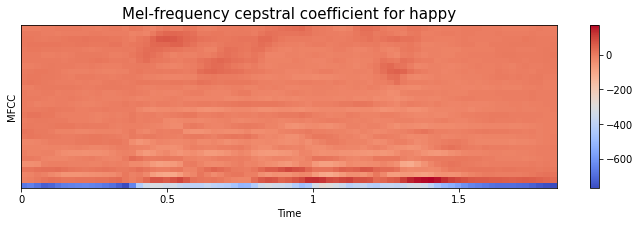

In [ ]:
create_mfcc(data,sr,emotion)

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(12, 5))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

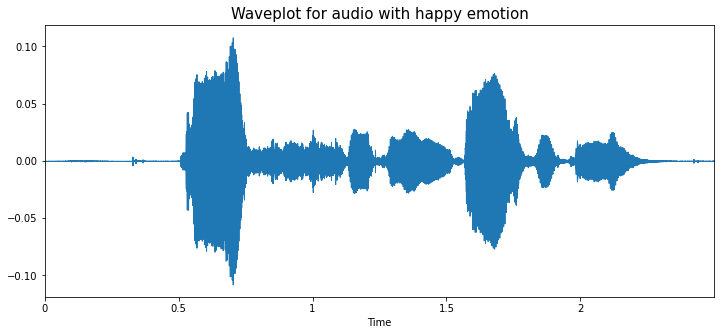

In [ ]:
sr=16000
audio_duration=2.5
input_length = sr * audio_duration

emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
if len(data)!= input_length:
# Random offset / Padding
  data=match_dimension(data,40000)
#create_mfcc(data, sr, emotion)
create_waveplot(data, sr, emotion)
#Audio(path)

In [ ]:
def create_mfcc(data,sr,e):
     # Random offset / Padding
    # if len(data)!= input_length:

    #     # Random offset / Padding
    #   data=match_dimension(data,40000)
    mfcc = librosa.feature.mfcc(y=data, sr=16000,n_fft=512,hop_length=256, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

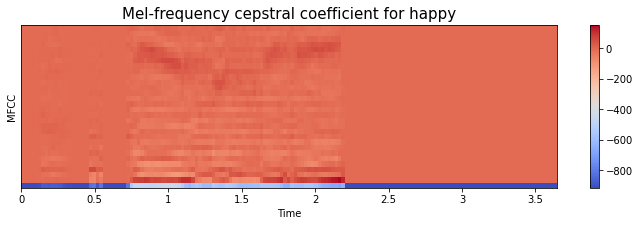

In [ ]:
sr=16000
audio_duration=2.5
input_length = sr * audio_duration

emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=1.5, res_type='kaiser_fast')
if len(data)!= input_length:
# Random offset / Padding
  data=match_dimension(data,40000)
create_mfcc(data, sr, emotion)
#create_waveplot(data, sr, emotion)
#Audio(path)

In [ ]:
def create_mel_spec(data,sr,e):
    melspec = librosa.feature.melspectrogram(data,n_fft=512,hop_length=256,n_mels=30)
    logspec = librosa.power_to_db(melspec,ref=np.max)
    plt.figure(figsize=(12,5))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(logspec, x_axis='time')
    plt.ylabel('Hz')
    plt.colorbar()

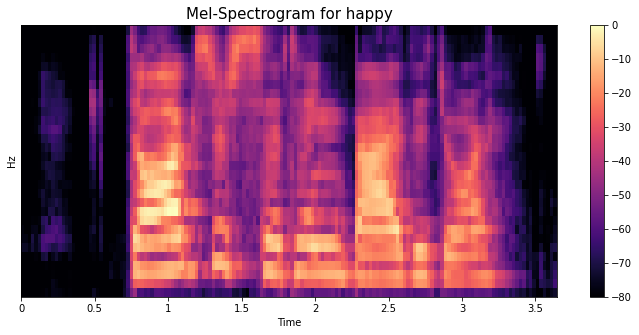

In [ ]:
sr=16000
audio_duration=2.5
input_length = sr * audio_duration

emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
if len(data)!= input_length:
# Random offset / Padding
  data=match_dimension(data,40000)
create_mel_spec(data,sr,emotion)

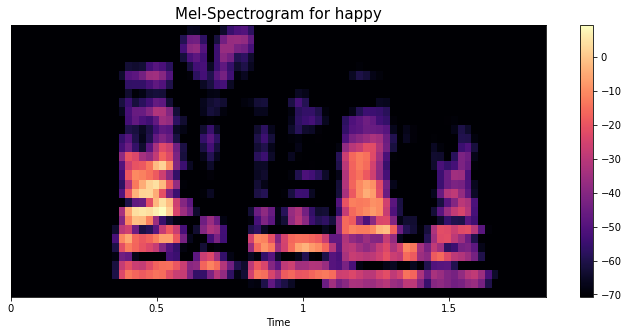

In [ ]:
audio_duration=2.5
input_length = sampling_rate * audio_duration

emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
if len(data)!= input_length:
# Random offset / Padding
  data=match_dimension(data,40000)
create_mel_spec(data,sr,emotion)

In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,79,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 79, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 79, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 79, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 39, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 39, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 39, 128)       2

In [ ]:
Y = data_path['Emotions'].values
Y

array(['surprise', 'neutral', 'disgust', ..., 'fear', 'fear', 'fear'],
      dtype=object)

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = data_path['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mfcc_s
                                                    , encoded_labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 79, 1) (382, 30, 79, 1) (890, 30, 79, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 79, 1) (382, 30, 79, 1) (890, 30, 79, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model_3.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
46/47 [============================>.] - ETA: 0s - loss: 0.8802 - accuracy: 0.7092
Epoch 1: val_accuracy did not improve from 0.24607
47/47 [==============================] - 2s 46ms/step - loss: 0.8799 - accuracy: 0.7102 - val_loss: 2.7437 - val_accuracy: 0.1135
Epoch 2/300
47/47 [==============================] - ETA: 0s - loss: 0.7878 - accuracy: 0.7436
Epoch 2: val_accuracy did not improve from 0.24607
47/47 [==============================] - 2s 40ms/step - loss: 0.7878 - accuracy: 0.7436 - val_loss: 2.7765 - val_accuracy: 0.1404
Epoch 3/300
47/47 [==============================] - ETA: 0s - loss: 0.7013 - accuracy: 0.7655
Epoch 3: val_accuracy did not improve from 0.24607
47/47 [==============================] - 2s 42ms/step - loss: 0.7013 - accuracy: 0.7655 - val_loss: 2.9326 - val_accuracy: 0.1303
Epoch 4/300
47/47 [==============================] - ETA: 0s - loss: 0.6307 - accuracy: 0.7901
Epoch 4: val_accuracy improved from 0.24607 to 0.24831, saving model to /cont

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

12/12 [==============================] - 1s 35ms/step - loss: 0.2573 - accuracy: 0.9241
Accuracy of our model on test data :  92.40837693214417 %


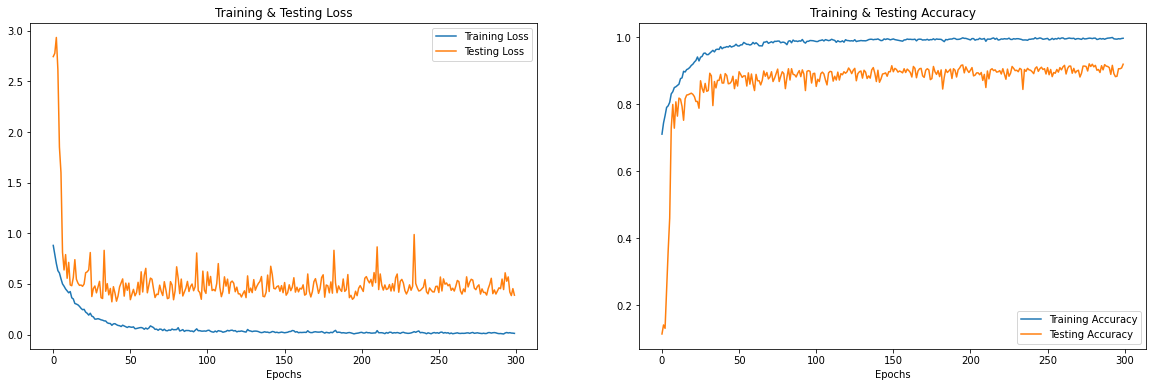

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


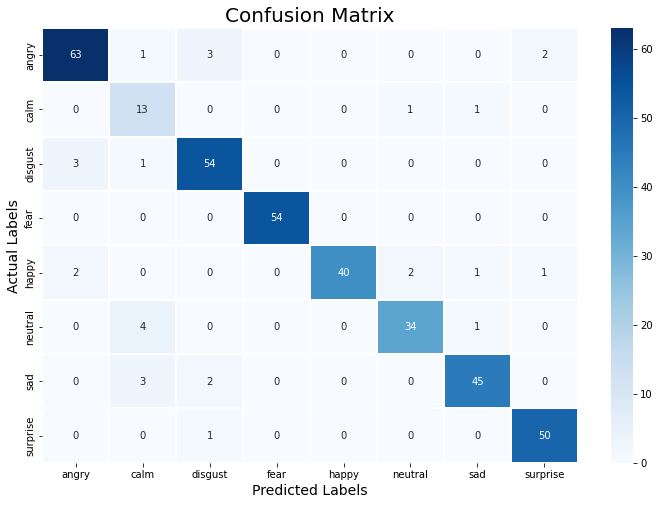

              precision    recall  f1-score   support

       angry       0.93      0.91      0.92        69
        calm       0.59      0.87      0.70        15
     disgust       0.90      0.93      0.92        58
        fear       1.00      1.00      1.00        54
       happy       1.00      0.87      0.93        46
     neutral       0.92      0.87      0.89        39
         sad       0.94      0.90      0.92        50
    surprise       0.94      0.98      0.96        51

    accuracy                           0.92       382
   macro avg       0.90      0.92      0.91       382
weighted avg       0.93      0.92      0.93       382



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))